In [3]:
import os
import math
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from tqdm import tqdm
import pickle
import keras
import tensorflow as tf
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D, MaxPooling2D, Lambda, Input, InputLayer
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
root_dir = "/content/drive/MyDrive/Cervical_Cancer"
folder_name = "training_set"

In [ ]:
# counting the number of files in each class with respect to the training set

class_names = []
number_of_images_in_classes = []

for  category in os.listdir(os.path.join(root_dir, "training_set")):
    class_names.append(category)
    number_of_images_in_classes.append(len(os.listdir(os.path.join(root_dir, "training_set",category))))
    print("The number of images present in {} is: {}".format(category, len(os.listdir(os.path.join(root_dir, "training_set",category)))))


The number of images present in Koilocytotic is: 4250
The number of images present in Parabasal is: 4250
The number of images present in Superficial_Intermediate is: 4250
The number of images present in Dyskeratotic is: 4250
The number of images present in Metaplastic is: 4250


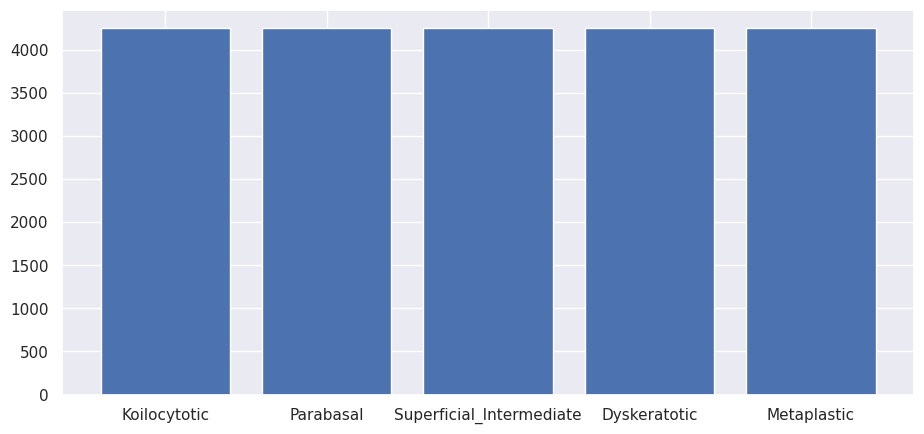

In [ ]:
#Visualizing the number of classes present in the training dataset

"This shows we have a balanced dataset"

fig = plt.figure(figsize=(11,5))

plt.bar(range(len(class_names)), number_of_images_in_classes, tick_label = class_names)

plt.show()

In [ ]:
# counting the number of files in each class with respect to the testing set

class_names = []
number_of_images_in_classes = []

for  category in os.listdir(os.path.join(root_dir, "test_set")):
    class_names.append(category)
    number_of_images_in_classes.append(len(os.listdir(os.path.join(root_dir, "test_set",category))))
    print("The number of images present in {} is: {}".format(category, len(os.listdir(os.path.join(root_dir, "test_set",category)))))



The number of images present in Superficial_Intermediate is: 750
The number of images present in Koilocytotic is: 750
The number of images present in Metaplastic is: 750
The number of images present in Dyskeratotic is: 750
The number of images present in Parabasal is: 750


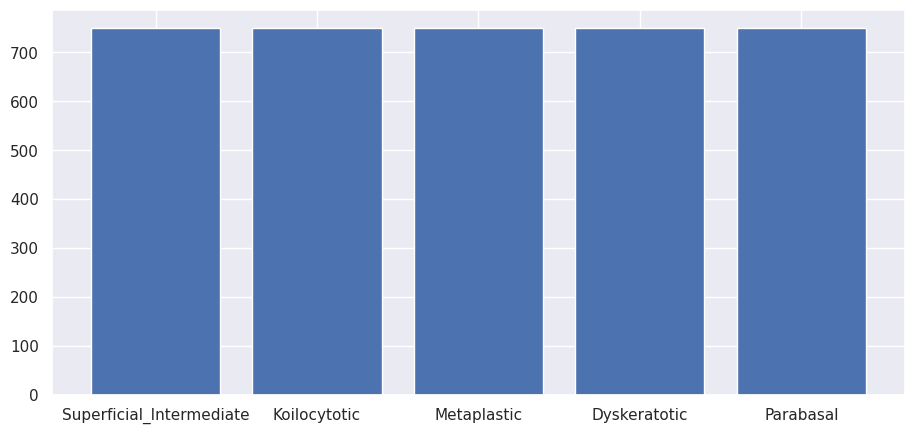

In [ ]:
#Visualizing the number of classes present in the test dataset

"This shows we have a balanced dataset"

fig = plt.figure(figsize=(11,5))

plt.bar(range(len(class_names)), number_of_images_in_classes, tick_label = class_names)
plt.show()

# Converting The File Names Into a Dictionary

In [ ]:
class_label = []
class_code = []
file_name = []
file_name_with_directory = []

counter = 0

for  category in os.listdir(os.path.join(root_dir, "training_set")):
    images = os.listdir(os.path.join(root_dir, "training_set",category))


    for image in images:
        file_name.append(image)
        class_code.append(counter)
        class_label.append(category)
        file_name_with_directory.append(os.path.join(root_dir, "training_set", category, image))

    counter += 1

training_img_info = pd.DataFrame(
                                  {
                                  "file_name": file_name,
                                  "class_label": class_label,
                                  "class_code": class_code,
                                  "file_name_with_directory": file_name_with_directory
                                  }
                                )


In [ ]:
training_img_info.head()

,file_name,class_label,class_code,file_name_with_directory
0,cervix_koc_3837.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/trainin...
1,cervix_koc_3828.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/trainin...
2,cervix_koc_4040.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/trainin...
3,cervix_koc_4070.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/trainin...
4,cervix_koc_4058.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/trainin...


In [ ]:
training_img_info.shape

(21250, 4)

In [ ]:
training_img_info.class_label.unique()

array(['Koilocytotic', 'Parabasal', 'Superficial_Intermediate',
       'Dyskeratotic', 'Metaplastic'], dtype=object)

In [ ]:
training_img_info.class_code.unique()

array([0, 1, 2, 3, 4])

# Shuffling The Dataframe

In [2]:
np.random.seed(317)

In [ ]:
shuffled_training_img_info = training_img_info.sample(frac = 1).reset_index(drop = True)

In [ ]:
shuffled_training_img_info.head(10)

,file_name,class_label,class_code,file_name_with_directory
0,cervix_dyk_4694.jpg,Dyskeratotic,3,/content/drive/MyDrive/Cervical_Cancer/trainin...
1,cervix_dyk_4878.jpg,Dyskeratotic,3,/content/drive/MyDrive/Cervical_Cancer/trainin...
2,cervix_pab_3210.jpg,Parabasal,1,/content/drive/MyDrive/Cervical_Cancer/trainin...
3,cervix_mep_0364.jpg,Metaplastic,4,/content/drive/MyDrive/Cervical_Cancer/trainin...
4,cervix_koc_2394.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/trainin...
5,cervix_sfi_3778.jpg,Superficial_Intermediate,2,/content/drive/MyDrive/Cervical_Cancer/trainin...
6,cervix_koc_2843.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/trainin...
7,cervix_koc_4669.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/trainin...
8,cervix_sfi_3761.jpg,Superficial_Intermediate,2,/content/drive/MyDrive/Cervical_Cancer/trainin...
9,cervix_mep_1635.jpg,Metaplastic,4,/content/drive/MyDrive/Cervical_Cancer/trainin...


In [ ]:
#shuffled_training_img_info.to_csv("/content/drive/MyDrive/Cervical_Cancer/saved_training_id_info.csv", index = False)

In [ ]:
class_label = []
class_code = []
file_name = []
file_name_with_directory = []

counter = 0

for  category in os.listdir(os.path.join(root_dir, "test_set")):
    images = os.listdir(os.path.join(root_dir, "test_set",category))


    for image in images:
        file_name.append(image)
        class_code.append(counter)
        class_label.append(category)
        file_name_with_directory.append(os.path.join(root_dir, "test_set", category, image))

    counter += 1

test_img_info = pd.DataFrame(
                                  {
                                  "file_name": file_name,
                                  "class_label": class_label,
                                  "class_code": class_code,
                                  "file_name_with_directory": file_name_with_directory
                                  }
                                )


In [ ]:
test_img_info

,file_name,class_label,class_code,file_name_with_directory
0,cervix_sfi_0216.jpg,Superficial_Intermediate,0,/content/drive/MyDrive/Cervical_Cancer/test_se...
1,cervix_sfi_3301.jpg,Superficial_Intermediate,0,/content/drive/MyDrive/Cervical_Cancer/test_se...
2,cervix_sfi_0131.jpg,Superficial_Intermediate,0,/content/drive/MyDrive/Cervical_Cancer/test_se...
3,cervix_sfi_0181.jpg,Superficial_Intermediate,0,/content/drive/MyDrive/Cervical_Cancer/test_se...
4,cervix_sfi_0786.jpg,Superficial_Intermediate,0,/content/drive/MyDrive/Cervical_Cancer/test_se...
...,...,...,...,...
3745,cervix_pab_3380.jpg,Parabasal,4,/content/drive/MyDrive/Cervical_Cancer/test_se...
3746,cervix_pab_3969.jpg,Parabasal,4,/content/drive/MyDrive/Cervical_Cancer/test_se...
3747,cervix_pab_1018.jpg,Parabasal,4,/content/drive/MyDrive/Cervical_Cancer/test_se...
3748,cervix_pab_1411.jpg,Parabasal,4,/content/drive/MyDrive/Cervical_Cancer/test_se...


In [ ]:
shuffled_test_img_info = test_img_info.sample(frac=1).reset_index(drop = True)

In [ ]:
#shuffled_test_img_info.to_csv("/content/drive/MyDrive/Cervical_Cancer/saved_test_id_info.csv", index=False)

In [4]:
saved_training_img_info = pd.read_csv("/content/drive/MyDrive/Cervical_Cancer/saved_training_id_info.csv")

In [5]:
saved_training_img_info.head()

,file_name,class_label,class_code,file_name_with_directory
0,cervix_dyk_4694.jpg,Dyskeratotic,3,/content/drive/MyDrive/Cervical_Cancer/trainin...
1,cervix_dyk_4878.jpg,Dyskeratotic,3,/content/drive/MyDrive/Cervical_Cancer/trainin...
2,cervix_pab_3210.jpg,Parabasal,1,/content/drive/MyDrive/Cervical_Cancer/trainin...
3,cervix_mep_0364.jpg,Metaplastic,4,/content/drive/MyDrive/Cervical_Cancer/trainin...
4,cervix_koc_2394.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/trainin...


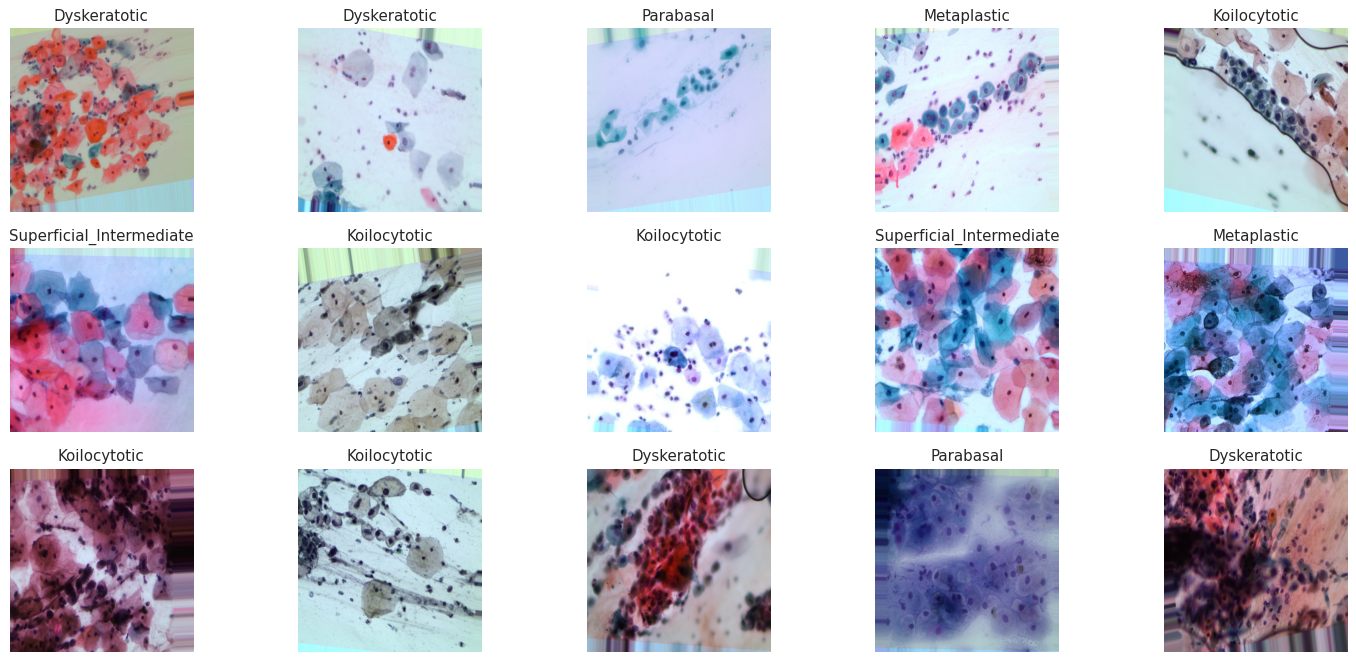

In [8]:
#Visualizing samples of the images

plt.figure(figsize=(20,9), dpi = 90)

for i in range(len(saved_training_img_info.iloc[:15])):
    plt.subplot(3, 5, i+1)
    plt.imshow(plt.imread(saved_training_img_info["file_name_with_directory"].iloc[i]))
    plt.title(saved_training_img_info["class_label"].iloc[i])
    plt.axis("off")

# Encoding The Class Label

In [55]:
y = to_categorical(saved_training_img_info.class_code)

In [56]:
y[:20]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# Feature Extraction Design

In [32]:
from keras.applications.nasnet import NASNetLarge,preprocess_input as nasnet_preprocess
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input as Iresnet_preprocess
from keras.applications.inception_v3 import InceptionV3, preprocess_input as inception_preprocess
from keras.applications.xception import Xception, preprocess_input as xception_preprocess

from keras.layers import concatenate

In [33]:
#definining the input shape

input_shape = (512, 512, 3)

input_layer = Input(shape = input_shape)

In [34]:
#Feature Extractor 1

preprocesor_nasnet = Lambda(nasnet_preprocess)(input_layer)
Nasnet = NASNetLarge(
    weights = "imagenet",
    include_top = False,
    input_shape = input_shape,
    pooling = "avg"
    )(preprocesor_nasnet)


#Feature Extractor 2

preprocesor_resnet = Lambda(Iresnet_preprocess)(input_layer)
InceptionResnet = InceptionResNetV2(
    weights = "imagenet",
    include_top = False,
    input_shape = input_shape,
    pooling = "avg"
    )(preprocesor_resnet)


#Feature Extractor 3

preprocesor_inception = Lambda(inception_preprocess)(input_layer)
Inception_v3 = InceptionV3(
    weights = "imagenet",
    include_top = False,
    input_shape = input_shape,
    pooling = "avg"
    )(preprocesor_inception)


#Feature Extractor 4

preprocesor_xception = Lambda(xception_preprocess)(input_layer)
Xception = Xception(
    weights = "imagenet",
    include_top = False,
    input_shape = input_shape,
    pooling = "avg"
    )(preprocesor_xception)

83683744/83683744 [==============================] - 3s 0us/step


In [35]:
#merging the feature extractors together

merged_extractors = concatenate([Nasnet, InceptionResnet, Inception_v3, Xception])

merged_model = Model(inputs = input_layer, outputs = merged_extractors)

In [10]:
merged_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 512, 512, 3)  0           ['input_1[0][0]']                
                                                                                                  
 lambda_1 (Lambda)              (None, 512, 512, 3)  0           ['input_1[0][0]']                
                                                                                                  
 lambda_2 (Lambda)              (None, 512, 512, 3)  0           ['input_1[0][0]']            

# Saving the Merged Models

In [57]:
feature_extractor_file_obj = open("/content/drive/MyDrive/Image_cervical_models/feature_extractor_merged_model.pkl", "wb")

pickle.dump(merged_model, feature_extractor_file_obj)

feature_extractor_file_obj.close()

KeyboardInterrupt: ignored

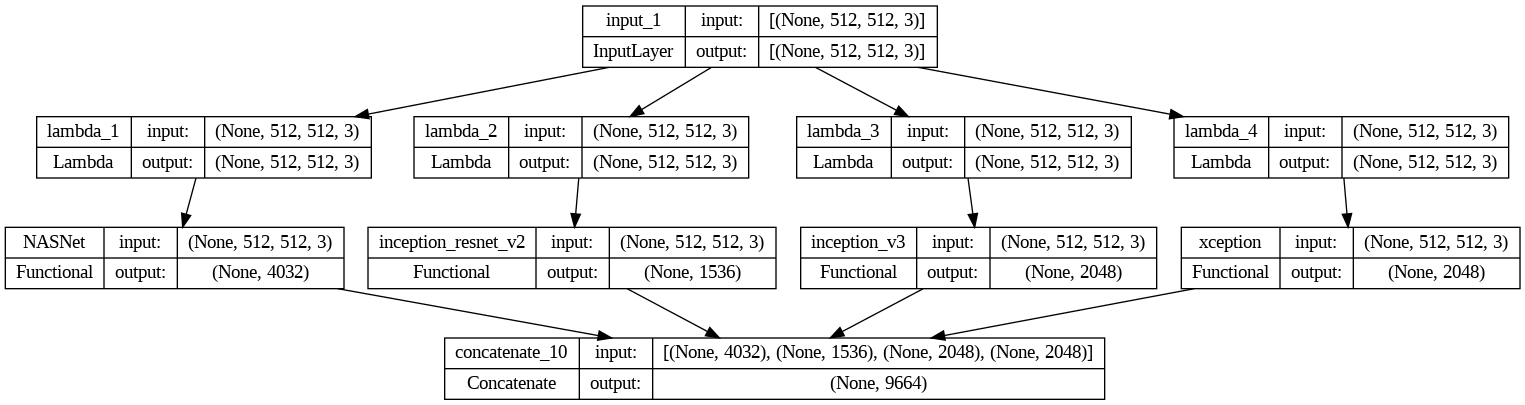

In [18]:
#ploting the feature extractors

from keras.utils import plot_model

plot_model(merged_model, show_shapes = True)

In [19]:
#checking the model shape

merged_model.output.shape

TensorShape([None, 9664])

In [20]:
len(merged_model.trainable_weights)

1846

# Feature Extraction Implementation

In [36]:
def feature_extraction(data_frame):

    image_size = (512, 512, 3)

    data_size = len(data_frame)

    batch_size = 16

    feature_extract = np.zeros([data_size, 9664], dtype = np.uint8)

    Datagen = ImageDataGenerator()

    Generator = Datagen.flow_from_dataframe(
        data_frame,
        x_col = "file_name_with_directory",
        class_mode = None,
        batch_size = batch_size,
        shuffle = False,
        target_size = (image_size[:2]),
        color_mode = "rgb"
    )

    counter = 0

    for batch in tqdm(Generator):
        batch = merged_model.predict(batch)
        feature_extract[counter * batch_size: (counter + 1)* batch_size] = batch
        counter += 1

        if counter * batch_size >= data_size:
            break

    return feature_extract

In [48]:
extracted_features = feature_extraction(saved_training_img_info)

Found 21250 validated image filenames.


  0%|          | 0/1329 [00:00<?, ?it/s]

1/1 [==============================] - 1s 566ms/step


  0%|          | 1/1329 [00:01<36:18,  1.64s/it]

1/1 [==============================] - 1s 570ms/step


  0%|          | 2/1329 [00:02<28:41,  1.30s/it]

1/1 [==============================] - 1s 559ms/step


  0%|          | 3/1329 [00:03<26:14,  1.19s/it]

1/1 [==============================] - 1s 521ms/step


  0%|          | 4/1329 [00:04<23:51,  1.08s/it]

1/1 [==============================] - 1s 543ms/step


  0%|          | 5/1329 [00:05<22:37,  1.03s/it]

1/1 [==============================] - 1s 518ms/step


  0%|          | 6/1329 [00:06<22:03,  1.00s/it]

1/1 [==============================] - 1s 521ms/step


  1%|          | 7/1329 [00:07<21:31,  1.02it/s]

1/1 [==============================] - 1s 519ms/step


  1%|          | 8/1329 [00:08<21:00,  1.05it/s]

1/1 [==============================] - 1s 548ms/step


  1%|          | 9/1329 [00:09<20:52,  1.05it/s]

1/1 [==============================] - 1s 515ms/step


  1%|          | 10/1329 [00:10<21:08,  1.04it/s]

1/1 [==============================] - 1s 515ms/step


  1%|          | 11/1329 [00:11<20:45,  1.06it/s]

1/1 [==============================] - 1s 522ms/step


  1%|          | 12/1329 [00:12<20:25,  1.07it/s]

1/1 [==============================] - 1s 519ms/step


  1%|          | 13/1329 [00:13<20:20,  1.08it/s]

1/1 [==============================] - 1s 542ms/step


  1%|          | 14/1329 [00:13<20:26,  1.07it/s]

1/1 [==============================] - 1s 557ms/step


  1%|          | 15/1329 [00:15<23:31,  1.07s/it]

1/1 [==============================] - 1s 551ms/step


  1%|          | 16/1329 [00:17<27:31,  1.26s/it]

1/1 [==============================] - 1s 531ms/step


  1%|▏         | 17/1329 [00:18<25:51,  1.18s/it]

1/1 [==============================] - 1s 512ms/step


  1%|▏         | 18/1329 [00:19<24:14,  1.11s/it]

1/1 [==============================] - 1s 512ms/step


  1%|▏         | 19/1329 [00:19<22:51,  1.05s/it]

1/1 [==============================] - 1s 514ms/step


  2%|▏         | 20/1329 [00:20<21:50,  1.00s/it]

1/1 [==============================] - 1s 512ms/step


  2%|▏         | 21/1329 [00:21<21:06,  1.03it/s]

1/1 [==============================] - 1s 517ms/step


  2%|▏         | 22/1329 [00:22<21:00,  1.04it/s]

1/1 [==============================] - 1s 514ms/step


  2%|▏         | 23/1329 [00:23<20:48,  1.05it/s]

1/1 [==============================] - 1s 514ms/step


  2%|▏         | 24/1329 [00:24<20:32,  1.06it/s]

1/1 [==============================] - 1s 525ms/step


  2%|▏         | 25/1329 [00:25<20:17,  1.07it/s]

1/1 [==============================] - 1s 522ms/step


  2%|▏         | 26/1329 [00:26<20:07,  1.08it/s]

1/1 [==============================] - 1s 514ms/step


  2%|▏         | 27/1329 [00:27<19:51,  1.09it/s]

1/1 [==============================] - 1s 551ms/step


  2%|▏         | 28/1329 [00:28<20:12,  1.07it/s]

1/1 [==============================] - 1s 560ms/step


  2%|▏         | 29/1329 [00:29<24:56,  1.15s/it]

1/1 [==============================] - 1s 563ms/step


  2%|▏         | 30/1329 [00:30<24:26,  1.13s/it]

1/1 [==============================] - 1s 516ms/step


  2%|▏         | 31/1329 [00:31<22:57,  1.06s/it]

1/1 [==============================] - 1s 517ms/step


  2%|▏         | 32/1329 [00:32<21:58,  1.02s/it]

1/1 [==============================] - 1s 521ms/step


  2%|▏         | 33/1329 [00:33<21:14,  1.02it/s]

1/1 [==============================] - 1s 516ms/step


  3%|▎         | 34/1329 [00:34<20:42,  1.04it/s]

1/1 [==============================] - 1s 515ms/step


  3%|▎         | 35/1329 [00:35<20:13,  1.07it/s]

1/1 [==============================] - 1s 511ms/step


  3%|▎         | 36/1329 [00:36<19:51,  1.09it/s]

1/1 [==============================] - 1s 516ms/step


  3%|▎         | 37/1329 [00:37<19:41,  1.09it/s]

1/1 [==============================] - 1s 517ms/step


  3%|▎         | 38/1329 [00:38<19:36,  1.10it/s]

1/1 [==============================] - 1s 517ms/step


  3%|▎         | 39/1329 [00:39<19:43,  1.09it/s]

1/1 [==============================] - 1s 517ms/step


  3%|▎         | 40/1329 [00:39<19:37,  1.09it/s]

1/1 [==============================] - 1s 523ms/step


  3%|▎         | 41/1329 [00:40<19:38,  1.09it/s]

1/1 [==============================] - 1s 551ms/step


  3%|▎         | 42/1329 [00:41<20:26,  1.05it/s]

1/1 [==============================] - 1s 557ms/step


  3%|▎         | 43/1329 [00:42<20:52,  1.03it/s]

1/1 [==============================] - 1s 549ms/step


  3%|▎         | 44/1329 [00:43<21:07,  1.01it/s]

1/1 [==============================] - 1s 559ms/step


  3%|▎         | 45/1329 [00:45<21:28,  1.00s/it]

1/1 [==============================] - 1s 523ms/step


  3%|▎         | 46/1329 [00:45<20:52,  1.02it/s]

1/1 [==============================] - 1s 516ms/step


  4%|▎         | 47/1329 [00:46<20:36,  1.04it/s]

1/1 [==============================] - 1s 515ms/step


  4%|▎         | 48/1329 [00:47<20:14,  1.05it/s]

1/1 [==============================] - 1s 516ms/step


  4%|▎         | 49/1329 [00:48<19:50,  1.07it/s]

1/1 [==============================] - 1s 513ms/step


  4%|▍         | 50/1329 [00:49<19:35,  1.09it/s]

1/1 [==============================] - 1s 512ms/step


  4%|▍         | 51/1329 [00:50<19:29,  1.09it/s]

1/1 [==============================] - 1s 515ms/step


  4%|▍         | 52/1329 [00:51<19:16,  1.10it/s]

1/1 [==============================] - 1s 511ms/step


  4%|▍         | 53/1329 [00:52<19:09,  1.11it/s]

1/1 [==============================] - 1s 523ms/step


  4%|▍         | 54/1329 [00:53<19:11,  1.11it/s]

1/1 [==============================] - 1s 521ms/step


  4%|▍         | 55/1329 [00:54<19:10,  1.11it/s]

1/1 [==============================] - 1s 520ms/step


  4%|▍         | 56/1329 [00:54<19:16,  1.10it/s]

1/1 [==============================] - 1s 554ms/step


  4%|▍         | 57/1329 [00:55<19:56,  1.06it/s]

1/1 [==============================] - 1s 551ms/step


  4%|▍         | 58/1329 [00:57<20:33,  1.03it/s]

1/1 [==============================] - 1s 549ms/step


  4%|▍         | 59/1329 [00:58<20:49,  1.02it/s]

1/1 [==============================] - 1s 530ms/step


  5%|▍         | 60/1329 [00:59<21:16,  1.01s/it]

1/1 [==============================] - 1s 517ms/step


  5%|▍         | 61/1329 [01:00<20:45,  1.02it/s]

1/1 [==============================] - 1s 516ms/step


  5%|▍         | 62/1329 [01:00<20:27,  1.03it/s]

1/1 [==============================] - 1s 518ms/step


  5%|▍         | 63/1329 [01:01<19:58,  1.06it/s]

1/1 [==============================] - 1s 515ms/step


  5%|▍         | 64/1329 [01:02<19:43,  1.07it/s]

1/1 [==============================] - 1s 521ms/step


  5%|▍         | 65/1329 [01:03<19:35,  1.08it/s]

1/1 [==============================] - 1s 514ms/step


  5%|▍         | 66/1329 [01:04<19:27,  1.08it/s]

1/1 [==============================] - 1s 512ms/step


  5%|▌         | 67/1329 [01:05<19:07,  1.10it/s]

1/1 [==============================] - 1s 514ms/step


  5%|▌         | 68/1329 [01:06<18:59,  1.11it/s]

1/1 [==============================] - 1s 520ms/step


  5%|▌         | 69/1329 [01:07<19:03,  1.10it/s]

1/1 [==============================] - 1s 523ms/step


  5%|▌         | 70/1329 [01:08<19:05,  1.10it/s]

1/1 [==============================] - 1s 527ms/step


  5%|▌         | 71/1329 [01:09<19:14,  1.09it/s]

1/1 [==============================] - 1s 565ms/step


  5%|▌         | 72/1329 [01:10<19:55,  1.05it/s]

1/1 [==============================] - 1s 550ms/step


  5%|▌         | 73/1329 [01:11<20:15,  1.03it/s]

1/1 [==============================] - 1s 551ms/step


  6%|▌         | 74/1329 [01:12<20:30,  1.02it/s]

1/1 [==============================] - 1s 514ms/step


  6%|▌         | 75/1329 [01:13<20:09,  1.04it/s]

1/1 [==============================] - 1s 516ms/step


  6%|▌         | 76/1329 [01:13<19:43,  1.06it/s]

1/1 [==============================] - 1s 523ms/step


  6%|▌         | 77/1329 [01:14<19:25,  1.07it/s]

1/1 [==============================] - 1s 514ms/step


  6%|▌         | 78/1329 [01:15<19:14,  1.08it/s]

1/1 [==============================] - 1s 515ms/step


  6%|▌         | 79/1329 [01:16<19:13,  1.08it/s]

1/1 [==============================] - 1s 518ms/step


  6%|▌         | 80/1329 [01:17<19:05,  1.09it/s]

1/1 [==============================] - 1s 517ms/step


  6%|▌         | 81/1329 [01:18<19:09,  1.09it/s]

1/1 [==============================] - 1s 523ms/step


  6%|▌         | 82/1329 [01:19<19:02,  1.09it/s]

1/1 [==============================] - 1s 515ms/step


  6%|▌         | 83/1329 [01:20<18:52,  1.10it/s]

1/1 [==============================] - 1s 515ms/step


  6%|▋         | 84/1329 [01:21<18:52,  1.10it/s]

1/1 [==============================] - 1s 519ms/step


  6%|▋         | 85/1329 [01:22<18:59,  1.09it/s]

1/1 [==============================] - 1s 562ms/step


  6%|▋         | 86/1329 [01:23<19:23,  1.07it/s]

1/1 [==============================] - 1s 553ms/step


  7%|▋         | 87/1329 [01:24<20:18,  1.02it/s]

1/1 [==============================] - 1s 561ms/step


  7%|▋         | 88/1329 [01:25<20:42,  1.00s/it]

1/1 [==============================] - 1s 536ms/step


  7%|▋         | 89/1329 [01:26<20:51,  1.01s/it]

1/1 [==============================] - 1s 516ms/step


  7%|▋         | 90/1329 [01:27<20:11,  1.02it/s]

1/1 [==============================] - 1s 518ms/step


  7%|▋         | 91/1329 [01:28<19:38,  1.05it/s]

1/1 [==============================] - 1s 512ms/step


  7%|▋         | 92/1329 [01:29<19:13,  1.07it/s]

1/1 [==============================] - 1s 519ms/step


  7%|▋         | 93/1329 [01:29<18:58,  1.09it/s]

1/1 [==============================] - 1s 523ms/step


  7%|▋         | 94/1329 [01:30<18:54,  1.09it/s]

1/1 [==============================] - 1s 516ms/step


  7%|▋         | 95/1329 [01:31<18:53,  1.09it/s]

1/1 [==============================] - 1s 515ms/step


  7%|▋         | 96/1329 [01:32<18:43,  1.10it/s]

1/1 [==============================] - 1s 526ms/step


  7%|▋         | 97/1329 [01:33<18:43,  1.10it/s]

1/1 [==============================] - 1s 520ms/step


  7%|▋         | 98/1329 [01:34<18:39,  1.10it/s]

1/1 [==============================] - 1s 514ms/step


  7%|▋         | 99/1329 [01:35<18:30,  1.11it/s]

1/1 [==============================] - 1s 526ms/step


  8%|▊         | 100/1329 [01:36<18:33,  1.10it/s]

1/1 [==============================] - 1s 569ms/step


  8%|▊         | 101/1329 [01:38<26:44,  1.31s/it]

1/1 [==============================] - 1s 571ms/step


  8%|▊         | 102/1329 [01:40<29:05,  1.42s/it]

1/1 [==============================] - 1s 517ms/step


  8%|▊         | 103/1329 [01:41<26:01,  1.27s/it]

1/1 [==============================] - 1s 517ms/step


  8%|▊         | 104/1329 [01:42<23:49,  1.17s/it]

1/1 [==============================] - 1s 513ms/step


  8%|▊         | 105/1329 [01:42<22:07,  1.08s/it]

1/1 [==============================] - 1s 513ms/step


  8%|▊         | 106/1329 [01:43<20:54,  1.03s/it]

1/1 [==============================] - 1s 529ms/step


  8%|▊         | 107/1329 [01:44<20:14,  1.01it/s]

1/1 [==============================] - 1s 559ms/step


  8%|▊         | 108/1329 [01:45<20:27,  1.01s/it]

1/1 [==============================] - 1s 552ms/step


  8%|▊         | 109/1329 [01:46<20:35,  1.01s/it]

1/1 [==============================] - 1s 557ms/step


  8%|▊         | 110/1329 [01:48<24:29,  1.21s/it]

1/1 [==============================] - 1s 515ms/step


  8%|▊         | 111/1329 [01:49<22:43,  1.12s/it]

1/1 [==============================] - 1s 530ms/step


  8%|▊         | 112/1329 [01:50<21:30,  1.06s/it]

1/1 [==============================] - 1s 561ms/step


  9%|▊         | 113/1329 [01:51<21:15,  1.05s/it]

1/1 [==============================] - 1s 552ms/step


  9%|▊         | 114/1329 [01:52<21:05,  1.04s/it]

1/1 [==============================] - 1s 551ms/step


  9%|▊         | 115/1329 [01:53<20:53,  1.03s/it]

1/1 [==============================] - 1s 523ms/step


  9%|▊         | 116/1329 [01:54<20:43,  1.03s/it]

1/1 [==============================] - 1s 517ms/step


  9%|▉         | 117/1329 [01:55<20:00,  1.01it/s]

1/1 [==============================] - 1s 519ms/step


  9%|▉         | 118/1329 [01:56<19:26,  1.04it/s]

1/1 [==============================] - 1s 516ms/step


  9%|▉         | 119/1329 [01:57<19:10,  1.05it/s]

1/1 [==============================] - 1s 525ms/step


  9%|▉         | 120/1329 [01:58<18:57,  1.06it/s]

1/1 [==============================] - 1s 516ms/step


  9%|▉         | 121/1329 [01:58<18:42,  1.08it/s]

1/1 [==============================] - 1s 517ms/step


  9%|▉         | 122/1329 [01:59<18:29,  1.09it/s]

1/1 [==============================] - 1s 515ms/step


  9%|▉         | 123/1329 [02:00<18:16,  1.10it/s]

1/1 [==============================] - 1s 516ms/step


  9%|▉         | 124/1329 [02:01<18:12,  1.10it/s]

1/1 [==============================] - 1s 518ms/step


  9%|▉         | 125/1329 [02:02<18:15,  1.10it/s]

1/1 [==============================] - 1s 536ms/step


  9%|▉         | 126/1329 [02:03<18:11,  1.10it/s]

1/1 [==============================] - 1s 535ms/step


 10%|▉         | 127/1329 [02:04<18:10,  1.10it/s]

1/1 [==============================] - 1s 565ms/step


 10%|▉         | 128/1329 [02:05<18:53,  1.06it/s]

1/1 [==============================] - 1s 558ms/step


 10%|▉         | 129/1329 [02:06<19:24,  1.03it/s]

1/1 [==============================] - 1s 553ms/step


 10%|▉         | 130/1329 [02:07<19:46,  1.01it/s]

1/1 [==============================] - 1s 512ms/step


 10%|▉         | 131/1329 [02:08<19:24,  1.03it/s]

1/1 [==============================] - 1s 515ms/step


 10%|▉         | 132/1329 [02:09<18:52,  1.06it/s]

1/1 [==============================] - 1s 514ms/step


 10%|█         | 133/1329 [02:10<18:31,  1.08it/s]

1/1 [==============================] - 1s 528ms/step


 10%|█         | 134/1329 [02:11<18:28,  1.08it/s]

1/1 [==============================] - 1s 520ms/step


 10%|█         | 135/1329 [02:11<18:24,  1.08it/s]

1/1 [==============================] - 1s 517ms/step


 10%|█         | 136/1329 [02:12<18:13,  1.09it/s]

1/1 [==============================] - 1s 515ms/step


 10%|█         | 137/1329 [02:13<18:05,  1.10it/s]

1/1 [==============================] - 1s 515ms/step


 10%|█         | 138/1329 [02:14<17:58,  1.10it/s]

1/1 [==============================] - 1s 518ms/step


 10%|█         | 139/1329 [02:15<17:56,  1.11it/s]

1/1 [==============================] - 1s 517ms/step


 11%|█         | 140/1329 [02:16<17:50,  1.11it/s]

1/1 [==============================] - 1s 516ms/step


 11%|█         | 141/1329 [02:17<17:43,  1.12it/s]

1/1 [==============================] - 1s 551ms/step


 11%|█         | 142/1329 [02:18<17:52,  1.11it/s]

1/1 [==============================] - 1s 560ms/step


 11%|█         | 143/1329 [02:19<18:33,  1.06it/s]

1/1 [==============================] - 1s 557ms/step


 11%|█         | 144/1329 [02:20<18:58,  1.04it/s]

1/1 [==============================] - 1s 553ms/step


 11%|█         | 145/1329 [02:21<19:28,  1.01it/s]

1/1 [==============================] - 1s 515ms/step


 11%|█         | 146/1329 [02:22<19:19,  1.02it/s]

1/1 [==============================] - 1s 517ms/step


 11%|█         | 147/1329 [02:23<18:53,  1.04it/s]

1/1 [==============================] - 1s 517ms/step


 11%|█         | 148/1329 [02:24<18:40,  1.05it/s]

1/1 [==============================] - 1s 512ms/step


 11%|█         | 149/1329 [02:25<18:32,  1.06it/s]

1/1 [==============================] - 1s 530ms/step


 11%|█▏        | 150/1329 [02:25<18:23,  1.07it/s]

1/1 [==============================] - 1s 530ms/step


 11%|█▏        | 151/1329 [02:26<18:25,  1.07it/s]

1/1 [==============================] - 1s 526ms/step


 11%|█▏        | 152/1329 [02:27<18:16,  1.07it/s]

1/1 [==============================] - 1s 519ms/step


 12%|█▏        | 153/1329 [02:28<18:09,  1.08it/s]

1/1 [==============================] - 1s 516ms/step


 12%|█▏        | 154/1329 [02:29<18:09,  1.08it/s]

1/1 [==============================] - 1s 520ms/step


 12%|█▏        | 155/1329 [02:30<17:58,  1.09it/s]

1/1 [==============================] - 1s 522ms/step


 12%|█▏        | 156/1329 [02:31<17:52,  1.09it/s]

1/1 [==============================] - 1s 564ms/step


 12%|█▏        | 157/1329 [02:32<18:26,  1.06it/s]

1/1 [==============================] - 1s 563ms/step


 12%|█▏        | 158/1329 [02:33<19:01,  1.03it/s]

1/1 [==============================] - 1s 551ms/step


 12%|█▏        | 159/1329 [02:34<19:49,  1.02s/it]

1/1 [==============================] - 1s 560ms/step


 12%|█▏        | 160/1329 [02:35<19:56,  1.02s/it]

1/1 [==============================] - 1s 518ms/step


 12%|█▏        | 161/1329 [02:36<19:15,  1.01it/s]

1/1 [==============================] - 1s 523ms/step


 12%|█▏        | 162/1329 [02:37<18:50,  1.03it/s]

1/1 [==============================] - 1s 518ms/step


 12%|█▏        | 163/1329 [02:38<18:32,  1.05it/s]

1/1 [==============================] - 1s 514ms/step


 12%|█▏        | 164/1329 [02:39<18:13,  1.07it/s]

1/1 [==============================] - 1s 526ms/step


 12%|█▏        | 165/1329 [02:40<18:06,  1.07it/s]

1/1 [==============================] - 1s 523ms/step


 12%|█▏        | 166/1329 [02:41<17:53,  1.08it/s]

1/1 [==============================] - 1s 527ms/step


 13%|█▎        | 167/1329 [02:42<17:46,  1.09it/s]

1/1 [==============================] - 1s 521ms/step


 13%|█▎        | 168/1329 [02:42<17:40,  1.09it/s]

1/1 [==============================] - 1s 521ms/step


 13%|█▎        | 169/1329 [02:43<17:37,  1.10it/s]

1/1 [==============================] - 1s 520ms/step


 13%|█▎        | 170/1329 [02:44<17:37,  1.10it/s]

1/1 [==============================] - 1s 515ms/step


 13%|█▎        | 171/1329 [02:45<17:45,  1.09it/s]

1/1 [==============================] - 1s 570ms/step


 13%|█▎        | 172/1329 [02:46<18:30,  1.04it/s]

1/1 [==============================] - 1s 535ms/step


 13%|█▎        | 173/1329 [02:47<19:14,  1.00it/s]

1/1 [==============================] - 1s 558ms/step


 13%|█▎        | 174/1329 [02:48<19:28,  1.01s/it]

1/1 [==============================] - 1s 552ms/step


 13%|█▎        | 175/1329 [02:50<20:02,  1.04s/it]

1/1 [==============================] - 1s 526ms/step


 13%|█▎        | 176/1329 [02:50<19:19,  1.01s/it]

1/1 [==============================] - 1s 523ms/step


 13%|█▎        | 177/1329 [02:51<18:51,  1.02it/s]

1/1 [==============================] - 1s 520ms/step


 13%|█▎        | 178/1329 [02:52<18:38,  1.03it/s]

1/1 [==============================] - 1s 520ms/step


 13%|█▎        | 179/1329 [02:53<18:37,  1.03it/s]

1/1 [==============================] - 1s 524ms/step


 14%|█▎        | 180/1329 [02:54<18:24,  1.04it/s]

1/1 [==============================] - 1s 519ms/step


 14%|█▎        | 181/1329 [02:55<18:09,  1.05it/s]

1/1 [==============================] - 1s 522ms/step


 14%|█▎        | 182/1329 [02:56<17:58,  1.06it/s]

1/1 [==============================] - 1s 523ms/step


 14%|█▍        | 183/1329 [02:57<17:47,  1.07it/s]

1/1 [==============================] - 1s 522ms/step


 14%|█▍        | 184/1329 [02:58<17:37,  1.08it/s]

1/1 [==============================] - 1s 522ms/step


 14%|█▍        | 185/1329 [02:59<17:35,  1.08it/s]

1/1 [==============================] - 1s 526ms/step


 14%|█▍        | 186/1329 [03:00<17:34,  1.08it/s]

1/1 [==============================] - 1s 559ms/step


 14%|█▍        | 187/1329 [03:01<18:15,  1.04it/s]

1/1 [==============================] - 1s 563ms/step


 14%|█▍        | 188/1329 [03:02<18:47,  1.01it/s]

1/1 [==============================] - 1s 554ms/step


 14%|█▍        | 189/1329 [03:04<22:39,  1.19s/it]

1/1 [==============================] - 1s 520ms/step


 14%|█▍        | 190/1329 [03:04<21:01,  1.11s/it]

1/1 [==============================] - 1s 523ms/step


 14%|█▍        | 191/1329 [03:05<20:08,  1.06s/it]

1/1 [==============================] - 1s 518ms/step


 14%|█▍        | 192/1329 [03:06<19:14,  1.02s/it]

1/1 [==============================] - 1s 519ms/step


 15%|█▍        | 193/1329 [03:07<18:45,  1.01it/s]

1/1 [==============================] - 1s 520ms/step


 15%|█▍        | 194/1329 [03:08<18:12,  1.04it/s]

1/1 [==============================] - 1s 522ms/step


 15%|█▍        | 195/1329 [03:09<18:02,  1.05it/s]

1/1 [==============================] - 1s 525ms/step


 15%|█▍        | 196/1329 [03:10<17:50,  1.06it/s]

1/1 [==============================] - 1s 521ms/step


 15%|█▍        | 197/1329 [03:11<17:40,  1.07it/s]

1/1 [==============================] - 1s 524ms/step


 15%|█▍        | 198/1329 [03:12<17:34,  1.07it/s]

1/1 [==============================] - 1s 526ms/step


 15%|█▍        | 199/1329 [03:13<17:46,  1.06it/s]

1/1 [==============================] - 1s 568ms/step


 15%|█▌        | 200/1329 [03:14<18:02,  1.04it/s]

1/1 [==============================] - 1s 573ms/step


 15%|█▌        | 201/1329 [03:15<18:37,  1.01it/s]

1/1 [==============================] - 1s 555ms/step


 15%|█▌        | 202/1329 [03:17<22:41,  1.21s/it]

1/1 [==============================] - 1s 517ms/step


 15%|█▌        | 203/1329 [03:18<21:24,  1.14s/it]

1/1 [==============================] - 1s 526ms/step


 15%|█▌        | 204/1329 [03:18<20:08,  1.07s/it]

1/1 [==============================] - 1s 521ms/step


 15%|█▌        | 205/1329 [03:19<19:16,  1.03s/it]

1/1 [==============================] - 1s 527ms/step


 16%|█▌        | 206/1329 [03:20<18:39,  1.00it/s]

1/1 [==============================] - 1s 523ms/step


 16%|█▌        | 207/1329 [03:21<18:22,  1.02it/s]

1/1 [==============================] - 1s 520ms/step


 16%|█▌        | 208/1329 [03:22<18:05,  1.03it/s]

1/1 [==============================] - 1s 522ms/step


 16%|█▌        | 209/1329 [03:23<17:51,  1.05it/s]

1/1 [==============================] - 1s 538ms/step


 16%|█▌        | 210/1329 [03:24<17:42,  1.05it/s]

1/1 [==============================] - 1s 518ms/step


 16%|█▌        | 211/1329 [03:25<17:28,  1.07it/s]

1/1 [==============================] - 1s 522ms/step


 16%|█▌        | 212/1329 [03:26<17:18,  1.08it/s]

1/1 [==============================] - 1s 516ms/step


 16%|█▌        | 213/1329 [03:27<17:05,  1.09it/s]

1/1 [==============================] - 1s 565ms/step


 16%|█▌        | 214/1329 [03:28<21:15,  1.14s/it]

1/1 [==============================] - 1s 552ms/step


 16%|█▌        | 215/1329 [03:30<20:53,  1.12s/it]

1/1 [==============================] - 1s 538ms/step


 16%|█▋        | 216/1329 [03:31<20:18,  1.09s/it]

1/1 [==============================] - 1s 517ms/step


 16%|█▋        | 217/1329 [03:31<19:20,  1.04s/it]

1/1 [==============================] - 1s 516ms/step


 16%|█▋        | 218/1329 [03:32<18:34,  1.00s/it]

1/1 [==============================] - 1s 521ms/step


 16%|█▋        | 219/1329 [03:33<18:06,  1.02it/s]

1/1 [==============================] - 1s 515ms/step


 17%|█▋        | 220/1329 [03:34<17:45,  1.04it/s]

1/1 [==============================] - 1s 516ms/step


 17%|█▋        | 221/1329 [03:35<17:28,  1.06it/s]

1/1 [==============================] - 1s 521ms/step


 17%|█▋        | 222/1329 [03:36<17:13,  1.07it/s]

1/1 [==============================] - 1s 519ms/step


 17%|█▋        | 223/1329 [03:37<17:20,  1.06it/s]

1/1 [==============================] - 1s 525ms/step


 17%|█▋        | 224/1329 [03:38<17:08,  1.07it/s]

1/1 [==============================] - 1s 517ms/step


 17%|█▋        | 225/1329 [03:39<16:59,  1.08it/s]

1/1 [==============================] - 1s 517ms/step


 17%|█▋        | 226/1329 [03:40<16:54,  1.09it/s]

1/1 [==============================] - 1s 531ms/step


 17%|█▋        | 227/1329 [03:41<16:53,  1.09it/s]

1/1 [==============================] - 1s 557ms/step


 17%|█▋        | 228/1329 [03:42<17:27,  1.05it/s]

1/1 [==============================] - 1s 532ms/step


 17%|█▋        | 229/1329 [03:43<17:44,  1.03it/s]

1/1 [==============================] - 1s 559ms/step


 17%|█▋        | 230/1329 [03:44<18:00,  1.02it/s]

1/1 [==============================] - 1s 522ms/step


 17%|█▋        | 231/1329 [03:45<18:02,  1.01it/s]

1/1 [==============================] - 1s 521ms/step


 17%|█▋        | 232/1329 [03:46<17:41,  1.03it/s]

1/1 [==============================] - 1s 519ms/step


 18%|█▊        | 233/1329 [03:47<17:25,  1.05it/s]

1/1 [==============================] - 1s 516ms/step


 18%|█▊        | 234/1329 [03:47<17:09,  1.06it/s]

1/1 [==============================] - 1s 514ms/step


 18%|█▊        | 235/1329 [03:48<16:54,  1.08it/s]

1/1 [==============================] - 1s 520ms/step


 18%|█▊        | 236/1329 [03:49<16:43,  1.09it/s]

1/1 [==============================] - 1s 512ms/step


 18%|█▊        | 237/1329 [03:50<16:32,  1.10it/s]

1/1 [==============================] - 1s 523ms/step


 18%|█▊        | 238/1329 [03:51<16:34,  1.10it/s]

1/1 [==============================] - 1s 525ms/step


 18%|█▊        | 239/1329 [03:52<16:36,  1.09it/s]

1/1 [==============================] - 1s 518ms/step


 18%|█▊        | 240/1329 [03:53<16:35,  1.09it/s]

1/1 [==============================] - 1s 520ms/step


 18%|█▊        | 241/1329 [03:54<16:28,  1.10it/s]

1/1 [==============================] - 1s 552ms/step


 18%|█▊        | 242/1329 [03:55<17:00,  1.07it/s]

1/1 [==============================] - 1s 549ms/step


 18%|█▊        | 243/1329 [03:56<17:31,  1.03it/s]

1/1 [==============================] - 1s 553ms/step


 18%|█▊        | 244/1329 [03:57<17:53,  1.01it/s]

1/1 [==============================] - 1s 534ms/step


 18%|█▊        | 245/1329 [03:58<18:06,  1.00s/it]

1/1 [==============================] - 1s 516ms/step


 19%|█▊        | 246/1329 [03:59<17:28,  1.03it/s]

1/1 [==============================] - 1s 516ms/step


 19%|█▊        | 247/1329 [04:00<17:18,  1.04it/s]

1/1 [==============================] - 1s 519ms/step


 19%|█▊        | 248/1329 [04:01<17:03,  1.06it/s]

1/1 [==============================] - 1s 525ms/step


 19%|█▊        | 249/1329 [04:02<16:59,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 19%|█▉        | 250/1329 [04:02<16:48,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 19%|█▉        | 251/1329 [04:03<16:37,  1.08it/s]

1/1 [==============================] - 1s 514ms/step


 19%|█▉        | 252/1329 [04:04<16:35,  1.08it/s]

1/1 [==============================] - 1s 524ms/step


 19%|█▉        | 253/1329 [04:05<16:32,  1.08it/s]

1/1 [==============================] - 1s 525ms/step


 19%|█▉        | 254/1329 [04:06<16:31,  1.08it/s]

1/1 [==============================] - 1s 523ms/step


 19%|█▉        | 255/1329 [04:07<16:32,  1.08it/s]

1/1 [==============================] - 1s 528ms/step


 19%|█▉        | 256/1329 [04:08<16:26,  1.09it/s]

1/1 [==============================] - 1s 554ms/step


 19%|█▉        | 257/1329 [04:09<17:00,  1.05it/s]

1/1 [==============================] - 1s 553ms/step


 19%|█▉        | 258/1329 [04:10<17:23,  1.03it/s]

1/1 [==============================] - 1s 554ms/step


 19%|█▉        | 259/1329 [04:11<17:41,  1.01it/s]

1/1 [==============================] - 1s 532ms/step


 20%|█▉        | 260/1329 [04:12<17:39,  1.01it/s]

1/1 [==============================] - 1s 518ms/step


 20%|█▉        | 261/1329 [04:13<17:05,  1.04it/s]

1/1 [==============================] - 1s 521ms/step


 20%|█▉        | 262/1329 [04:14<16:47,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 20%|█▉        | 263/1329 [04:15<16:46,  1.06it/s]

1/1 [==============================] - 1s 519ms/step


 20%|█▉        | 264/1329 [04:16<16:34,  1.07it/s]

1/1 [==============================] - 1s 514ms/step


 20%|█▉        | 265/1329 [04:17<16:28,  1.08it/s]

1/1 [==============================] - 1s 522ms/step


 20%|██        | 266/1329 [04:18<16:23,  1.08it/s]

1/1 [==============================] - 1s 522ms/step


 20%|██        | 267/1329 [04:18<16:19,  1.08it/s]

1/1 [==============================] - 1s 513ms/step


 20%|██        | 268/1329 [04:19<16:13,  1.09it/s]

1/1 [==============================] - 1s 521ms/step


 20%|██        | 269/1329 [04:20<16:14,  1.09it/s]

1/1 [==============================] - 1s 521ms/step


 20%|██        | 270/1329 [04:21<16:08,  1.09it/s]

1/1 [==============================] - 1s 555ms/step


 20%|██        | 271/1329 [04:22<16:28,  1.07it/s]

1/1 [==============================] - 1s 553ms/step


 20%|██        | 272/1329 [04:23<17:02,  1.03it/s]

1/1 [==============================] - 1s 568ms/step


 21%|██        | 273/1329 [04:25<20:40,  1.17s/it]

1/1 [==============================] - 1s 515ms/step


 21%|██        | 274/1329 [04:26<19:25,  1.10s/it]

1/1 [==============================] - 1s 514ms/step


 21%|██        | 275/1329 [04:27<18:16,  1.04s/it]

1/1 [==============================] - 1s 514ms/step


 21%|██        | 276/1329 [04:28<17:37,  1.00s/it]

1/1 [==============================] - 1s 520ms/step


 21%|██        | 277/1329 [04:29<17:07,  1.02it/s]

1/1 [==============================] - 1s 528ms/step


 21%|██        | 278/1329 [04:29<16:48,  1.04it/s]

1/1 [==============================] - 1s 517ms/step


 21%|██        | 279/1329 [04:30<16:37,  1.05it/s]

1/1 [==============================] - 1s 523ms/step


 21%|██        | 280/1329 [04:31<16:26,  1.06it/s]

1/1 [==============================] - 1s 517ms/step


 21%|██        | 281/1329 [04:32<16:15,  1.07it/s]

1/1 [==============================] - 1s 524ms/step


 21%|██        | 282/1329 [04:33<16:16,  1.07it/s]

1/1 [==============================] - 1s 525ms/step


 21%|██▏       | 283/1329 [04:34<16:11,  1.08it/s]

1/1 [==============================] - 1s 519ms/step


 21%|██▏       | 284/1329 [04:35<16:01,  1.09it/s]

1/1 [==============================] - 1s 582ms/step


 21%|██▏       | 285/1329 [04:36<16:45,  1.04it/s]

1/1 [==============================] - 1s 556ms/step


 22%|██▏       | 286/1329 [04:37<17:19,  1.00it/s]

1/1 [==============================] - 1s 572ms/step


 22%|██▏       | 287/1329 [04:38<17:52,  1.03s/it]

1/1 [==============================] - 1s 546ms/step


 22%|██▏       | 288/1329 [04:39<17:57,  1.03s/it]

1/1 [==============================] - 1s 518ms/step


 22%|██▏       | 289/1329 [04:40<17:23,  1.00s/it]

1/1 [==============================] - 1s 520ms/step


 22%|██▏       | 290/1329 [04:41<16:53,  1.03it/s]

1/1 [==============================] - 1s 515ms/step


 22%|██▏       | 291/1329 [04:42<16:28,  1.05it/s]

1/1 [==============================] - 1s 525ms/step


 22%|██▏       | 292/1329 [04:43<16:20,  1.06it/s]

1/1 [==============================] - 1s 515ms/step


 22%|██▏       | 293/1329 [04:44<16:04,  1.07it/s]

1/1 [==============================] - 1s 532ms/step


 22%|██▏       | 294/1329 [04:45<16:00,  1.08it/s]

1/1 [==============================] - 1s 520ms/step


 22%|██▏       | 295/1329 [04:46<16:00,  1.08it/s]

1/1 [==============================] - 1s 519ms/step


 22%|██▏       | 296/1329 [04:47<16:17,  1.06it/s]

1/1 [==============================] - 1s 528ms/step


 22%|██▏       | 297/1329 [04:48<16:11,  1.06it/s]

1/1 [==============================] - 1s 524ms/step


 22%|██▏       | 298/1329 [04:49<16:08,  1.06it/s]

1/1 [==============================] - 1s 519ms/step


 22%|██▏       | 299/1329 [04:49<15:57,  1.08it/s]

1/1 [==============================] - 1s 544ms/step


 23%|██▎       | 300/1329 [04:50<16:33,  1.04it/s]

1/1 [==============================] - 1s 541ms/step


 23%|██▎       | 301/1329 [04:51<16:48,  1.02it/s]

1/1 [==============================] - 1s 552ms/step


 23%|██▎       | 302/1329 [04:53<17:03,  1.00it/s]

1/1 [==============================] - 1s 524ms/step


 23%|██▎       | 303/1329 [04:54<17:09,  1.00s/it]

1/1 [==============================] - 1s 524ms/step


 23%|██▎       | 304/1329 [04:54<16:52,  1.01it/s]

1/1 [==============================] - 1s 519ms/step


 23%|██▎       | 305/1329 [04:55<16:32,  1.03it/s]

1/1 [==============================] - 1s 543ms/step


 23%|██▎       | 306/1329 [04:56<16:53,  1.01it/s]

1/1 [==============================] - 1s 534ms/step


 23%|██▎       | 307/1329 [04:57<17:00,  1.00it/s]

1/1 [==============================] - 1s 520ms/step


 23%|██▎       | 308/1329 [04:58<16:32,  1.03it/s]

1/1 [==============================] - 1s 515ms/step


 23%|██▎       | 309/1329 [04:59<16:15,  1.05it/s]

1/1 [==============================] - 1s 516ms/step


 23%|██▎       | 310/1329 [05:00<16:01,  1.06it/s]

1/1 [==============================] - 1s 534ms/step


 23%|██▎       | 311/1329 [05:01<15:54,  1.07it/s]

1/1 [==============================] - 1s 518ms/step


 23%|██▎       | 312/1329 [05:02<15:47,  1.07it/s]

1/1 [==============================] - 1s 526ms/step


 24%|██▎       | 313/1329 [05:03<15:48,  1.07it/s]

1/1 [==============================] - 1s 536ms/step


 24%|██▎       | 314/1329 [05:04<16:25,  1.03it/s]

1/1 [==============================] - 1s 556ms/step


 24%|██▎       | 315/1329 [05:05<16:49,  1.00it/s]

1/1 [==============================] - 1s 543ms/step


 24%|██▍       | 316/1329 [05:06<17:07,  1.01s/it]

1/1 [==============================] - 1s 547ms/step


 24%|██▍       | 317/1329 [05:07<17:19,  1.03s/it]

1/1 [==============================] - 1s 518ms/step


 24%|██▍       | 318/1329 [05:08<16:47,  1.00it/s]

1/1 [==============================] - 1s 534ms/step


 24%|██▍       | 319/1329 [05:09<16:37,  1.01it/s]

1/1 [==============================] - 1s 529ms/step


 24%|██▍       | 320/1329 [05:10<16:17,  1.03it/s]

1/1 [==============================] - 1s 519ms/step


 24%|██▍       | 321/1329 [05:11<16:01,  1.05it/s]

1/1 [==============================] - 1s 514ms/step


 24%|██▍       | 322/1329 [05:12<15:50,  1.06it/s]

1/1 [==============================] - 1s 521ms/step


 24%|██▍       | 323/1329 [05:13<15:43,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 24%|██▍       | 324/1329 [05:14<15:33,  1.08it/s]

1/1 [==============================] - 1s 519ms/step


 24%|██▍       | 325/1329 [05:15<15:35,  1.07it/s]

1/1 [==============================] - 1s 528ms/step


 25%|██▍       | 326/1329 [05:16<15:33,  1.07it/s]

1/1 [==============================] - 1s 521ms/step


 25%|██▍       | 327/1329 [05:17<15:44,  1.06it/s]

1/1 [==============================] - 1s 527ms/step


 25%|██▍       | 328/1329 [05:17<15:44,  1.06it/s]

1/1 [==============================] - 1s 559ms/step


 25%|██▍       | 329/1329 [05:19<16:20,  1.02it/s]

1/1 [==============================] - 1s 549ms/step


 25%|██▍       | 330/1329 [05:20<16:46,  1.01s/it]

1/1 [==============================] - 1s 547ms/step


 25%|██▍       | 331/1329 [05:21<17:03,  1.03s/it]

1/1 [==============================] - 1s 520ms/step


 25%|██▍       | 332/1329 [05:22<17:14,  1.04s/it]

1/1 [==============================] - 1s 518ms/step


 25%|██▌       | 333/1329 [05:23<16:44,  1.01s/it]

1/1 [==============================] - 1s 534ms/step


 25%|██▌       | 334/1329 [05:24<16:24,  1.01it/s]

1/1 [==============================] - 1s 528ms/step


 25%|██▌       | 335/1329 [05:25<16:21,  1.01it/s]

1/1 [==============================] - 1s 527ms/step


 25%|██▌       | 336/1329 [05:26<16:13,  1.02it/s]

1/1 [==============================] - 1s 532ms/step


 25%|██▌       | 337/1329 [05:27<16:05,  1.03it/s]

1/1 [==============================] - 1s 520ms/step


 25%|██▌       | 338/1329 [05:28<15:56,  1.04it/s]

1/1 [==============================] - 1s 520ms/step


 26%|██▌       | 339/1329 [05:28<15:56,  1.03it/s]

1/1 [==============================] - 1s 520ms/step


 26%|██▌       | 340/1329 [05:29<15:49,  1.04it/s]

1/1 [==============================] - 1s 535ms/step


 26%|██▌       | 341/1329 [05:30<15:44,  1.05it/s]

1/1 [==============================] - 1s 532ms/step


 26%|██▌       | 342/1329 [05:31<15:40,  1.05it/s]

1/1 [==============================] - 1s 562ms/step


 26%|██▌       | 343/1329 [05:32<16:32,  1.01s/it]

1/1 [==============================] - 1s 559ms/step


 26%|██▌       | 344/1329 [05:34<16:51,  1.03s/it]

1/1 [==============================] - 1s 559ms/step


 26%|██▌       | 345/1329 [05:35<20:07,  1.23s/it]

1/1 [==============================] - 1s 520ms/step


 26%|██▌       | 346/1329 [05:36<18:42,  1.14s/it]

1/1 [==============================] - 1s 518ms/step


 26%|██▌       | 347/1329 [05:37<17:46,  1.09s/it]

1/1 [==============================] - 1s 519ms/step


 26%|██▌       | 348/1329 [05:38<16:58,  1.04s/it]

1/1 [==============================] - 1s 524ms/step


 26%|██▋       | 349/1329 [05:39<16:23,  1.00s/it]

1/1 [==============================] - 1s 533ms/step


 26%|██▋       | 350/1329 [05:40<16:01,  1.02it/s]

1/1 [==============================] - 1s 531ms/step


 26%|██▋       | 351/1329 [05:41<15:42,  1.04it/s]

1/1 [==============================] - 1s 519ms/step


 26%|██▋       | 352/1329 [05:42<15:30,  1.05it/s]

1/1 [==============================] - 1s 519ms/step


 27%|██▋       | 353/1329 [05:43<15:17,  1.06it/s]

1/1 [==============================] - 1s 521ms/step


 27%|██▋       | 354/1329 [05:44<15:08,  1.07it/s]

1/1 [==============================] - 1s 518ms/step


 27%|██▋       | 355/1329 [05:44<15:01,  1.08it/s]

1/1 [==============================] - 1s 525ms/step


 27%|██▋       | 356/1329 [05:45<14:58,  1.08it/s]

1/1 [==============================] - 1s 553ms/step


 27%|██▋       | 357/1329 [05:46<15:35,  1.04it/s]

1/1 [==============================] - 1s 570ms/step


 27%|██▋       | 358/1329 [05:48<19:07,  1.18s/it]

1/1 [==============================] - 1s 515ms/step


 27%|██▋       | 359/1329 [05:49<18:12,  1.13s/it]

1/1 [==============================] - 1s 520ms/step


 27%|██▋       | 360/1329 [05:50<17:13,  1.07s/it]

1/1 [==============================] - 1s 516ms/step


 27%|██▋       | 361/1329 [05:51<16:26,  1.02s/it]

1/1 [==============================] - 1s 516ms/step


 27%|██▋       | 362/1329 [05:52<15:57,  1.01it/s]

1/1 [==============================] - 1s 515ms/step


 27%|██▋       | 363/1329 [05:53<15:32,  1.04it/s]

1/1 [==============================] - 1s 516ms/step


 27%|██▋       | 364/1329 [05:54<15:13,  1.06it/s]

1/1 [==============================] - 1s 518ms/step


 27%|██▋       | 365/1329 [05:55<15:09,  1.06it/s]

1/1 [==============================] - 1s 525ms/step


 28%|██▊       | 366/1329 [05:56<15:01,  1.07it/s]

1/1 [==============================] - 1s 533ms/step


 28%|██▊       | 367/1329 [05:57<15:06,  1.06it/s]

1/1 [==============================] - 1s 524ms/step


 28%|██▊       | 368/1329 [05:57<15:05,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 28%|██▊       | 369/1329 [05:58<14:56,  1.07it/s]

1/1 [==============================] - 1s 533ms/step


 28%|██▊       | 370/1329 [05:59<15:19,  1.04it/s]

1/1 [==============================] - 1s 591ms/step


 28%|██▊       | 371/1329 [06:01<18:51,  1.18s/it]

1/1 [==============================] - 1s 648ms/step


 28%|██▊       | 372/1329 [06:02<18:59,  1.19s/it]

1/1 [==============================] - 1s 585ms/step


 28%|██▊       | 373/1329 [06:04<22:00,  1.38s/it]

1/1 [==============================] - 1s 570ms/step


 28%|██▊       | 374/1329 [06:05<20:27,  1.29s/it]

1/1 [==============================] - 1s 548ms/step


 28%|██▊       | 375/1329 [06:06<18:53,  1.19s/it]

1/1 [==============================] - 1s 524ms/step


 28%|██▊       | 376/1329 [06:07<17:36,  1.11s/it]

1/1 [==============================] - 1s 515ms/step


 28%|██▊       | 377/1329 [06:08<16:41,  1.05s/it]

1/1 [==============================] - 1s 517ms/step


 28%|██▊       | 378/1329 [06:09<16:06,  1.02s/it]

1/1 [==============================] - 1s 516ms/step


 29%|██▊       | 379/1329 [06:10<15:39,  1.01it/s]

1/1 [==============================] - 1s 515ms/step


 29%|██▊       | 380/1329 [06:11<15:16,  1.04it/s]

1/1 [==============================] - 1s 515ms/step


 29%|██▊       | 381/1329 [06:12<15:00,  1.05it/s]

1/1 [==============================] - 1s 528ms/step


 29%|██▊       | 382/1329 [06:13<14:50,  1.06it/s]

1/1 [==============================] - 1s 528ms/step


 29%|██▉       | 383/1329 [06:14<14:53,  1.06it/s]

1/1 [==============================] - 1s 562ms/step


 29%|██▉       | 384/1329 [06:15<15:09,  1.04it/s]

1/1 [==============================] - 1s 543ms/step


 29%|██▉       | 385/1329 [06:16<15:30,  1.01it/s]

1/1 [==============================] - 1s 550ms/step


 29%|██▉       | 386/1329 [06:17<15:51,  1.01s/it]

1/1 [==============================] - 1s 552ms/step


 29%|██▉       | 387/1329 [06:18<16:02,  1.02s/it]

1/1 [==============================] - 1s 514ms/step


 29%|██▉       | 388/1329 [06:19<15:33,  1.01it/s]

1/1 [==============================] - 1s 519ms/step


 29%|██▉       | 389/1329 [06:20<15:12,  1.03it/s]

1/1 [==============================] - 1s 528ms/step


 29%|██▉       | 390/1329 [06:20<15:00,  1.04it/s]

1/1 [==============================] - 1s 516ms/step


 29%|██▉       | 391/1329 [06:21<15:00,  1.04it/s]

1/1 [==============================] - 1s 519ms/step


 29%|██▉       | 392/1329 [06:22<14:54,  1.05it/s]

1/1 [==============================] - 1s 515ms/step


 30%|██▉       | 393/1329 [06:23<14:46,  1.06it/s]

1/1 [==============================] - 1s 515ms/step


 30%|██▉       | 394/1329 [06:24<14:32,  1.07it/s]

1/1 [==============================] - 1s 515ms/step


 30%|██▉       | 395/1329 [06:25<14:26,  1.08it/s]

1/1 [==============================] - 1s 520ms/step


 30%|██▉       | 396/1329 [06:26<14:21,  1.08it/s]

1/1 [==============================] - 1s 522ms/step


 30%|██▉       | 397/1329 [06:27<14:17,  1.09it/s]

1/1 [==============================] - 1s 535ms/step


 30%|██▉       | 398/1329 [06:28<14:16,  1.09it/s]

1/1 [==============================] - 1s 557ms/step


 30%|███       | 399/1329 [06:29<15:11,  1.02it/s]

1/1 [==============================] - 1s 559ms/step


 30%|███       | 400/1329 [06:30<15:25,  1.00it/s]

1/1 [==============================] - 1s 562ms/step


 30%|███       | 401/1329 [06:31<15:37,  1.01s/it]

1/1 [==============================] - 1s 529ms/step


 30%|███       | 402/1329 [06:32<15:29,  1.00s/it]

1/1 [==============================] - 1s 538ms/step


 30%|███       | 403/1329 [06:33<15:19,  1.01it/s]

1/1 [==============================] - 1s 517ms/step


 30%|███       | 404/1329 [06:34<14:54,  1.03it/s]

1/1 [==============================] - 1s 520ms/step


 30%|███       | 405/1329 [06:35<14:41,  1.05it/s]

1/1 [==============================] - 1s 526ms/step


 31%|███       | 406/1329 [06:36<14:30,  1.06it/s]

1/1 [==============================] - 1s 518ms/step


 31%|███       | 407/1329 [06:37<14:35,  1.05it/s]

1/1 [==============================] - 1s 519ms/step


 31%|███       | 408/1329 [06:38<14:29,  1.06it/s]

1/1 [==============================] - 1s 516ms/step


 31%|███       | 409/1329 [06:39<14:18,  1.07it/s]

1/1 [==============================] - 1s 514ms/step


 31%|███       | 410/1329 [06:39<14:11,  1.08it/s]

1/1 [==============================] - 1s 513ms/step


 31%|███       | 411/1329 [06:40<14:09,  1.08it/s]

1/1 [==============================] - 1s 516ms/step


 31%|███       | 412/1329 [06:41<14:01,  1.09it/s]

1/1 [==============================] - 1s 523ms/step


 31%|███       | 413/1329 [06:42<13:58,  1.09it/s]

1/1 [==============================] - 1s 577ms/step


 31%|███       | 414/1329 [06:43<14:16,  1.07it/s]

1/1 [==============================] - 1s 555ms/step


 31%|███       | 415/1329 [06:45<17:50,  1.17s/it]

1/1 [==============================] - 1s 552ms/step


 31%|███▏      | 416/1329 [06:46<17:18,  1.14s/it]

1/1 [==============================] - 1s 526ms/step


 31%|███▏      | 417/1329 [06:47<16:40,  1.10s/it]

1/1 [==============================] - 1s 534ms/step


 31%|███▏      | 418/1329 [06:48<16:13,  1.07s/it]

1/1 [==============================] - 1s 515ms/step


 32%|███▏      | 419/1329 [06:49<15:26,  1.02s/it]

1/1 [==============================] - 1s 517ms/step


 32%|███▏      | 420/1329 [06:50<15:00,  1.01it/s]

1/1 [==============================] - 1s 534ms/step


 32%|███▏      | 421/1329 [06:51<14:42,  1.03it/s]

1/1 [==============================] - 1s 523ms/step


 32%|███▏      | 422/1329 [06:52<14:31,  1.04it/s]

1/1 [==============================] - 1s 515ms/step


 32%|███▏      | 423/1329 [06:53<14:26,  1.04it/s]

1/1 [==============================] - 1s 518ms/step


 32%|███▏      | 424/1329 [06:54<14:15,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 32%|███▏      | 425/1329 [06:54<14:08,  1.07it/s]

1/1 [==============================] - 1s 518ms/step


 32%|███▏      | 426/1329 [06:55<14:00,  1.07it/s]

1/1 [==============================] - 1s 515ms/step


 32%|███▏      | 427/1329 [06:56<14:02,  1.07it/s]

1/1 [==============================] - 1s 514ms/step


 32%|███▏      | 428/1329 [06:57<14:06,  1.06it/s]

1/1 [==============================] - 1s 538ms/step


 32%|███▏      | 429/1329 [06:58<14:06,  1.06it/s]

1/1 [==============================] - 1s 902ms/step


 32%|███▏      | 430/1329 [07:00<17:33,  1.17s/it]

1/1 [==============================] - 2s 2s/step


 32%|███▏      | 431/1329 [07:02<23:30,  1.57s/it]

1/1 [==============================] - 1s 603ms/step


 33%|███▎      | 432/1329 [07:04<21:31,  1.44s/it]

1/1 [==============================] - 1s 519ms/step


 33%|███▎      | 433/1329 [07:05<19:27,  1.30s/it]

1/1 [==============================] - 1s 518ms/step


 33%|███▎      | 434/1329 [07:05<17:44,  1.19s/it]

1/1 [==============================] - 1s 539ms/step


 33%|███▎      | 435/1329 [07:06<16:38,  1.12s/it]

1/1 [==============================] - 1s 513ms/step


 33%|███▎      | 436/1329 [07:07<15:40,  1.05s/it]

1/1 [==============================] - 1s 513ms/step


 33%|███▎      | 437/1329 [07:08<14:59,  1.01s/it]

1/1 [==============================] - 1s 513ms/step


 33%|███▎      | 438/1329 [07:09<14:35,  1.02it/s]

1/1 [==============================] - 1s 516ms/step


 33%|███▎      | 439/1329 [07:10<14:19,  1.04it/s]

1/1 [==============================] - 1s 549ms/step


 33%|███▎      | 440/1329 [07:13<22:08,  1.49s/it]

1/1 [==============================] - 1s 525ms/step


 33%|███▎      | 441/1329 [07:14<19:42,  1.33s/it]

1/1 [==============================] - 1s 566ms/step


 33%|███▎      | 442/1329 [07:15<18:25,  1.25s/it]

1/1 [==============================] - 1s 568ms/step


 33%|███▎      | 443/1329 [07:16<17:35,  1.19s/it]

1/1 [==============================] - 1s 555ms/step


 33%|███▎      | 444/1329 [07:18<19:45,  1.34s/it]

1/1 [==============================] - 1s 530ms/step


 33%|███▎      | 445/1329 [07:19<17:59,  1.22s/it]

1/1 [==============================] - 1s 526ms/step


 34%|███▎      | 446/1329 [07:19<16:44,  1.14s/it]

1/1 [==============================] - 1s 539ms/step


 34%|███▎      | 447/1329 [07:20<15:53,  1.08s/it]

1/1 [==============================] - 1s 530ms/step


 34%|███▎      | 448/1329 [07:21<15:25,  1.05s/it]

1/1 [==============================] - 1s 524ms/step


 34%|███▍      | 449/1329 [07:22<14:51,  1.01s/it]

1/1 [==============================] - 1s 527ms/step


 34%|███▍      | 450/1329 [07:23<14:31,  1.01it/s]

1/1 [==============================] - 1s 526ms/step


 34%|███▍      | 451/1329 [07:24<14:16,  1.03it/s]

1/1 [==============================] - 1s 527ms/step


 34%|███▍      | 452/1329 [07:25<14:07,  1.04it/s]

1/1 [==============================] - 1s 531ms/step


 34%|███▍      | 453/1329 [07:26<14:02,  1.04it/s]

1/1 [==============================] - 1s 528ms/step


 34%|███▍      | 454/1329 [07:27<13:58,  1.04it/s]

1/1 [==============================] - 1s 576ms/step


 34%|███▍      | 455/1329 [07:28<14:30,  1.00it/s]

1/1 [==============================] - 1s 568ms/step


 34%|███▍      | 456/1329 [07:29<15:06,  1.04s/it]

1/1 [==============================] - 1s 565ms/step


 34%|███▍      | 457/1329 [07:30<15:18,  1.05s/it]

1/1 [==============================] - 1s 530ms/step


 34%|███▍      | 458/1329 [07:31<14:53,  1.03s/it]

1/1 [==============================] - 1s 536ms/step


 35%|███▍      | 459/1329 [07:32<14:30,  1.00s/it]

1/1 [==============================] - 1s 531ms/step


 35%|███▍      | 460/1329 [07:33<14:17,  1.01it/s]

1/1 [==============================] - 1s 536ms/step


 35%|███▍      | 461/1329 [07:34<14:03,  1.03it/s]

1/1 [==============================] - 1s 528ms/step


 35%|███▍      | 462/1329 [07:35<13:55,  1.04it/s]

1/1 [==============================] - 1s 527ms/step


 35%|███▍      | 463/1329 [07:36<13:52,  1.04it/s]

1/1 [==============================] - 1s 532ms/step


 35%|███▍      | 464/1329 [07:37<13:59,  1.03it/s]

1/1 [==============================] - 1s 526ms/step


 35%|███▍      | 465/1329 [07:38<13:54,  1.04it/s]

1/1 [==============================] - 1s 527ms/step


 35%|███▌      | 466/1329 [07:39<13:46,  1.04it/s]

1/1 [==============================] - 1s 528ms/step


 35%|███▌      | 467/1329 [07:40<13:42,  1.05it/s]

1/1 [==============================] - 1s 571ms/step


 35%|███▌      | 468/1329 [07:42<16:44,  1.17s/it]

1/1 [==============================] - 1s 572ms/step


 35%|███▌      | 469/1329 [07:43<16:20,  1.14s/it]

1/1 [==============================] - 1s 537ms/step


 35%|███▌      | 470/1329 [07:44<15:47,  1.10s/it]

1/1 [==============================] - 1s 531ms/step


 35%|███▌      | 471/1329 [07:45<15:07,  1.06s/it]

1/1 [==============================] - 1s 538ms/step


 36%|███▌      | 472/1329 [07:46<14:48,  1.04s/it]

1/1 [==============================] - 1s 540ms/step


 36%|███▌      | 473/1329 [07:47<14:25,  1.01s/it]

1/1 [==============================] - 1s 534ms/step


 36%|███▌      | 474/1329 [07:47<14:07,  1.01it/s]

1/1 [==============================] - 1s 532ms/step


 36%|███▌      | 475/1329 [07:48<13:52,  1.03it/s]

1/1 [==============================] - 1s 525ms/step


 36%|███▌      | 476/1329 [07:49<13:40,  1.04it/s]

1/1 [==============================] - 1s 522ms/step


 36%|███▌      | 477/1329 [07:50<13:36,  1.04it/s]

1/1 [==============================] - 1s 525ms/step


 36%|███▌      | 478/1329 [07:51<13:29,  1.05it/s]

1/1 [==============================] - 1s 526ms/step


 36%|███▌      | 479/1329 [07:52<13:22,  1.06it/s]

1/1 [==============================] - 1s 533ms/step


 36%|███▌      | 480/1329 [07:53<13:33,  1.04it/s]

1/1 [==============================] - 1s 572ms/step


 36%|███▌      | 481/1329 [07:55<16:40,  1.18s/it]

1/1 [==============================] - 1s 583ms/step


 36%|███▋      | 482/1329 [07:56<16:18,  1.16s/it]

1/1 [==============================] - 1s 528ms/step


 36%|███▋      | 483/1329 [07:57<15:26,  1.10s/it]

1/1 [==============================] - 1s 538ms/step


 36%|███▋      | 484/1329 [07:58<14:44,  1.05s/it]

1/1 [==============================] - 1s 532ms/step


 36%|███▋      | 485/1329 [07:59<14:15,  1.01s/it]

1/1 [==============================] - 1s 528ms/step


 37%|███▋      | 486/1329 [08:00<13:52,  1.01it/s]

1/1 [==============================] - 1s 524ms/step


 37%|███▋      | 487/1329 [08:01<13:37,  1.03it/s]

1/1 [==============================] - 1s 527ms/step


 37%|███▋      | 488/1329 [08:02<13:38,  1.03it/s]

1/1 [==============================] - 1s 530ms/step


 37%|███▋      | 489/1329 [08:03<13:29,  1.04it/s]

1/1 [==============================] - 1s 533ms/step


 37%|███▋      | 490/1329 [08:03<13:24,  1.04it/s]

1/1 [==============================] - 1s 528ms/step


 37%|███▋      | 491/1329 [08:04<13:16,  1.05it/s]

1/1 [==============================] - 1s 523ms/step


 37%|███▋      | 492/1329 [08:05<13:13,  1.05it/s]

1/1 [==============================] - 1s 590ms/step


 37%|███▋      | 493/1329 [08:07<16:12,  1.16s/it]

1/1 [==============================] - 1s 588ms/step


 37%|███▋      | 494/1329 [08:08<15:49,  1.14s/it]

1/1 [==============================] - 1s 540ms/step


 37%|███▋      | 495/1329 [08:09<15:19,  1.10s/it]

1/1 [==============================] - 1s 526ms/step


 37%|███▋      | 496/1329 [08:10<14:31,  1.05s/it]

1/1 [==============================] - 1s 527ms/step


 37%|███▋      | 497/1329 [08:11<14:07,  1.02s/it]

1/1 [==============================] - 1s 523ms/step


 37%|███▋      | 498/1329 [08:12<13:48,  1.00it/s]

1/1 [==============================] - 1s 522ms/step


 38%|███▊      | 499/1329 [08:13<13:29,  1.03it/s]

1/1 [==============================] - 1s 526ms/step


 38%|███▊      | 500/1329 [08:14<13:16,  1.04it/s]

1/1 [==============================] - 1s 522ms/step


 38%|███▊      | 501/1329 [08:15<13:09,  1.05it/s]

1/1 [==============================] - 1s 524ms/step


 38%|███▊      | 502/1329 [08:16<13:05,  1.05it/s]

1/1 [==============================] - 1s 521ms/step


 38%|███▊      | 503/1329 [08:17<12:55,  1.07it/s]

1/1 [==============================] - 1s 529ms/step


 38%|███▊      | 504/1329 [08:18<12:56,  1.06it/s]

1/1 [==============================] - 1s 523ms/step


 38%|███▊      | 505/1329 [08:18<12:52,  1.07it/s]

1/1 [==============================] - 1s 535ms/step


 38%|███▊      | 506/1329 [08:20<13:23,  1.02it/s]

1/1 [==============================] - 1s 558ms/step


 38%|███▊      | 507/1329 [08:21<13:51,  1.01s/it]

1/1 [==============================] - 1s 558ms/step


 38%|███▊      | 508/1329 [08:22<14:06,  1.03s/it]

1/1 [==============================] - 1s 520ms/step


 38%|███▊      | 509/1329 [08:23<13:46,  1.01s/it]

1/1 [==============================] - 1s 521ms/step


 38%|███▊      | 510/1329 [08:24<13:22,  1.02it/s]

1/1 [==============================] - 1s 522ms/step


 38%|███▊      | 511/1329 [08:24<13:07,  1.04it/s]

1/1 [==============================] - 1s 526ms/step


 39%|███▊      | 512/1329 [08:25<13:06,  1.04it/s]

1/1 [==============================] - 1s 525ms/step


 39%|███▊      | 513/1329 [08:26<12:57,  1.05it/s]

1/1 [==============================] - 1s 520ms/step


 39%|███▊      | 514/1329 [08:27<12:52,  1.05it/s]

1/1 [==============================] - 1s 517ms/step


 39%|███▉      | 515/1329 [08:28<12:46,  1.06it/s]

1/1 [==============================] - 1s 521ms/step


 39%|███▉      | 516/1329 [08:29<12:45,  1.06it/s]

1/1 [==============================] - 1s 524ms/step


 39%|███▉      | 517/1329 [08:30<12:41,  1.07it/s]

1/1 [==============================] - 1s 518ms/step


 39%|███▉      | 518/1329 [08:31<12:38,  1.07it/s]

1/1 [==============================] - 1s 526ms/step


 39%|███▉      | 519/1329 [08:32<12:37,  1.07it/s]

1/1 [==============================] - 1s 569ms/step


 39%|███▉      | 520/1329 [08:33<13:20,  1.01it/s]

1/1 [==============================] - 1s 537ms/step


 39%|███▉      | 521/1329 [08:34<13:38,  1.01s/it]

1/1 [==============================] - 1s 535ms/step


 39%|███▉      | 522/1329 [08:35<13:48,  1.03s/it]

1/1 [==============================] - 1s 518ms/step


 39%|███▉      | 523/1329 [08:36<13:26,  1.00s/it]

1/1 [==============================] - 1s 520ms/step


 39%|███▉      | 524/1329 [08:37<13:10,  1.02it/s]

1/1 [==============================] - 1s 520ms/step


 40%|███▉      | 525/1329 [08:38<12:57,  1.03it/s]

1/1 [==============================] - 1s 531ms/step


 40%|███▉      | 526/1329 [08:39<12:47,  1.05it/s]

1/1 [==============================] - 1s 518ms/step


 40%|███▉      | 527/1329 [08:40<12:34,  1.06it/s]

1/1 [==============================] - 1s 522ms/step


 40%|███▉      | 528/1329 [08:41<12:44,  1.05it/s]

1/1 [==============================] - 1s 522ms/step


 40%|███▉      | 529/1329 [08:42<12:33,  1.06it/s]

1/1 [==============================] - 1s 523ms/step


 40%|███▉      | 530/1329 [08:43<12:27,  1.07it/s]

1/1 [==============================] - 1s 522ms/step


 40%|███▉      | 531/1329 [08:44<12:27,  1.07it/s]

1/1 [==============================] - 1s 519ms/step


 40%|████      | 532/1329 [08:45<12:20,  1.08it/s]

1/1 [==============================] - 1s 551ms/step


 40%|████      | 533/1329 [08:46<12:33,  1.06it/s]

1/1 [==============================] - 1s 558ms/step


 40%|████      | 534/1329 [08:47<15:29,  1.17s/it]

1/1 [==============================] - 1s 532ms/step


 40%|████      | 535/1329 [08:48<14:43,  1.11s/it]

1/1 [==============================] - 1s 521ms/step


 40%|████      | 536/1329 [08:49<13:51,  1.05s/it]

1/1 [==============================] - 1s 525ms/step


 40%|████      | 537/1329 [08:50<13:28,  1.02s/it]

1/1 [==============================] - 1s 524ms/step


 40%|████      | 538/1329 [08:51<13:08,  1.00it/s]

1/1 [==============================] - 1s 517ms/step


 41%|████      | 539/1329 [08:52<12:47,  1.03it/s]

1/1 [==============================] - 1s 519ms/step


 41%|████      | 540/1329 [08:53<12:33,  1.05it/s]

1/1 [==============================] - 1s 518ms/step


 41%|████      | 541/1329 [08:54<12:21,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 41%|████      | 542/1329 [08:55<12:13,  1.07it/s]

1/1 [==============================] - 1s 520ms/step


 41%|████      | 543/1329 [08:56<12:10,  1.08it/s]

1/1 [==============================] - 1s 531ms/step


 41%|████      | 544/1329 [08:56<12:09,  1.08it/s]

1/1 [==============================] - 1s 521ms/step


 41%|████      | 545/1329 [08:57<12:16,  1.07it/s]

1/1 [==============================] - 1s 558ms/step


 41%|████      | 546/1329 [08:58<12:39,  1.03it/s]

1/1 [==============================] - 1s 556ms/step


 41%|████      | 547/1329 [09:00<13:00,  1.00it/s]

1/1 [==============================] - 1s 544ms/step


 41%|████      | 548/1329 [09:01<13:11,  1.01s/it]

1/1 [==============================] - 1s 538ms/step


 41%|████▏     | 549/1329 [09:02<13:00,  1.00s/it]

1/1 [==============================] - 1s 515ms/step


 41%|████▏     | 550/1329 [09:02<12:34,  1.03it/s]

1/1 [==============================] - 1s 515ms/step


 41%|████▏     | 551/1329 [09:03<12:17,  1.06it/s]

1/1 [==============================] - 1s 518ms/step


 42%|████▏     | 552/1329 [09:04<12:08,  1.07it/s]

1/1 [==============================] - 1s 517ms/step


 42%|████▏     | 553/1329 [09:05<12:09,  1.06it/s]

1/1 [==============================] - 1s 526ms/step


 42%|████▏     | 554/1329 [09:06<12:07,  1.06it/s]

1/1 [==============================] - 1s 521ms/step


 42%|████▏     | 555/1329 [09:07<12:01,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 42%|████▏     | 556/1329 [09:08<11:59,  1.08it/s]

1/1 [==============================] - 1s 514ms/step


 42%|████▏     | 557/1329 [09:09<11:54,  1.08it/s]

1/1 [==============================] - 1s 519ms/step


 42%|████▏     | 558/1329 [09:10<11:51,  1.08it/s]

1/1 [==============================] - 1s 523ms/step


 42%|████▏     | 559/1329 [09:11<11:51,  1.08it/s]

1/1 [==============================] - 1s 571ms/step


 42%|████▏     | 560/1329 [09:12<14:44,  1.15s/it]

1/1 [==============================] - 1s 571ms/step


 42%|████▏     | 561/1329 [09:14<14:37,  1.14s/it]

1/1 [==============================] - 1s 516ms/step


 42%|████▏     | 562/1329 [09:14<13:43,  1.07s/it]

1/1 [==============================] - 1s 514ms/step


 42%|████▏     | 563/1329 [09:15<13:04,  1.02s/it]

1/1 [==============================] - 1s 515ms/step


 42%|████▏     | 564/1329 [09:16<12:35,  1.01it/s]

1/1 [==============================] - 1s 514ms/step


 43%|████▎     | 565/1329 [09:17<12:13,  1.04it/s]

1/1 [==============================] - 1s 516ms/step


 43%|████▎     | 566/1329 [09:18<12:03,  1.05it/s]

1/1 [==============================] - 1s 513ms/step


 43%|████▎     | 567/1329 [09:19<11:52,  1.07it/s]

1/1 [==============================] - 1s 548ms/step


 43%|████▎     | 568/1329 [09:20<11:52,  1.07it/s]

1/1 [==============================] - 1s 517ms/step


 43%|████▎     | 569/1329 [09:21<11:56,  1.06it/s]

1/1 [==============================] - 1s 517ms/step


 43%|████▎     | 570/1329 [09:22<11:46,  1.07it/s]

1/1 [==============================] - 1s 513ms/step


 43%|████▎     | 571/1329 [09:23<11:42,  1.08it/s]

1/1 [==============================] - 1s 518ms/step


 43%|████▎     | 572/1329 [09:24<11:33,  1.09it/s]

1/1 [==============================] - 1s 551ms/step


 43%|████▎     | 573/1329 [09:25<11:57,  1.05it/s]

1/1 [==============================] - 1s 545ms/step


 43%|████▎     | 574/1329 [09:26<12:13,  1.03it/s]

1/1 [==============================] - 1s 551ms/step


 43%|████▎     | 575/1329 [09:27<12:27,  1.01it/s]

1/1 [==============================] - 1s 514ms/step


 43%|████▎     | 576/1329 [09:28<12:05,  1.04it/s]

1/1 [==============================] - 1s 522ms/step


 43%|████▎     | 577/1329 [09:29<11:58,  1.05it/s]

1/1 [==============================] - 1s 517ms/step


 43%|████▎     | 578/1329 [09:29<11:49,  1.06it/s]

1/1 [==============================] - 1s 515ms/step


 44%|████▎     | 579/1329 [09:30<11:48,  1.06it/s]

1/1 [==============================] - 1s 516ms/step


 44%|████▎     | 580/1329 [09:31<11:44,  1.06it/s]

1/1 [==============================] - 1s 515ms/step


 44%|████▎     | 581/1329 [09:32<11:35,  1.08it/s]

1/1 [==============================] - 1s 514ms/step


 44%|████▍     | 582/1329 [09:33<11:31,  1.08it/s]

1/1 [==============================] - 1s 514ms/step


 44%|████▍     | 583/1329 [09:34<11:30,  1.08it/s]

1/1 [==============================] - 1s 518ms/step


 44%|████▍     | 584/1329 [09:35<11:30,  1.08it/s]

1/1 [==============================] - 1s 516ms/step


 44%|████▍     | 585/1329 [09:36<11:35,  1.07it/s]

1/1 [==============================] - 1s 529ms/step


 44%|████▍     | 586/1329 [09:37<11:29,  1.08it/s]

1/1 [==============================] - 1s 551ms/step


 44%|████▍     | 587/1329 [09:38<11:53,  1.04it/s]

1/1 [==============================] - 1s 551ms/step


 44%|████▍     | 588/1329 [09:39<12:06,  1.02it/s]

1/1 [==============================] - 1s 533ms/step


 44%|████▍     | 589/1329 [09:40<12:12,  1.01it/s]

1/1 [==============================] - 1s 512ms/step


 44%|████▍     | 590/1329 [09:41<11:55,  1.03it/s]

1/1 [==============================] - 1s 516ms/step


 44%|████▍     | 591/1329 [09:42<11:38,  1.06it/s]

1/1 [==============================] - 1s 512ms/step


 45%|████▍     | 592/1329 [09:43<11:28,  1.07it/s]

1/1 [==============================] - 1s 522ms/step


 45%|████▍     | 593/1329 [09:44<11:28,  1.07it/s]

1/1 [==============================] - 1s 515ms/step


 45%|████▍     | 594/1329 [09:45<11:25,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 45%|████▍     | 595/1329 [09:45<11:22,  1.08it/s]

1/1 [==============================] - 1s 518ms/step


 45%|████▍     | 596/1329 [09:46<11:21,  1.07it/s]

1/1 [==============================] - 1s 518ms/step


 45%|████▍     | 597/1329 [09:47<11:21,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 45%|████▍     | 598/1329 [09:48<11:13,  1.09it/s]

1/1 [==============================] - 1s 514ms/step


 45%|████▌     | 599/1329 [09:49<11:12,  1.09it/s]

1/1 [==============================] - 1s 526ms/step


 45%|████▌     | 600/1329 [09:50<11:08,  1.09it/s]

1/1 [==============================] - 1s 560ms/step


 45%|████▌     | 601/1329 [09:51<11:50,  1.03it/s]

1/1 [==============================] - 1s 529ms/step


 45%|████▌     | 602/1329 [09:52<12:05,  1.00it/s]

1/1 [==============================] - 1s 546ms/step


 45%|████▌     | 603/1329 [09:53<12:14,  1.01s/it]

1/1 [==============================] - 1s 515ms/step


 45%|████▌     | 604/1329 [09:54<11:51,  1.02it/s]

1/1 [==============================] - 1s 513ms/step


 46%|████▌     | 605/1329 [09:55<11:33,  1.04it/s]

1/1 [==============================] - 1s 522ms/step


 46%|████▌     | 606/1329 [09:56<11:22,  1.06it/s]

1/1 [==============================] - 1s 513ms/step


 46%|████▌     | 607/1329 [09:57<11:09,  1.08it/s]

1/1 [==============================] - 1s 516ms/step


 46%|████▌     | 608/1329 [09:58<11:07,  1.08it/s]

1/1 [==============================] - 1s 522ms/step


 46%|████▌     | 609/1329 [09:59<11:14,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 46%|████▌     | 610/1329 [10:00<11:11,  1.07it/s]

1/1 [==============================] - 1s 517ms/step


 46%|████▌     | 611/1329 [10:01<11:10,  1.07it/s]

1/1 [==============================] - 1s 523ms/step


 46%|████▌     | 612/1329 [10:02<11:11,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 46%|████▌     | 613/1329 [10:02<11:09,  1.07it/s]

1/1 [==============================] - 1s 529ms/step


 46%|████▌     | 614/1329 [10:03<11:09,  1.07it/s]

1/1 [==============================] - 1s 565ms/step


 46%|████▋     | 615/1329 [10:04<11:39,  1.02it/s]

1/1 [==============================] - 1s 563ms/step


 46%|████▋     | 616/1329 [10:06<14:10,  1.19s/it]

1/1 [==============================] - 1s 517ms/step


 46%|████▋     | 617/1329 [10:07<13:15,  1.12s/it]

1/1 [==============================] - 1s 515ms/step


 47%|████▋     | 618/1329 [10:08<12:36,  1.06s/it]

1/1 [==============================] - 1s 520ms/step


 47%|████▋     | 619/1329 [10:09<12:07,  1.02s/it]

1/1 [==============================] - 1s 513ms/step


 47%|████▋     | 620/1329 [10:10<11:45,  1.01it/s]

1/1 [==============================] - 1s 518ms/step


 47%|████▋     | 621/1329 [10:11<11:26,  1.03it/s]

1/1 [==============================] - 1s 515ms/step


 47%|████▋     | 622/1329 [10:12<11:09,  1.06it/s]

1/1 [==============================] - 1s 514ms/step


 47%|████▋     | 623/1329 [10:13<10:59,  1.07it/s]

1/1 [==============================] - 1s 517ms/step


 47%|████▋     | 624/1329 [10:14<10:54,  1.08it/s]

1/1 [==============================] - 1s 515ms/step


 47%|████▋     | 625/1329 [10:14<10:57,  1.07it/s]

1/1 [==============================] - 1s 527ms/step


 47%|████▋     | 626/1329 [10:15<10:56,  1.07it/s]

1/1 [==============================] - 1s 523ms/step


 47%|████▋     | 627/1329 [10:16<10:54,  1.07it/s]

1/1 [==============================] - 1s 547ms/step


 47%|████▋     | 628/1329 [10:17<11:12,  1.04it/s]

1/1 [==============================] - 1s 559ms/step


 47%|████▋     | 629/1329 [10:19<11:52,  1.02s/it]

1/1 [==============================] - 1s 553ms/step


 47%|████▋     | 630/1329 [10:20<12:11,  1.05s/it]

1/1 [==============================] - 1s 556ms/step


 47%|████▋     | 631/1329 [10:21<12:35,  1.08s/it]

1/1 [==============================] - 1s 551ms/step


 48%|████▊     | 632/1329 [10:22<12:29,  1.08s/it]

1/1 [==============================] - 1s 519ms/step


 48%|████▊     | 633/1329 [10:23<12:02,  1.04s/it]

1/1 [==============================] - 1s 516ms/step


 48%|████▊     | 634/1329 [10:24<11:33,  1.00it/s]

1/1 [==============================] - 1s 519ms/step


 48%|████▊     | 635/1329 [10:25<11:12,  1.03it/s]

1/1 [==============================] - 1s 514ms/step


 48%|████▊     | 636/1329 [10:26<10:57,  1.05it/s]

1/1 [==============================] - 1s 527ms/step


 48%|████▊     | 637/1329 [10:26<10:49,  1.07it/s]

1/1 [==============================] - 1s 525ms/step


 48%|████▊     | 638/1329 [10:27<10:40,  1.08it/s]

1/1 [==============================] - 1s 512ms/step


 48%|████▊     | 639/1329 [10:28<10:36,  1.08it/s]

1/1 [==============================] - 1s 515ms/step


 48%|████▊     | 640/1329 [10:29<10:33,  1.09it/s]

1/1 [==============================] - 1s 514ms/step


 48%|████▊     | 641/1329 [10:30<10:36,  1.08it/s]

1/1 [==============================] - 1s 531ms/step


 48%|████▊     | 642/1329 [10:31<10:39,  1.07it/s]

1/1 [==============================] - 1s 550ms/step


 48%|████▊     | 643/1329 [10:32<11:09,  1.03it/s]

1/1 [==============================] - 1s 560ms/step


 48%|████▊     | 644/1329 [10:33<11:22,  1.00it/s]

1/1 [==============================] - 1s 559ms/step


 49%|████▊     | 645/1329 [10:34<11:32,  1.01s/it]

1/1 [==============================] - 1s 516ms/step


 49%|████▊     | 646/1329 [10:35<11:09,  1.02it/s]

1/1 [==============================] - 1s 516ms/step


 49%|████▊     | 647/1329 [10:36<10:51,  1.05it/s]

1/1 [==============================] - 1s 516ms/step


 49%|████▉     | 648/1329 [10:37<10:44,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 49%|████▉     | 649/1329 [10:38<10:40,  1.06it/s]

1/1 [==============================] - 1s 515ms/step


 49%|████▉     | 650/1329 [10:39<10:31,  1.07it/s]

1/1 [==============================] - 1s 517ms/step


 49%|████▉     | 651/1329 [10:40<10:26,  1.08it/s]

1/1 [==============================] - 1s 513ms/step


 49%|████▉     | 652/1329 [10:41<10:22,  1.09it/s]

1/1 [==============================] - 1s 518ms/step


 49%|████▉     | 653/1329 [10:42<10:25,  1.08it/s]

1/1 [==============================] - 1s 514ms/step


 49%|████▉     | 654/1329 [10:42<10:24,  1.08it/s]

1/1 [==============================] - 1s 522ms/step


 49%|████▉     | 655/1329 [10:43<10:20,  1.09it/s]

1/1 [==============================] - 1s 520ms/step


 49%|████▉     | 656/1329 [10:44<10:19,  1.09it/s]

1/1 [==============================] - 1s 555ms/step


 49%|████▉     | 657/1329 [10:45<10:49,  1.03it/s]

1/1 [==============================] - 1s 559ms/step


 50%|████▉     | 658/1329 [10:46<11:07,  1.01it/s]

1/1 [==============================] - 1s 550ms/step


 50%|████▉     | 659/1329 [10:47<11:18,  1.01s/it]

1/1 [==============================] - 1s 517ms/step


 50%|████▉     | 660/1329 [10:48<10:56,  1.02it/s]

1/1 [==============================] - 1s 515ms/step


 50%|████▉     | 661/1329 [10:49<10:45,  1.04it/s]

1/1 [==============================] - 1s 516ms/step


 50%|████▉     | 662/1329 [10:50<10:38,  1.05it/s]

1/1 [==============================] - 1s 513ms/step


 50%|████▉     | 663/1329 [10:51<10:26,  1.06it/s]

1/1 [==============================] - 1s 514ms/step


 50%|████▉     | 664/1329 [10:52<10:22,  1.07it/s]

1/1 [==============================] - 1s 531ms/step


 50%|█████     | 665/1329 [10:53<10:17,  1.08it/s]

1/1 [==============================] - 1s 519ms/step


 50%|█████     | 666/1329 [10:54<10:14,  1.08it/s]

1/1 [==============================] - 1s 520ms/step


 50%|█████     | 667/1329 [10:55<10:14,  1.08it/s]

1/1 [==============================] - 1s 521ms/step


 50%|█████     | 668/1329 [10:56<10:11,  1.08it/s]

1/1 [==============================] - 1s 516ms/step


 50%|█████     | 669/1329 [10:57<10:11,  1.08it/s]

1/1 [==============================] - 1s 521ms/step


 50%|█████     | 670/1329 [10:58<10:11,  1.08it/s]

1/1 [==============================] - 1s 557ms/step


 50%|█████     | 671/1329 [10:59<10:34,  1.04it/s]

1/1 [==============================] - 1s 559ms/step


 51%|█████     | 672/1329 [11:00<10:52,  1.01it/s]

1/1 [==============================] - 1s 559ms/step


 51%|█████     | 673/1329 [11:01<11:12,  1.03s/it]

1/1 [==============================] - 1s 518ms/step


 51%|█████     | 674/1329 [11:02<10:54,  1.00it/s]

1/1 [==============================] - 1s 517ms/step


 51%|█████     | 675/1329 [11:03<10:41,  1.02it/s]

1/1 [==============================] - 1s 526ms/step


 51%|█████     | 676/1329 [11:04<10:29,  1.04it/s]

1/1 [==============================] - 1s 515ms/step


 51%|█████     | 677/1329 [11:05<10:17,  1.06it/s]

1/1 [==============================] - 1s 522ms/step


 51%|█████     | 678/1329 [11:05<10:11,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 51%|█████     | 679/1329 [11:06<10:04,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 51%|█████     | 680/1329 [11:07<10:00,  1.08it/s]

1/1 [==============================] - 1s 520ms/step


 51%|█████     | 681/1329 [11:08<10:07,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 51%|█████▏    | 682/1329 [11:09<10:05,  1.07it/s]

1/1 [==============================] - 1s 520ms/step


 51%|█████▏    | 683/1329 [11:10<10:02,  1.07it/s]

1/1 [==============================] - 1s 525ms/step


 51%|█████▏    | 684/1329 [11:11<10:02,  1.07it/s]

1/1 [==============================] - 1s 548ms/step


 52%|█████▏    | 685/1329 [11:12<10:19,  1.04it/s]

1/1 [==============================] - 1s 558ms/step


 52%|█████▏    | 686/1329 [11:13<10:36,  1.01it/s]

1/1 [==============================] - 1s 557ms/step


 52%|█████▏    | 687/1329 [11:14<10:50,  1.01s/it]

1/1 [==============================] - 1s 516ms/step


 52%|█████▏    | 688/1329 [11:15<10:29,  1.02it/s]

1/1 [==============================] - 1s 521ms/step


 52%|█████▏    | 689/1329 [11:16<10:12,  1.04it/s]

1/1 [==============================] - 1s 519ms/step


 52%|█████▏    | 690/1329 [11:17<10:04,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 52%|█████▏    | 691/1329 [11:18<09:58,  1.07it/s]

1/1 [==============================] - 1s 522ms/step


 52%|█████▏    | 692/1329 [11:19<09:54,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 52%|█████▏    | 693/1329 [11:20<09:49,  1.08it/s]

1/1 [==============================] - 1s 514ms/step


 52%|█████▏    | 694/1329 [11:21<09:47,  1.08it/s]

1/1 [==============================] - 1s 514ms/step


 52%|█████▏    | 695/1329 [11:22<09:44,  1.08it/s]

1/1 [==============================] - 1s 524ms/step


 52%|█████▏    | 696/1329 [11:22<09:42,  1.09it/s]

1/1 [==============================] - 1s 533ms/step


 52%|█████▏    | 697/1329 [11:23<09:47,  1.08it/s]

1/1 [==============================] - 1s 530ms/step


 53%|█████▎    | 698/1329 [11:24<09:47,  1.07it/s]

1/1 [==============================] - 1s 562ms/step


 53%|█████▎    | 699/1329 [11:26<12:11,  1.16s/it]

1/1 [==============================] - 1s 556ms/step


 53%|█████▎    | 700/1329 [11:27<11:51,  1.13s/it]

1/1 [==============================] - 1s 517ms/step


 53%|█████▎    | 701/1329 [11:28<11:11,  1.07s/it]

1/1 [==============================] - 1s 516ms/step


 53%|█████▎    | 702/1329 [11:29<10:41,  1.02s/it]

1/1 [==============================] - 1s 513ms/step


 53%|█████▎    | 703/1329 [11:30<10:19,  1.01it/s]

1/1 [==============================] - 1s 516ms/step


 53%|█████▎    | 704/1329 [11:31<10:03,  1.04it/s]

1/1 [==============================] - 1s 518ms/step


 53%|█████▎    | 705/1329 [11:32<09:59,  1.04it/s]

1/1 [==============================] - 1s 519ms/step


 53%|█████▎    | 706/1329 [11:33<09:52,  1.05it/s]

1/1 [==============================] - 1s 518ms/step


 53%|█████▎    | 707/1329 [11:34<09:46,  1.06it/s]

1/1 [==============================] - 1s 516ms/step


 53%|█████▎    | 708/1329 [11:34<09:45,  1.06it/s]

1/1 [==============================] - 1s 518ms/step


 53%|█████▎    | 709/1329 [11:35<09:43,  1.06it/s]

1/1 [==============================] - 1s 519ms/step


 53%|█████▎    | 710/1329 [11:36<09:34,  1.08it/s]

1/1 [==============================] - 1s 521ms/step


 53%|█████▎    | 711/1329 [11:37<09:33,  1.08it/s]

1/1 [==============================] - 1s 561ms/step


 54%|█████▎    | 712/1329 [11:38<09:55,  1.04it/s]

1/1 [==============================] - 1s 527ms/step


 54%|█████▎    | 713/1329 [11:39<10:15,  1.00it/s]

1/1 [==============================] - 1s 553ms/step


 54%|█████▎    | 714/1329 [11:40<10:22,  1.01s/it]

1/1 [==============================] - 1s 517ms/step


 54%|█████▍    | 715/1329 [11:41<10:05,  1.01it/s]

1/1 [==============================] - 1s 517ms/step


 54%|█████▍    | 716/1329 [11:42<09:51,  1.04it/s]

1/1 [==============================] - 1s 520ms/step


 54%|█████▍    | 717/1329 [11:43<09:49,  1.04it/s]

1/1 [==============================] - 1s 517ms/step


 54%|█████▍    | 718/1329 [11:44<09:45,  1.04it/s]

1/1 [==============================] - 1s 516ms/step


 54%|█████▍    | 719/1329 [11:45<09:38,  1.05it/s]

1/1 [==============================] - 1s 515ms/step


 54%|█████▍    | 720/1329 [11:46<09:29,  1.07it/s]

1/1 [==============================] - 1s 520ms/step


 54%|█████▍    | 721/1329 [11:47<09:24,  1.08it/s]

1/1 [==============================] - 1s 518ms/step


 54%|█████▍    | 722/1329 [11:48<09:20,  1.08it/s]

1/1 [==============================] - 1s 515ms/step


 54%|█████▍    | 723/1329 [11:49<09:19,  1.08it/s]

1/1 [==============================] - 1s 518ms/step


 54%|█████▍    | 724/1329 [11:50<09:15,  1.09it/s]

1/1 [==============================] - 1s 532ms/step


 55%|█████▍    | 725/1329 [11:51<09:16,  1.09it/s]

1/1 [==============================] - 1s 549ms/step


 55%|█████▍    | 726/1329 [11:52<09:39,  1.04it/s]

1/1 [==============================] - 1s 554ms/step


 55%|█████▍    | 727/1329 [11:53<09:51,  1.02it/s]

1/1 [==============================] - 1s 546ms/step


 55%|█████▍    | 728/1329 [11:54<10:01,  1.00s/it]

1/1 [==============================] - 1s 521ms/step


 55%|█████▍    | 729/1329 [11:55<09:54,  1.01it/s]

1/1 [==============================] - 1s 517ms/step


 55%|█████▍    | 730/1329 [11:56<09:42,  1.03it/s]

1/1 [==============================] - 1s 517ms/step


 55%|█████▌    | 731/1329 [11:57<09:32,  1.04it/s]

1/1 [==============================] - 1s 529ms/step


 55%|█████▌    | 732/1329 [11:57<09:29,  1.05it/s]

1/1 [==============================] - 1s 524ms/step


 55%|█████▌    | 733/1329 [11:58<09:23,  1.06it/s]

1/1 [==============================] - 1s 514ms/step


 55%|█████▌    | 734/1329 [11:59<09:16,  1.07it/s]

1/1 [==============================] - 1s 515ms/step


 55%|█████▌    | 735/1329 [12:00<09:10,  1.08it/s]

1/1 [==============================] - 1s 515ms/step


 55%|█████▌    | 736/1329 [12:01<09:05,  1.09it/s]

1/1 [==============================] - 1s 517ms/step


 55%|█████▌    | 737/1329 [12:02<09:07,  1.08it/s]

1/1 [==============================] - 1s 519ms/step


 56%|█████▌    | 738/1329 [12:03<09:02,  1.09it/s]

1/1 [==============================] - 1s 525ms/step


 56%|█████▌    | 739/1329 [12:04<09:01,  1.09it/s]

1/1 [==============================] - 1s 564ms/step


 56%|█████▌    | 740/1329 [12:05<09:26,  1.04it/s]

1/1 [==============================] - 1s 545ms/step


 56%|█████▌    | 741/1329 [12:06<09:38,  1.02it/s]

1/1 [==============================] - 1s 538ms/step


 56%|█████▌    | 742/1329 [12:07<09:44,  1.00it/s]

1/1 [==============================] - 1s 513ms/step


 56%|█████▌    | 743/1329 [12:08<09:33,  1.02it/s]

1/1 [==============================] - 1s 520ms/step


 56%|█████▌    | 744/1329 [12:09<09:22,  1.04it/s]

1/1 [==============================] - 1s 521ms/step


 56%|█████▌    | 745/1329 [12:10<09:23,  1.04it/s]

1/1 [==============================] - 1s 525ms/step


 56%|█████▌    | 746/1329 [12:11<09:18,  1.04it/s]

1/1 [==============================] - 1s 516ms/step


 56%|█████▌    | 747/1329 [12:12<09:11,  1.05it/s]

1/1 [==============================] - 1s 523ms/step


 56%|█████▋    | 748/1329 [12:13<09:06,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 56%|█████▋    | 749/1329 [12:14<09:00,  1.07it/s]

1/1 [==============================] - 1s 517ms/step


 56%|█████▋    | 750/1329 [12:14<08:58,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 57%|█████▋    | 751/1329 [12:15<08:54,  1.08it/s]

1/1 [==============================] - 1s 528ms/step


 57%|█████▋    | 752/1329 [12:16<08:53,  1.08it/s]

1/1 [==============================] - 1s 550ms/step


 57%|█████▋    | 753/1329 [12:17<09:01,  1.06it/s]

1/1 [==============================] - 1s 564ms/step


 57%|█████▋    | 754/1329 [12:18<09:21,  1.02it/s]

1/1 [==============================] - 1s 554ms/step


 57%|█████▋    | 755/1329 [12:19<09:31,  1.00it/s]

1/1 [==============================] - 1s 546ms/step


 57%|█████▋    | 756/1329 [12:20<09:38,  1.01s/it]

1/1 [==============================] - 1s 522ms/step


 57%|█████▋    | 757/1329 [12:21<09:24,  1.01it/s]

1/1 [==============================] - 1s 520ms/step


 57%|█████▋    | 758/1329 [12:22<09:11,  1.04it/s]

1/1 [==============================] - 1s 517ms/step


 57%|█████▋    | 759/1329 [12:23<09:02,  1.05it/s]

1/1 [==============================] - 1s 516ms/step


 57%|█████▋    | 760/1329 [12:24<08:55,  1.06it/s]

1/1 [==============================] - 1s 520ms/step


 57%|█████▋    | 761/1329 [12:25<08:54,  1.06it/s]

1/1 [==============================] - 1s 518ms/step


 57%|█████▋    | 762/1329 [12:26<08:46,  1.08it/s]

1/1 [==============================] - 1s 516ms/step


 57%|█████▋    | 763/1329 [12:27<08:47,  1.07it/s]

1/1 [==============================] - 1s 514ms/step


 57%|█████▋    | 764/1329 [12:28<08:43,  1.08it/s]

1/1 [==============================] - 1s 520ms/step


 58%|█████▊    | 765/1329 [12:29<08:41,  1.08it/s]

1/1 [==============================] - 1s 513ms/step


 58%|█████▊    | 766/1329 [12:30<08:36,  1.09it/s]

1/1 [==============================] - 1s 550ms/step


 58%|█████▊    | 767/1329 [12:31<08:41,  1.08it/s]

1/1 [==============================] - 1s 554ms/step


 58%|█████▊    | 768/1329 [12:32<08:57,  1.04it/s]

1/1 [==============================] - 1s 529ms/step


 58%|█████▊    | 769/1329 [12:33<09:16,  1.01it/s]

1/1 [==============================] - 1s 544ms/step


 58%|█████▊    | 770/1329 [12:34<09:27,  1.01s/it]

1/1 [==============================] - 1s 519ms/step


 58%|█████▊    | 771/1329 [12:35<09:09,  1.02it/s]

1/1 [==============================] - 1s 515ms/step


 58%|█████▊    | 772/1329 [12:36<08:56,  1.04it/s]

1/1 [==============================] - 1s 514ms/step


 58%|█████▊    | 773/1329 [12:37<08:50,  1.05it/s]

1/1 [==============================] - 1s 532ms/step


 58%|█████▊    | 774/1329 [12:37<08:46,  1.05it/s]

1/1 [==============================] - 1s 515ms/step


 58%|█████▊    | 775/1329 [12:38<08:37,  1.07it/s]

1/1 [==============================] - 1s 515ms/step


 58%|█████▊    | 776/1329 [12:39<08:34,  1.08it/s]

1/1 [==============================] - 1s 517ms/step


 58%|█████▊    | 777/1329 [12:40<08:33,  1.07it/s]

1/1 [==============================] - 1s 517ms/step


 59%|█████▊    | 778/1329 [12:41<08:31,  1.08it/s]

1/1 [==============================] - 1s 518ms/step


 59%|█████▊    | 779/1329 [12:42<08:32,  1.07it/s]

1/1 [==============================] - 1s 516ms/step


 59%|█████▊    | 780/1329 [12:43<08:28,  1.08it/s]

1/1 [==============================] - 1s 548ms/step


 59%|█████▉    | 781/1329 [12:44<08:29,  1.08it/s]

1/1 [==============================] - 1s 561ms/step


 59%|█████▉    | 782/1329 [12:46<10:34,  1.16s/it]

1/1 [==============================] - 1s 552ms/step


 59%|█████▉    | 783/1329 [12:47<10:20,  1.14s/it]

1/1 [==============================] - 1s 515ms/step


 59%|█████▉    | 784/1329 [12:48<09:45,  1.07s/it]

1/1 [==============================] - 1s 523ms/step


 59%|█████▉    | 785/1329 [12:49<09:26,  1.04s/it]

1/1 [==============================] - 1s 517ms/step


 59%|█████▉    | 786/1329 [12:50<09:05,  1.00s/it]

1/1 [==============================] - 1s 517ms/step


 59%|█████▉    | 787/1329 [12:50<08:50,  1.02it/s]

1/1 [==============================] - 1s 516ms/step


 59%|█████▉    | 788/1329 [12:51<08:38,  1.04it/s]

1/1 [==============================] - 1s 519ms/step


 59%|█████▉    | 789/1329 [12:52<08:29,  1.06it/s]

1/1 [==============================] - 1s 519ms/step


 59%|█████▉    | 790/1329 [12:53<08:23,  1.07it/s]

1/1 [==============================] - 1s 521ms/step


 60%|█████▉    | 791/1329 [12:54<08:20,  1.07it/s]

1/1 [==============================] - 1s 530ms/step


 60%|█████▉    | 792/1329 [12:55<08:21,  1.07it/s]

1/1 [==============================] - 1s 522ms/step


 60%|█████▉    | 793/1329 [12:56<08:29,  1.05it/s]

1/1 [==============================] - 1s 551ms/step


 60%|█████▉    | 794/1329 [12:57<08:39,  1.03it/s]

1/1 [==============================] - 1s 563ms/step


 60%|█████▉    | 795/1329 [12:59<10:36,  1.19s/it]

1/1 [==============================] - 1s 545ms/step


 60%|█████▉    | 796/1329 [13:00<10:12,  1.15s/it]

1/1 [==============================] - 1s 532ms/step


 60%|█████▉    | 797/1329 [13:07<26:48,  3.02s/it]

1/1 [==============================] - 1s 518ms/step


 60%|██████    | 798/1329 [13:15<39:14,  4.43s/it]

1/1 [==============================] - 1s 561ms/step


 60%|██████    | 799/1329 [13:23<49:58,  5.66s/it]

1/1 [==============================] - 1s 519ms/step


 60%|██████    | 800/1329 [13:32<56:40,  6.43s/it]

1/1 [==============================] - 1s 550ms/step


 60%|██████    | 801/1329 [13:40<1:00:41,  6.90s/it]

1/1 [==============================] - 1s 556ms/step


 60%|██████    | 802/1329 [13:48<1:03:25,  7.22s/it]

1/1 [==============================] - 1s 533ms/step


 60%|██████    | 803/1329 [13:55<1:04:12,  7.32s/it]

1/1 [==============================] - 1s 518ms/step


 60%|██████    | 804/1329 [14:03<1:06:04,  7.55s/it]

1/1 [==============================] - 1s 557ms/step


 61%|██████    | 805/1329 [14:11<1:06:01,  7.56s/it]

1/1 [==============================] - 1s 517ms/step


 61%|██████    | 806/1329 [14:19<1:06:17,  7.60s/it]

1/1 [==============================] - 1s 519ms/step


 61%|██████    | 807/1329 [14:26<1:06:44,  7.67s/it]

1/1 [==============================] - 1s 515ms/step


 61%|██████    | 808/1329 [14:34<1:07:11,  7.74s/it]

1/1 [==============================] - 1s 538ms/step


 61%|██████    | 809/1329 [14:42<1:06:41,  7.70s/it]

1/1 [==============================] - 1s 527ms/step


 61%|██████    | 810/1329 [14:50<1:07:36,  7.82s/it]

1/1 [==============================] - 1s 521ms/step


 61%|██████    | 811/1329 [14:58<1:06:55,  7.75s/it]

1/1 [==============================] - 1s 519ms/step


 61%|██████    | 812/1329 [15:05<1:07:06,  7.79s/it]

1/1 [==============================] - 1s 521ms/step


 61%|██████    | 813/1329 [15:13<1:06:51,  7.77s/it]

1/1 [==============================] - 1s 518ms/step


 61%|██████    | 814/1329 [15:21<1:07:52,  7.91s/it]

1/1 [==============================] - 1s 544ms/step


 61%|██████▏   | 815/1329 [15:29<1:07:29,  7.88s/it]

1/1 [==============================] - 1s 563ms/step


 61%|██████▏   | 816/1329 [15:37<1:06:35,  7.79s/it]

1/1 [==============================] - 1s 526ms/step


 61%|██████▏   | 817/1329 [15:45<1:06:20,  7.77s/it]

1/1 [==============================] - 1s 521ms/step


 62%|██████▏   | 818/1329 [15:53<1:07:31,  7.93s/it]

1/1 [==============================] - 1s 554ms/step


 62%|██████▏   | 819/1329 [16:01<1:08:01,  8.00s/it]

1/1 [==============================] - 1s 517ms/step


 62%|██████▏   | 820/1329 [16:09<1:07:00,  7.90s/it]

1/1 [==============================] - 1s 541ms/step


 62%|██████▏   | 821/1329 [16:17<1:06:56,  7.91s/it]

1/1 [==============================] - 1s 553ms/step


 62%|██████▏   | 822/1329 [16:26<1:09:34,  8.23s/it]

1/1 [==============================] - 1s 517ms/step


 62%|██████▏   | 823/1329 [16:33<1:07:58,  8.06s/it]

1/1 [==============================] - 1s 523ms/step


 62%|██████▏   | 824/1329 [16:41<1:06:26,  7.89s/it]

1/1 [==============================] - 1s 560ms/step


 62%|██████▏   | 825/1329 [16:50<1:08:37,  8.17s/it]

1/1 [==============================] - 1s 544ms/step


 62%|██████▏   | 826/1329 [16:58<1:09:50,  8.33s/it]

1/1 [==============================] - 1s 521ms/step


 62%|██████▏   | 827/1329 [17:06<1:08:44,  8.22s/it]

1/1 [==============================] - 1s 548ms/step


 62%|██████▏   | 828/1329 [17:14<1:07:34,  8.09s/it]

1/1 [==============================] - 1s 516ms/step


 62%|██████▏   | 829/1329 [17:22<1:06:20,  7.96s/it]

1/1 [==============================] - 1s 520ms/step


 62%|██████▏   | 830/1329 [17:29<1:05:35,  7.89s/it]

1/1 [==============================] - 1s 558ms/step


 63%|██████▎   | 831/1329 [17:37<1:04:22,  7.76s/it]

1/1 [==============================] - 1s 534ms/step


 63%|██████▎   | 832/1329 [17:44<1:03:36,  7.68s/it]

1/1 [==============================] - 1s 519ms/step


 63%|██████▎   | 833/1329 [17:52<1:02:43,  7.59s/it]

1/1 [==============================] - 1s 519ms/step


 63%|██████▎   | 834/1329 [17:59<1:02:16,  7.55s/it]

1/1 [==============================] - 1s 520ms/step


 63%|██████▎   | 835/1329 [18:06<1:01:18,  7.45s/it]

1/1 [==============================] - 1s 556ms/step


 63%|██████▎   | 836/1329 [18:14<1:00:34,  7.37s/it]

1/1 [==============================] - 1s 513ms/step


 63%|██████▎   | 837/1329 [18:21<59:48,  7.29s/it]  

1/1 [==============================] - 1s 516ms/step


 63%|██████▎   | 838/1329 [18:28<1:00:43,  7.42s/it]

1/1 [==============================] - 1s 549ms/step


 63%|██████▎   | 839/1329 [18:37<1:02:19,  7.63s/it]

1/1 [==============================] - 1s 514ms/step


 63%|██████▎   | 840/1329 [18:45<1:03:26,  7.78s/it]

1/1 [==============================] - 1s 520ms/step


 63%|██████▎   | 841/1329 [18:53<1:03:54,  7.86s/it]

1/1 [==============================] - 1s 518ms/step


 63%|██████▎   | 842/1329 [19:00<1:03:09,  7.78s/it]

1/1 [==============================] - 1s 525ms/step


 63%|██████▎   | 843/1329 [19:08<1:03:31,  7.84s/it]

1/1 [==============================] - 1s 517ms/step


 64%|██████▎   | 844/1329 [19:16<1:04:08,  7.94s/it]

1/1 [==============================] - 1s 542ms/step


 64%|██████▎   | 845/1329 [19:24<1:02:49,  7.79s/it]

1/1 [==============================] - 1s 516ms/step


 64%|██████▎   | 846/1329 [19:31<1:01:36,  7.65s/it]

1/1 [==============================] - 1s 560ms/step


 64%|██████▎   | 847/1329 [19:38<1:00:24,  7.52s/it]

1/1 [==============================] - 1s 515ms/step


 64%|██████▍   | 848/1329 [19:46<59:50,  7.46s/it]  

1/1 [==============================] - 1s 517ms/step


 64%|██████▍   | 849/1329 [19:53<1:00:01,  7.50s/it]

1/1 [==============================] - 1s 521ms/step


 64%|██████▍   | 850/1329 [20:00<58:24,  7.32s/it]  

1/1 [==============================] - 1s 547ms/step


 64%|██████▍   | 851/1329 [20:08<59:26,  7.46s/it]

1/1 [==============================] - 1s 517ms/step


 64%|██████▍   | 852/1329 [20:15<58:44,  7.39s/it]

1/1 [==============================] - 1s 517ms/step


 64%|██████▍   | 853/1329 [20:23<59:41,  7.53s/it]

1/1 [==============================] - 1s 516ms/step


 64%|██████▍   | 854/1329 [20:30<59:03,  7.46s/it]

1/1 [==============================] - 1s 549ms/step


 64%|██████▍   | 855/1329 [20:38<58:26,  7.40s/it]

1/1 [==============================] - 1s 517ms/step


 64%|██████▍   | 856/1329 [20:45<58:20,  7.40s/it]

1/1 [==============================] - 1s 525ms/step


 64%|██████▍   | 857/1329 [20:52<57:55,  7.36s/it]

1/1 [==============================] - 1s 537ms/step


 65%|██████▍   | 858/1329 [21:00<58:57,  7.51s/it]

1/1 [==============================] - 1s 520ms/step


 65%|██████▍   | 859/1329 [21:08<58:29,  7.47s/it]

1/1 [==============================] - 1s 523ms/step


 65%|██████▍   | 860/1329 [21:15<59:02,  7.55s/it]

1/1 [==============================] - 1s 517ms/step


 65%|██████▍   | 861/1329 [21:23<58:27,  7.50s/it]

1/1 [==============================] - 1s 520ms/step


 65%|██████▍   | 862/1329 [21:30<58:19,  7.49s/it]

1/1 [==============================] - 1s 552ms/step


 65%|██████▍   | 863/1329 [21:38<58:23,  7.52s/it]

1/1 [==============================] - 1s 536ms/step


 65%|██████▌   | 864/1329 [21:45<56:43,  7.32s/it]

1/1 [==============================] - 1s 516ms/step


 65%|██████▌   | 865/1329 [21:52<56:55,  7.36s/it]

1/1 [==============================] - 1s 519ms/step


 65%|██████▌   | 866/1329 [21:59<56:50,  7.37s/it]

1/1 [==============================] - 1s 518ms/step


 65%|██████▌   | 867/1329 [22:07<57:27,  7.46s/it]

1/1 [==============================] - 1s 552ms/step


 65%|██████▌   | 868/1329 [22:15<57:37,  7.50s/it]

1/1 [==============================] - 1s 519ms/step


 65%|██████▌   | 869/1329 [22:22<56:55,  7.42s/it]

1/1 [==============================] - 1s 529ms/step


 65%|██████▌   | 870/1329 [22:30<57:41,  7.54s/it]

1/1 [==============================] - 1s 552ms/step


 66%|██████▌   | 871/1329 [22:37<57:56,  7.59s/it]

1/1 [==============================] - 1s 522ms/step


 66%|██████▌   | 872/1329 [22:46<59:38,  7.83s/it]

1/1 [==============================] - 1s 566ms/step


 66%|██████▌   | 873/1329 [22:54<1:01:05,  8.04s/it]

1/1 [==============================] - 1s 562ms/step


 66%|██████▌   | 874/1329 [23:03<1:02:20,  8.22s/it]

1/1 [==============================] - 1s 518ms/step


 66%|██████▌   | 875/1329 [23:11<1:01:50,  8.17s/it]

1/1 [==============================] - 1s 529ms/step


 66%|██████▌   | 876/1329 [23:19<1:01:50,  8.19s/it]

1/1 [==============================] - 1s 553ms/step


 66%|██████▌   | 877/1329 [23:27<1:00:41,  8.06s/it]

1/1 [==============================] - 1s 518ms/step


 66%|██████▌   | 878/1329 [23:35<1:00:17,  8.02s/it]

1/1 [==============================] - 1s 516ms/step


 66%|██████▌   | 879/1329 [23:43<1:00:25,  8.06s/it]

1/1 [==============================] - 1s 545ms/step


 66%|██████▌   | 880/1329 [23:51<59:33,  7.96s/it]  

1/1 [==============================] - 1s 518ms/step


 66%|██████▋   | 881/1329 [23:59<59:38,  7.99s/it]

1/1 [==============================] - 1s 536ms/step


 66%|██████▋   | 882/1329 [24:07<58:57,  7.91s/it]

1/1 [==============================] - 1s 556ms/step


 66%|██████▋   | 883/1329 [24:15<1:00:06,  8.09s/it]

1/1 [==============================] - 1s 516ms/step


 67%|██████▋   | 884/1329 [24:23<59:33,  8.03s/it]  

1/1 [==============================] - 1s 515ms/step


 67%|██████▋   | 885/1329 [24:31<58:31,  7.91s/it]

1/1 [==============================] - 1s 554ms/step


 67%|██████▋   | 886/1329 [24:39<58:23,  7.91s/it]

1/1 [==============================] - 1s 515ms/step


 67%|██████▋   | 887/1329 [24:46<57:47,  7.85s/it]

1/1 [==============================] - 1s 538ms/step


 67%|██████▋   | 888/1329 [24:54<57:48,  7.87s/it]

1/1 [==============================] - 1s 527ms/step


 67%|██████▋   | 889/1329 [25:02<58:24,  7.96s/it]

1/1 [==============================] - 1s 516ms/step


 67%|██████▋   | 890/1329 [25:11<58:56,  8.06s/it]

1/1 [==============================] - 1s 519ms/step


 67%|██████▋   | 891/1329 [25:19<1:00:13,  8.25s/it]

1/1 [==============================] - 1s 565ms/step


 67%|██████▋   | 892/1329 [25:28<1:00:10,  8.26s/it]

1/1 [==============================] - 1s 517ms/step


 67%|██████▋   | 893/1329 [25:36<1:00:14,  8.29s/it]

1/1 [==============================] - 1s 539ms/step


 67%|██████▋   | 894/1329 [25:44<1:00:16,  8.31s/it]

1/1 [==============================] - 1s 549ms/step


 67%|██████▋   | 895/1329 [25:53<59:51,  8.27s/it]  

1/1 [==============================] - 1s 515ms/step


 67%|██████▋   | 896/1329 [26:01<59:44,  8.28s/it]

1/1 [==============================] - 1s 529ms/step


 67%|██████▋   | 897/1329 [26:09<1:00:07,  8.35s/it]

1/1 [==============================] - 1s 519ms/step


 68%|██████▊   | 898/1329 [26:18<1:00:48,  8.47s/it]

1/1 [==============================] - 1s 520ms/step


 68%|██████▊   | 899/1329 [26:26<1:00:13,  8.40s/it]

1/1 [==============================] - 1s 540ms/step


 68%|██████▊   | 900/1329 [26:34<58:59,  8.25s/it]  

1/1 [==============================] - 1s 515ms/step


 68%|██████▊   | 901/1329 [26:42<58:09,  8.15s/it]

1/1 [==============================] - 1s 514ms/step


 68%|██████▊   | 902/1329 [26:51<58:42,  8.25s/it]

1/1 [==============================] - 1s 516ms/step


 68%|██████▊   | 903/1329 [27:00<1:00:18,  8.50s/it]

1/1 [==============================] - 1s 516ms/step


 68%|██████▊   | 904/1329 [27:08<1:00:12,  8.50s/it]

1/1 [==============================] - 1s 592ms/step


 68%|██████▊   | 905/1329 [27:17<59:42,  8.45s/it]  

1/1 [==============================] - 1s 534ms/step


 68%|██████▊   | 906/1329 [27:25<59:54,  8.50s/it]

1/1 [==============================] - 1s 521ms/step


 68%|██████▊   | 907/1329 [27:33<58:29,  8.32s/it]

1/1 [==============================] - 1s 558ms/step


 68%|██████▊   | 908/1329 [27:41<57:58,  8.26s/it]

1/1 [==============================] - 1s 516ms/step


 68%|██████▊   | 909/1329 [27:50<58:06,  8.30s/it]

1/1 [==============================] - 1s 524ms/step


 68%|██████▊   | 910/1329 [27:58<58:37,  8.40s/it]

1/1 [==============================] - 1s 535ms/step


 69%|██████▊   | 911/1329 [28:06<57:59,  8.32s/it]

1/1 [==============================] - 1s 517ms/step


 69%|██████▊   | 912/1329 [28:15<58:01,  8.35s/it]

1/1 [==============================] - 1s 517ms/step


 69%|██████▊   | 913/1329 [28:23<57:19,  8.27s/it]

1/1 [==============================] - 1s 518ms/step


 69%|██████▉   | 914/1329 [28:31<57:42,  8.34s/it]

1/1 [==============================] - 1s 550ms/step


 69%|██████▉   | 915/1329 [28:40<57:56,  8.40s/it]

1/1 [==============================] - 1s 520ms/step


 69%|██████▉   | 916/1329 [28:48<57:07,  8.30s/it]

1/1 [==============================] - 1s 535ms/step


 69%|██████▉   | 917/1329 [28:57<57:37,  8.39s/it]

1/1 [==============================] - 1s 553ms/step


 69%|██████▉   | 918/1329 [29:05<57:41,  8.42s/it]

1/1 [==============================] - 1s 513ms/step


 69%|██████▉   | 919/1329 [29:13<57:10,  8.37s/it]

1/1 [==============================] - 1s 515ms/step


 69%|██████▉   | 920/1329 [29:22<58:04,  8.52s/it]

1/1 [==============================] - 1s 513ms/step


 69%|██████▉   | 921/1329 [29:30<57:25,  8.44s/it]

1/1 [==============================] - 1s 545ms/step


 69%|██████▉   | 922/1329 [29:40<59:16,  8.74s/it]

1/1 [==============================] - 1s 516ms/step


 69%|██████▉   | 923/1329 [29:48<58:26,  8.64s/it]

1/1 [==============================] - 1s 516ms/step


 70%|██████▉   | 924/1329 [29:57<57:52,  8.57s/it]

1/1 [==============================] - 1s 551ms/step


 70%|██████▉   | 925/1329 [30:05<57:17,  8.51s/it]

1/1 [==============================] - 1s 515ms/step


 70%|██████▉   | 926/1329 [30:13<56:33,  8.42s/it]

1/1 [==============================] - 1s 524ms/step


 70%|██████▉   | 927/1329 [30:21<55:57,  8.35s/it]

1/1 [==============================] - 1s 577ms/step


 70%|██████▉   | 928/1329 [30:30<55:25,  8.29s/it]

1/1 [==============================] - 1s 526ms/step


 70%|██████▉   | 929/1329 [30:40<58:52,  8.83s/it]

1/1 [==============================] - 1s 518ms/step


 70%|██████▉   | 930/1329 [30:49<1:00:04,  9.03s/it]

1/1 [==============================] - 1s 519ms/step


 70%|███████   | 931/1329 [30:58<58:40,  8.85s/it]  

1/1 [==============================] - 1s 544ms/step


 70%|███████   | 932/1329 [31:06<58:08,  8.79s/it]

1/1 [==============================] - 1s 549ms/step


 70%|███████   | 933/1329 [31:14<56:28,  8.56s/it]

1/1 [==============================] - 1s 522ms/step


 70%|███████   | 934/1329 [31:23<56:39,  8.61s/it]

1/1 [==============================] - 1s 516ms/step


 70%|███████   | 935/1329 [31:31<55:21,  8.43s/it]

1/1 [==============================] - 1s 530ms/step


 70%|███████   | 936/1329 [31:40<55:59,  8.55s/it]

1/1 [==============================] - 1s 516ms/step


 71%|███████   | 937/1329 [31:48<55:23,  8.48s/it]

1/1 [==============================] - 1s 517ms/step


 71%|███████   | 938/1329 [31:57<55:02,  8.45s/it]

1/1 [==============================] - 1s 563ms/step


 71%|███████   | 939/1329 [32:05<55:05,  8.48s/it]

1/1 [==============================] - 1s 522ms/step


 71%|███████   | 940/1329 [32:13<54:12,  8.36s/it]

1/1 [==============================] - 1s 514ms/step


 71%|███████   | 941/1329 [32:22<54:02,  8.36s/it]

1/1 [==============================] - 1s 549ms/step


 71%|███████   | 942/1329 [32:30<53:49,  8.35s/it]

1/1 [==============================] - 1s 515ms/step


 71%|███████   | 943/1329 [32:38<53:00,  8.24s/it]

1/1 [==============================] - 1s 514ms/step


 71%|███████   | 944/1329 [32:46<52:01,  8.11s/it]

1/1 [==============================] - 1s 581ms/step


 71%|███████   | 945/1329 [32:54<53:08,  8.30s/it]

1/1 [==============================] - 1s 518ms/step


 71%|███████   | 946/1329 [33:02<52:12,  8.18s/it]

1/1 [==============================] - 1s 521ms/step


 71%|███████▏  | 947/1329 [33:11<52:28,  8.24s/it]

1/1 [==============================] - 1s 549ms/step


 71%|███████▏  | 948/1329 [33:19<52:00,  8.19s/it]

1/1 [==============================] - 1s 517ms/step


 71%|███████▏  | 949/1329 [33:27<51:54,  8.20s/it]

1/1 [==============================] - 1s 518ms/step


 71%|███████▏  | 950/1329 [33:35<51:36,  8.17s/it]

1/1 [==============================] - 1s 542ms/step


 72%|███████▏  | 951/1329 [33:43<51:50,  8.23s/it]

1/1 [==============================] - 1s 512ms/step


 72%|███████▏  | 952/1329 [33:52<51:31,  8.20s/it]

1/1 [==============================] - 1s 513ms/step


 72%|███████▏  | 953/1329 [34:00<51:15,  8.18s/it]

1/1 [==============================] - 1s 519ms/step


 72%|███████▏  | 954/1329 [34:08<50:44,  8.12s/it]

1/1 [==============================] - 1s 516ms/step


 72%|███████▏  | 955/1329 [34:16<50:23,  8.08s/it]

1/1 [==============================] - 1s 528ms/step


 72%|███████▏  | 956/1329 [34:23<48:37,  7.82s/it]

1/1 [==============================] - 1s 534ms/step


 72%|███████▏  | 957/1329 [34:31<49:11,  7.93s/it]

1/1 [==============================] - 1s 513ms/step


 72%|███████▏  | 958/1329 [34:39<49:45,  8.05s/it]

1/1 [==============================] - 1s 515ms/step


 72%|███████▏  | 959/1329 [34:47<49:34,  8.04s/it]

1/1 [==============================] - 1s 516ms/step


 72%|███████▏  | 960/1329 [34:55<49:06,  7.98s/it]

1/1 [==============================] - 1s 517ms/step


 72%|███████▏  | 961/1329 [35:03<49:22,  8.05s/it]

1/1 [==============================] - 1s 518ms/step


 72%|███████▏  | 962/1329 [35:12<49:20,  8.07s/it]

1/1 [==============================] - 1s 534ms/step


 72%|███████▏  | 963/1329 [35:19<48:52,  8.01s/it]

1/1 [==============================] - 1s 516ms/step


 73%|███████▎  | 964/1329 [35:28<49:05,  8.07s/it]

1/1 [==============================] - 1s 516ms/step


 73%|███████▎  | 965/1329 [35:36<49:06,  8.10s/it]

1/1 [==============================] - 1s 517ms/step


 73%|███████▎  | 966/1329 [35:44<49:48,  8.23s/it]

1/1 [==============================] - 1s 523ms/step


 73%|███████▎  | 967/1329 [35:52<49:09,  8.15s/it]

1/1 [==============================] - 1s 516ms/step


 73%|███████▎  | 968/1329 [36:00<48:50,  8.12s/it]

1/1 [==============================] - 1s 531ms/step


 73%|███████▎  | 969/1329 [36:08<47:48,  7.97s/it]

1/1 [==============================] - 1s 518ms/step


 73%|███████▎  | 970/1329 [36:16<47:28,  7.94s/it]

1/1 [==============================] - 1s 516ms/step


 73%|███████▎  | 971/1329 [36:23<46:41,  7.83s/it]

1/1 [==============================] - 1s 515ms/step


 73%|███████▎  | 972/1329 [36:32<47:05,  7.91s/it]

1/1 [==============================] - 1s 515ms/step


 73%|███████▎  | 973/1329 [36:39<46:42,  7.87s/it]

1/1 [==============================] - 1s 519ms/step


 73%|███████▎  | 974/1329 [36:47<46:34,  7.87s/it]

1/1 [==============================] - 1s 522ms/step


 73%|███████▎  | 975/1329 [36:55<46:46,  7.93s/it]

1/1 [==============================] - 1s 517ms/step


 73%|███████▎  | 976/1329 [37:03<46:42,  7.94s/it]

1/1 [==============================] - 1s 516ms/step


 74%|███████▎  | 977/1329 [37:12<47:11,  8.04s/it]

1/1 [==============================] - 1s 520ms/step


 74%|███████▎  | 978/1329 [37:21<49:00,  8.38s/it]

1/1 [==============================] - 1s 555ms/step


 74%|███████▎  | 979/1329 [37:29<49:08,  8.42s/it]

1/1 [==============================] - 1s 527ms/step


 74%|███████▎  | 980/1329 [37:38<48:49,  8.39s/it]

1/1 [==============================] - 1s 532ms/step


 74%|███████▍  | 981/1329 [37:45<47:36,  8.21s/it]

1/1 [==============================] - 1s 552ms/step


 74%|███████▍  | 982/1329 [37:53<47:26,  8.20s/it]

1/1 [==============================] - 1s 512ms/step


 74%|███████▍  | 983/1329 [38:02<47:06,  8.17s/it]

1/1 [==============================] - 1s 516ms/step


 74%|███████▍  | 984/1329 [38:10<46:42,  8.12s/it]

1/1 [==============================] - 1s 571ms/step


 74%|███████▍  | 985/1329 [38:18<47:09,  8.23s/it]

1/1 [==============================] - 1s 518ms/step


 74%|███████▍  | 986/1329 [38:26<46:53,  8.20s/it]

1/1 [==============================] - 1s 549ms/step


 74%|███████▍  | 987/1329 [38:34<45:19,  7.95s/it]

1/1 [==============================] - 1s 551ms/step


 74%|███████▍  | 988/1329 [38:42<45:40,  8.04s/it]

1/1 [==============================] - 1s 526ms/step


 74%|███████▍  | 989/1329 [38:50<45:17,  7.99s/it]

1/1 [==============================] - 1s 517ms/step


 74%|███████▍  | 990/1329 [38:58<46:30,  8.23s/it]

1/1 [==============================] - 1s 548ms/step


 75%|███████▍  | 991/1329 [39:07<46:26,  8.25s/it]

1/1 [==============================] - 1s 522ms/step


 75%|███████▍  | 992/1329 [39:15<45:38,  8.13s/it]

1/1 [==============================] - 1s 540ms/step


 75%|███████▍  | 993/1329 [39:23<45:21,  8.10s/it]

1/1 [==============================] - 1s 561ms/step


 75%|███████▍  | 994/1329 [39:31<45:21,  8.12s/it]

1/1 [==============================] - 1s 517ms/step


 75%|███████▍  | 995/1329 [39:39<44:55,  8.07s/it]

1/1 [==============================] - 1s 517ms/step


 75%|███████▍  | 996/1329 [39:47<44:25,  8.00s/it]

1/1 [==============================] - 1s 551ms/step


 75%|███████▌  | 997/1329 [39:55<44:40,  8.07s/it]

1/1 [==============================] - 1s 514ms/step


 75%|███████▌  | 998/1329 [40:02<43:31,  7.89s/it]

1/1 [==============================] - 1s 526ms/step


 75%|███████▌  | 999/1329 [40:10<43:01,  7.82s/it]

1/1 [==============================] - 1s 525ms/step


 75%|███████▌  | 1000/1329 [40:18<43:19,  7.90s/it]

1/1 [==============================] - 1s 514ms/step


 75%|███████▌  | 1001/1329 [40:26<42:35,  7.79s/it]

1/1 [==============================] - 1s 528ms/step


 75%|███████▌  | 1002/1329 [40:33<42:30,  7.80s/it]

1/1 [==============================] - 1s 518ms/step


 75%|███████▌  | 1003/1329 [40:41<42:45,  7.87s/it]

1/1 [==============================] - 1s 518ms/step


 76%|███████▌  | 1004/1329 [40:50<43:46,  8.08s/it]

1/1 [==============================] - 1s 536ms/step


 76%|███████▌  | 1005/1329 [40:58<43:11,  8.00s/it]

1/1 [==============================] - 1s 556ms/step


 76%|███████▌  | 1006/1329 [41:06<43:43,  8.12s/it]

1/1 [==============================] - 1s 513ms/step


 76%|███████▌  | 1007/1329 [41:14<43:22,  8.08s/it]

1/1 [==============================] - 1s 518ms/step


 76%|███████▌  | 1008/1329 [41:22<42:52,  8.01s/it]

1/1 [==============================] - 1s 561ms/step


 76%|███████▌  | 1009/1329 [41:31<44:32,  8.35s/it]

1/1 [==============================] - 1s 545ms/step


 76%|███████▌  | 1010/1329 [41:39<44:13,  8.32s/it]

1/1 [==============================] - 1s 515ms/step


 76%|███████▌  | 1011/1329 [41:47<42:32,  8.03s/it]

1/1 [==============================] - 1s 557ms/step


 76%|███████▌  | 1012/1329 [41:55<42:55,  8.13s/it]

1/1 [==============================] - 1s 515ms/step


 76%|███████▌  | 1013/1329 [42:03<41:48,  7.94s/it]

1/1 [==============================] - 1s 517ms/step


 76%|███████▋  | 1014/1329 [42:11<41:52,  7.98s/it]

1/1 [==============================] - 1s 559ms/step


 76%|███████▋  | 1015/1329 [42:19<42:14,  8.07s/it]

1/1 [==============================] - 1s 540ms/step


 76%|███████▋  | 1016/1329 [42:26<41:08,  7.89s/it]

1/1 [==============================] - 1s 513ms/step


 77%|███████▋  | 1017/1329 [42:35<41:15,  7.93s/it]

1/1 [==============================] - 1s 515ms/step


 77%|███████▋  | 1018/1329 [42:42<39:48,  7.68s/it]

1/1 [==============================] - 1s 517ms/step


 77%|███████▋  | 1019/1329 [42:49<39:54,  7.72s/it]

1/1 [==============================] - 1s 524ms/step


 77%|███████▋  | 1020/1329 [42:57<40:11,  7.80s/it]

1/1 [==============================] - 1s 515ms/step


 77%|███████▋  | 1021/1329 [43:05<39:58,  7.79s/it]

1/1 [==============================] - 1s 530ms/step


 77%|███████▋  | 1022/1329 [43:13<39:36,  7.74s/it]

1/1 [==============================] - 1s 554ms/step


 77%|███████▋  | 1023/1329 [43:21<39:37,  7.77s/it]

1/1 [==============================] - 1s 518ms/step


 77%|███████▋  | 1024/1329 [43:28<39:35,  7.79s/it]

1/1 [==============================] - 1s 518ms/step


 77%|███████▋  | 1025/1329 [43:36<39:24,  7.78s/it]

1/1 [==============================] - 1s 562ms/step


 77%|███████▋  | 1026/1329 [43:44<39:26,  7.81s/it]

1/1 [==============================] - 1s 518ms/step


 77%|███████▋  | 1027/1329 [43:52<39:25,  7.83s/it]

1/1 [==============================] - 1s 546ms/step


 77%|███████▋  | 1028/1329 [44:00<39:07,  7.80s/it]

1/1 [==============================] - 1s 522ms/step


 77%|███████▋  | 1029/1329 [44:08<39:17,  7.86s/it]

1/1 [==============================] - 1s 514ms/step


 78%|███████▊  | 1030/1329 [44:16<39:08,  7.85s/it]

1/1 [==============================] - 1s 517ms/step


 78%|███████▊  | 1031/1329 [44:23<38:44,  7.80s/it]

1/1 [==============================] - 1s 513ms/step


 78%|███████▊  | 1032/1329 [44:31<37:56,  7.67s/it]

1/1 [==============================] - 1s 518ms/step


 78%|███████▊  | 1033/1329 [44:38<37:55,  7.69s/it]

1/1 [==============================] - 1s 530ms/step


 78%|███████▊  | 1034/1329 [44:46<37:49,  7.69s/it]

1/1 [==============================] - 1s 517ms/step


 78%|███████▊  | 1035/1329 [44:54<37:39,  7.68s/it]

1/1 [==============================] - 1s 520ms/step


 78%|███████▊  | 1036/1329 [45:01<37:20,  7.65s/it]

1/1 [==============================] - 1s 561ms/step


 78%|███████▊  | 1037/1329 [45:09<37:03,  7.62s/it]

1/1 [==============================] - 1s 516ms/step


 78%|███████▊  | 1038/1329 [45:16<36:29,  7.52s/it]

1/1 [==============================] - 1s 525ms/step


 78%|███████▊  | 1039/1329 [45:23<35:56,  7.44s/it]

1/1 [==============================] - 1s 545ms/step


 78%|███████▊  | 1040/1329 [45:30<35:21,  7.34s/it]

1/1 [==============================] - 1s 514ms/step


 78%|███████▊  | 1041/1329 [45:38<35:16,  7.35s/it]

1/1 [==============================] - 1s 555ms/step


 78%|███████▊  | 1042/1329 [45:46<36:24,  7.61s/it]

1/1 [==============================] - 1s 518ms/step


 78%|███████▊  | 1043/1329 [45:53<35:48,  7.51s/it]

1/1 [==============================] - 1s 517ms/step


 79%|███████▊  | 1044/1329 [46:01<35:42,  7.52s/it]

1/1 [==============================] - 1s 536ms/step


 79%|███████▊  | 1045/1329 [46:08<35:10,  7.43s/it]

1/1 [==============================] - 1s 535ms/step


 79%|███████▊  | 1046/1329 [46:16<35:17,  7.48s/it]

1/1 [==============================] - 1s 516ms/step


 79%|███████▉  | 1047/1329 [46:23<34:57,  7.44s/it]

1/1 [==============================] - 1s 512ms/step


 79%|███████▉  | 1048/1329 [46:30<34:36,  7.39s/it]

1/1 [==============================] - 1s 517ms/step


 79%|███████▉  | 1049/1329 [46:37<33:44,  7.23s/it]

1/1 [==============================] - 1s 551ms/step


 79%|███████▉  | 1050/1329 [46:45<34:06,  7.33s/it]

1/1 [==============================] - 1s 516ms/step


 79%|███████▉  | 1051/1329 [46:52<34:04,  7.35s/it]

1/1 [==============================] - 1s 516ms/step


 79%|███████▉  | 1052/1329 [47:00<34:13,  7.41s/it]

1/1 [==============================] - 1s 540ms/step


 79%|███████▉  | 1053/1329 [47:07<34:16,  7.45s/it]

1/1 [==============================] - 1s 516ms/step


 79%|███████▉  | 1054/1329 [47:15<33:54,  7.40s/it]

1/1 [==============================] - 1s 563ms/step


 79%|███████▉  | 1055/1329 [47:22<33:53,  7.42s/it]

1/1 [==============================] - 1s 514ms/step


 79%|███████▉  | 1056/1329 [47:29<33:03,  7.27s/it]

1/1 [==============================] - 1s 513ms/step


 80%|███████▉  | 1057/1329 [47:36<33:23,  7.37s/it]

1/1 [==============================] - 1s 516ms/step


 80%|███████▉  | 1058/1329 [47:44<33:10,  7.35s/it]

1/1 [==============================] - 1s 533ms/step


 80%|███████▉  | 1059/1329 [47:51<33:06,  7.36s/it]

1/1 [==============================] - 1s 530ms/step


 80%|███████▉  | 1060/1329 [47:58<32:40,  7.29s/it]

1/1 [==============================] - 1s 517ms/step


 80%|███████▉  | 1061/1329 [48:06<33:19,  7.46s/it]

1/1 [==============================] - 1s 514ms/step


 80%|███████▉  | 1062/1329 [48:14<33:23,  7.50s/it]

1/1 [==============================] - 1s 553ms/step


 80%|███████▉  | 1063/1329 [48:22<34:33,  7.80s/it]

1/1 [==============================] - 1s 516ms/step


 80%|████████  | 1064/1329 [48:30<34:34,  7.83s/it]

1/1 [==============================] - 1s 536ms/step


 80%|████████  | 1065/1329 [48:38<35:06,  7.98s/it]

1/1 [==============================] - 1s 545ms/step


 80%|████████  | 1066/1329 [48:46<34:58,  7.98s/it]

1/1 [==============================] - 1s 520ms/step


 80%|████████  | 1067/1329 [48:55<35:08,  8.05s/it]

1/1 [==============================] - 1s 514ms/step


 80%|████████  | 1068/1329 [49:02<34:39,  7.97s/it]

1/1 [==============================] - 1s 543ms/step


 80%|████████  | 1069/1329 [49:10<33:47,  7.80s/it]

1/1 [==============================] - 1s 527ms/step


 81%|████████  | 1070/1329 [49:18<34:13,  7.93s/it]

1/1 [==============================] - 1s 542ms/step


 81%|████████  | 1071/1329 [49:27<34:56,  8.13s/it]

1/1 [==============================] - 1s 553ms/step


 81%|████████  | 1072/1329 [49:34<34:07,  7.97s/it]

1/1 [==============================] - 1s 523ms/step


 81%|████████  | 1073/1329 [49:43<34:30,  8.09s/it]

1/1 [==============================] - 1s 515ms/step


 81%|████████  | 1074/1329 [49:51<34:19,  8.08s/it]

1/1 [==============================] - 1s 559ms/step


 81%|████████  | 1075/1329 [49:59<34:05,  8.05s/it]

1/1 [==============================] - 1s 516ms/step


 81%|████████  | 1076/1329 [50:07<33:43,  8.00s/it]

1/1 [==============================] - 1s 539ms/step


 81%|████████  | 1077/1329 [50:14<33:25,  7.96s/it]

1/1 [==============================] - 1s 549ms/step


 81%|████████  | 1078/1329 [50:23<33:31,  8.01s/it]

1/1 [==============================] - 1s 516ms/step


 81%|████████  | 1079/1329 [50:31<33:41,  8.09s/it]

1/1 [==============================] - 1s 514ms/step


 81%|████████▏ | 1080/1329 [50:39<33:12,  8.00s/it]

1/1 [==============================] - 1s 522ms/step


 81%|████████▏ | 1081/1329 [50:46<32:40,  7.90s/it]

1/1 [==============================] - 1s 530ms/step


 81%|████████▏ | 1082/1329 [50:54<32:26,  7.88s/it]

1/1 [==============================] - 1s 542ms/step


 81%|████████▏ | 1083/1329 [51:02<32:51,  8.01s/it]

1/1 [==============================] - 1s 518ms/step


 82%|████████▏ | 1084/1329 [51:10<31:52,  7.81s/it]

1/1 [==============================] - 1s 528ms/step


 82%|████████▏ | 1085/1329 [51:18<32:17,  7.94s/it]

1/1 [==============================] - 1s 515ms/step


 82%|████████▏ | 1086/1329 [51:26<32:34,  8.04s/it]

1/1 [==============================] - 1s 512ms/step


 82%|████████▏ | 1087/1329 [51:34<31:44,  7.87s/it]

1/1 [==============================] - 1s 515ms/step


 82%|████████▏ | 1088/1329 [51:42<32:28,  8.08s/it]

1/1 [==============================] - 1s 533ms/step


 82%|████████▏ | 1089/1329 [51:51<32:37,  8.16s/it]

1/1 [==============================] - 1s 559ms/step


 82%|████████▏ | 1090/1329 [52:00<33:22,  8.38s/it]

1/1 [==============================] - 1s 517ms/step


 82%|████████▏ | 1091/1329 [52:07<32:40,  8.24s/it]

1/1 [==============================] - 1s 520ms/step


 82%|████████▏ | 1092/1329 [52:16<32:23,  8.20s/it]

1/1 [==============================] - 1s 555ms/step


 82%|████████▏ | 1093/1329 [52:23<31:51,  8.10s/it]

1/1 [==============================] - 1s 521ms/step


 82%|████████▏ | 1094/1329 [52:31<31:25,  8.02s/it]

1/1 [==============================] - 1s 545ms/step


 82%|████████▏ | 1095/1329 [52:39<31:18,  8.03s/it]

1/1 [==============================] - 1s 555ms/step


 82%|████████▏ | 1096/1329 [52:48<32:22,  8.34s/it]

1/1 [==============================] - 1s 518ms/step


 83%|████████▎ | 1097/1329 [52:56<31:33,  8.16s/it]

1/1 [==============================] - 1s 516ms/step


 83%|████████▎ | 1098/1329 [53:04<30:54,  8.03s/it]

1/1 [==============================] - 1s 558ms/step


 83%|████████▎ | 1099/1329 [53:11<30:07,  7.86s/it]

1/1 [==============================] - 1s 515ms/step


 83%|████████▎ | 1100/1329 [53:19<30:02,  7.87s/it]

1/1 [==============================] - 1s 531ms/step


 83%|████████▎ | 1101/1329 [53:27<29:57,  7.88s/it]

1/1 [==============================] - 1s 527ms/step


 83%|████████▎ | 1102/1329 [53:35<29:54,  7.91s/it]

1/1 [==============================] - 1s 515ms/step


 83%|████████▎ | 1103/1329 [53:44<30:47,  8.18s/it]

1/1 [==============================] - 1s 518ms/step


 83%|████████▎ | 1104/1329 [53:52<30:32,  8.14s/it]

1/1 [==============================] - 1s 555ms/step


 83%|████████▎ | 1105/1329 [54:01<31:12,  8.36s/it]

1/1 [==============================] - 1s 516ms/step


 83%|████████▎ | 1106/1329 [54:09<31:00,  8.34s/it]

1/1 [==============================] - 1s 547ms/step


 83%|████████▎ | 1107/1329 [54:17<30:26,  8.23s/it]

1/1 [==============================] - 1s 547ms/step


 83%|████████▎ | 1108/1329 [54:25<29:38,  8.05s/it]

1/1 [==============================] - 1s 516ms/step


 83%|████████▎ | 1109/1329 [54:32<28:58,  7.90s/it]

1/1 [==============================] - 1s 514ms/step


 84%|████████▎ | 1110/1329 [54:40<28:53,  7.92s/it]

1/1 [==============================] - 1s 518ms/step


 84%|████████▎ | 1111/1329 [54:48<28:24,  7.82s/it]

1/1 [==============================] - 1s 544ms/step


 84%|████████▎ | 1112/1329 [54:56<28:15,  7.81s/it]

1/1 [==============================] - 1s 549ms/step


 84%|████████▎ | 1113/1329 [55:04<28:28,  7.91s/it]

1/1 [==============================] - 1s 520ms/step


 84%|████████▍ | 1114/1329 [55:12<28:39,  8.00s/it]

1/1 [==============================] - 1s 518ms/step


 84%|████████▍ | 1115/1329 [55:20<28:15,  7.92s/it]

1/1 [==============================] - 1s 516ms/step


 84%|████████▍ | 1116/1329 [55:28<28:24,  8.00s/it]

1/1 [==============================] - 1s 518ms/step


 84%|████████▍ | 1117/1329 [55:36<28:20,  8.02s/it]

1/1 [==============================] - 1s 513ms/step


 84%|████████▍ | 1118/1329 [55:44<28:01,  7.97s/it]

1/1 [==============================] - 1s 543ms/step


 84%|████████▍ | 1119/1329 [55:52<27:46,  7.93s/it]

1/1 [==============================] - 1s 517ms/step


 84%|████████▍ | 1120/1329 [56:00<27:36,  7.93s/it]

1/1 [==============================] - 1s 516ms/step


 84%|████████▍ | 1121/1329 [56:08<27:36,  7.96s/it]

1/1 [==============================] - 1s 527ms/step


 84%|████████▍ | 1122/1329 [56:16<27:48,  8.06s/it]

1/1 [==============================] - 1s 542ms/step


 84%|████████▍ | 1123/1329 [56:23<27:08,  7.91s/it]

1/1 [==============================] - 1s 516ms/step


 85%|████████▍ | 1124/1329 [56:32<27:09,  7.95s/it]

1/1 [==============================] - 1s 537ms/step


 85%|████████▍ | 1125/1329 [56:39<26:40,  7.85s/it]

1/1 [==============================] - 1s 517ms/step


 85%|████████▍ | 1126/1329 [56:47<26:24,  7.81s/it]

1/1 [==============================] - 1s 516ms/step


 85%|████████▍ | 1127/1329 [56:55<26:30,  7.87s/it]

1/1 [==============================] - 1s 517ms/step


 85%|████████▍ | 1128/1329 [57:03<26:51,  8.02s/it]

1/1 [==============================] - 1s 517ms/step


 85%|████████▍ | 1129/1329 [57:11<26:44,  8.02s/it]

1/1 [==============================] - 1s 516ms/step


 85%|████████▌ | 1130/1329 [57:19<26:34,  8.01s/it]

1/1 [==============================] - 1s 542ms/step


 85%|████████▌ | 1131/1329 [57:27<25:41,  7.79s/it]

1/1 [==============================] - 1s 517ms/step


 85%|████████▌ | 1132/1329 [57:33<24:46,  7.55s/it]

1/1 [==============================] - 1s 518ms/step


 85%|████████▌ | 1133/1329 [57:41<24:41,  7.56s/it]

1/1 [==============================] - 1s 552ms/step


 85%|████████▌ | 1134/1329 [57:49<24:50,  7.64s/it]

1/1 [==============================] - 1s 517ms/step


 85%|████████▌ | 1135/1329 [57:57<24:45,  7.66s/it]

1/1 [==============================] - 1s 515ms/step


 85%|████████▌ | 1136/1329 [58:04<24:22,  7.58s/it]

1/1 [==============================] - 1s 540ms/step


 86%|████████▌ | 1137/1329 [58:13<25:36,  8.00s/it]

1/1 [==============================] - 1s 521ms/step


 86%|████████▌ | 1138/1329 [58:21<25:28,  8.00s/it]

1/1 [==============================] - 1s 519ms/step


 86%|████████▌ | 1139/1329 [58:29<25:32,  8.06s/it]

1/1 [==============================] - 1s 559ms/step


 86%|████████▌ | 1140/1329 [58:37<24:56,  7.92s/it]

1/1 [==============================] - 1s 537ms/step


 86%|████████▌ | 1141/1329 [58:45<24:53,  7.95s/it]

1/1 [==============================] - 1s 515ms/step


 86%|████████▌ | 1142/1329 [58:53<25:04,  8.05s/it]

1/1 [==============================] - 1s 583ms/step


 86%|████████▌ | 1143/1329 [59:02<25:53,  8.35s/it]

1/1 [==============================] - 1s 520ms/step


 86%|████████▌ | 1144/1329 [59:10<25:08,  8.16s/it]

1/1 [==============================] - 1s 516ms/step


 86%|████████▌ | 1145/1329 [59:17<24:18,  7.92s/it]

1/1 [==============================] - 1s 559ms/step


 86%|████████▌ | 1146/1329 [59:26<25:10,  8.25s/it]

1/1 [==============================] - 1s 519ms/step


 86%|████████▋ | 1147/1329 [59:35<25:09,  8.30s/it]

1/1 [==============================] - 1s 519ms/step


 86%|████████▋ | 1148/1329 [59:43<25:05,  8.32s/it]

1/1 [==============================] - 1s 559ms/step


 86%|████████▋ | 1149/1329 [59:51<24:57,  8.32s/it]

1/1 [==============================] - 1s 517ms/step


 87%|████████▋ | 1150/1329 [59:59<24:39,  8.26s/it]

1/1 [==============================] - 1s 517ms/step


 87%|████████▋ | 1151/1329 [1:00:08<24:20,  8.21s/it]

1/1 [==============================] - 1s 514ms/step


 87%|████████▋ | 1152/1329 [1:00:15<23:49,  8.08s/it]

1/1 [==============================] - 1s 517ms/step


 87%|████████▋ | 1153/1329 [1:00:23<23:13,  7.92s/it]

1/1 [==============================] - 1s 518ms/step


 87%|████████▋ | 1154/1329 [1:00:30<22:42,  7.79s/it]

1/1 [==============================] - 1s 580ms/step


 87%|████████▋ | 1155/1329 [1:00:38<22:44,  7.84s/it]

1/1 [==============================] - 1s 516ms/step


 87%|████████▋ | 1156/1329 [1:00:46<22:16,  7.73s/it]

1/1 [==============================] - 1s 518ms/step


 87%|████████▋ | 1157/1329 [1:00:53<21:49,  7.61s/it]

1/1 [==============================] - 1s 560ms/step


 87%|████████▋ | 1158/1329 [1:01:02<22:30,  7.90s/it]

1/1 [==============================] - 1s 516ms/step


 87%|████████▋ | 1159/1329 [1:01:09<21:51,  7.72s/it]

1/1 [==============================] - 1s 515ms/step


 87%|████████▋ | 1160/1329 [1:01:17<21:45,  7.73s/it]

1/1 [==============================] - 1s 536ms/step


 87%|████████▋ | 1161/1329 [1:01:24<21:38,  7.73s/it]

1/1 [==============================] - 1s 519ms/step


 87%|████████▋ | 1162/1329 [1:01:32<21:18,  7.65s/it]

1/1 [==============================] - 1s 525ms/step


 88%|████████▊ | 1163/1329 [1:01:40<21:18,  7.70s/it]

1/1 [==============================] - 1s 522ms/step


 88%|████████▊ | 1164/1329 [1:01:48<21:18,  7.75s/it]

1/1 [==============================] - 1s 514ms/step


 88%|████████▊ | 1165/1329 [1:01:56<21:18,  7.80s/it]

1/1 [==============================] - 1s 550ms/step


 88%|████████▊ | 1166/1329 [1:02:03<21:12,  7.81s/it]

1/1 [==============================] - 1s 540ms/step


 88%|████████▊ | 1167/1329 [1:02:11<20:51,  7.73s/it]

1/1 [==============================] - 1s 516ms/step


 88%|████████▊ | 1168/1329 [1:02:19<21:22,  7.97s/it]

1/1 [==============================] - 1s 560ms/step


 88%|████████▊ | 1169/1329 [1:02:28<21:21,  8.01s/it]

1/1 [==============================] - 1s 516ms/step


 88%|████████▊ | 1170/1329 [1:02:36<21:11,  8.00s/it]

1/1 [==============================] - 1s 513ms/step


 88%|████████▊ | 1171/1329 [1:02:44<21:07,  8.02s/it]

1/1 [==============================] - 1s 562ms/step


 88%|████████▊ | 1172/1329 [1:02:51<20:33,  7.86s/it]

1/1 [==============================] - 1s 547ms/step


 88%|████████▊ | 1173/1329 [1:02:59<20:52,  8.03s/it]

1/1 [==============================] - 1s 520ms/step


 88%|████████▊ | 1174/1329 [1:03:07<20:43,  8.02s/it]

1/1 [==============================] - 1s 511ms/step


 88%|████████▊ | 1175/1329 [1:03:15<20:00,  7.79s/it]

1/1 [==============================] - 1s 514ms/step


 88%|████████▊ | 1176/1329 [1:03:23<19:54,  7.81s/it]

1/1 [==============================] - 1s 517ms/step


 89%|████████▊ | 1177/1329 [1:03:31<20:19,  8.02s/it]

1/1 [==============================] - 1s 556ms/step


 89%|████████▊ | 1178/1329 [1:03:39<20:26,  8.12s/it]

1/1 [==============================] - 1s 537ms/step


 89%|████████▊ | 1179/1329 [1:03:48<20:37,  8.25s/it]

1/1 [==============================] - 1s 516ms/step


 89%|████████▉ | 1180/1329 [1:03:56<20:23,  8.21s/it]

1/1 [==============================] - 1s 552ms/step


 89%|████████▉ | 1181/1329 [1:04:04<20:12,  8.19s/it]

1/1 [==============================] - 1s 518ms/step


 89%|████████▉ | 1182/1329 [1:04:12<19:56,  8.14s/it]

1/1 [==============================] - 1s 518ms/step


 89%|████████▉ | 1183/1329 [1:04:20<19:25,  7.99s/it]

1/1 [==============================] - 1s 551ms/step


 89%|████████▉ | 1184/1329 [1:04:28<19:36,  8.12s/it]

1/1 [==============================] - 1s 542ms/step


 89%|████████▉ | 1185/1329 [1:04:36<19:23,  8.08s/it]

1/1 [==============================] - 1s 520ms/step


 89%|████████▉ | 1186/1329 [1:04:44<18:58,  7.96s/it]

1/1 [==============================] - 1s 521ms/step


 89%|████████▉ | 1187/1329 [1:04:52<18:38,  7.87s/it]

1/1 [==============================] - 1s 516ms/step


 89%|████████▉ | 1188/1329 [1:04:59<18:16,  7.78s/it]

1/1 [==============================] - 1s 516ms/step


 89%|████████▉ | 1189/1329 [1:05:07<18:08,  7.78s/it]

1/1 [==============================] - 1s 518ms/step


 90%|████████▉ | 1190/1329 [1:05:15<18:14,  7.87s/it]

1/1 [==============================] - 1s 538ms/step


 90%|████████▉ | 1191/1329 [1:05:23<18:15,  7.94s/it]

1/1 [==============================] - 1s 525ms/step


 90%|████████▉ | 1192/1329 [1:05:31<18:14,  7.99s/it]

1/1 [==============================] - 1s 525ms/step


 90%|████████▉ | 1193/1329 [1:05:39<18:13,  8.04s/it]

1/1 [==============================] - 1s 516ms/step


 90%|████████▉ | 1194/1329 [1:05:48<18:04,  8.04s/it]

1/1 [==============================] - 1s 517ms/step


 90%|████████▉ | 1195/1329 [1:05:55<17:28,  7.83s/it]

1/1 [==============================] - 1s 515ms/step


 90%|████████▉ | 1196/1329 [1:06:03<17:15,  7.78s/it]

1/1 [==============================] - 1s 541ms/step


 90%|█████████ | 1197/1329 [1:06:11<17:25,  7.92s/it]

1/1 [==============================] - 1s 515ms/step


 90%|█████████ | 1198/1329 [1:06:18<16:58,  7.77s/it]

1/1 [==============================] - 1s 519ms/step


 90%|█████████ | 1199/1329 [1:06:26<16:47,  7.75s/it]

1/1 [==============================] - 1s 516ms/step


 90%|█████████ | 1200/1329 [1:06:34<16:49,  7.83s/it]

1/1 [==============================] - 1s 514ms/step


 90%|█████████ | 1201/1329 [1:06:42<16:47,  7.87s/it]

1/1 [==============================] - 1s 517ms/step


 90%|█████████ | 1202/1329 [1:06:50<16:39,  7.87s/it]

1/1 [==============================] - 1s 537ms/step


 91%|█████████ | 1203/1329 [1:06:58<16:54,  8.05s/it]

1/1 [==============================] - 1s 515ms/step


 91%|█████████ | 1204/1329 [1:07:06<16:34,  7.96s/it]

1/1 [==============================] - 1s 513ms/step


 91%|█████████ | 1205/1329 [1:07:14<16:17,  7.88s/it]

1/1 [==============================] - 1s 514ms/step


 91%|█████████ | 1206/1329 [1:07:21<15:44,  7.68s/it]

1/1 [==============================] - 1s 552ms/step


 91%|█████████ | 1207/1329 [1:07:29<15:44,  7.74s/it]

1/1 [==============================] - 1s 515ms/step


 91%|█████████ | 1208/1329 [1:07:37<15:37,  7.75s/it]

1/1 [==============================] - 1s 528ms/step


 91%|█████████ | 1209/1329 [1:07:44<15:31,  7.76s/it]

1/1 [==============================] - 1s 571ms/step


 91%|█████████ | 1210/1329 [1:07:53<15:47,  7.96s/it]

1/1 [==============================] - 1s 519ms/step


 91%|█████████ | 1211/1329 [1:08:00<15:26,  7.85s/it]

1/1 [==============================] - 1s 516ms/step


 91%|█████████ | 1212/1329 [1:08:08<15:09,  7.77s/it]

1/1 [==============================] - 1s 523ms/step


 91%|█████████▏| 1213/1329 [1:08:16<14:58,  7.75s/it]

1/1 [==============================] - 1s 515ms/step


 91%|█████████▏| 1214/1329 [1:08:23<14:54,  7.77s/it]

1/1 [==============================] - 1s 532ms/step


 91%|█████████▏| 1215/1329 [1:08:31<14:49,  7.80s/it]

1/1 [==============================] - 1s 551ms/step


 91%|█████████▏| 1216/1329 [1:08:40<15:12,  8.07s/it]

1/1 [==============================] - 1s 517ms/step


 92%|█████████▏| 1217/1329 [1:08:48<14:54,  7.98s/it]

1/1 [==============================] - 1s 524ms/step


 92%|█████████▏| 1218/1329 [1:08:57<15:12,  8.22s/it]

1/1 [==============================] - 1s 555ms/step


 92%|█████████▏| 1219/1329 [1:09:05<15:08,  8.26s/it]

1/1 [==============================] - 1s 518ms/step


 92%|█████████▏| 1220/1329 [1:09:13<14:47,  8.14s/it]

1/1 [==============================] - 1s 540ms/step


 92%|█████████▏| 1221/1329 [1:09:21<14:35,  8.11s/it]

1/1 [==============================] - 1s 554ms/step


 92%|█████████▏| 1222/1329 [1:09:28<14:13,  7.97s/it]

1/1 [==============================] - 1s 517ms/step


 92%|█████████▏| 1223/1329 [1:09:37<14:08,  8.00s/it]

1/1 [==============================] - 1s 520ms/step


 92%|█████████▏| 1224/1329 [1:09:45<14:21,  8.21s/it]

1/1 [==============================] - 1s 558ms/step


 92%|█████████▏| 1225/1329 [1:09:53<14:08,  8.16s/it]

1/1 [==============================] - 1s 520ms/step


 92%|█████████▏| 1226/1329 [1:10:01<13:48,  8.05s/it]

1/1 [==============================] - 1s 543ms/step


 92%|█████████▏| 1227/1329 [1:10:10<14:02,  8.26s/it]

1/1 [==============================] - 1s 556ms/step


 92%|█████████▏| 1228/1329 [1:10:18<13:45,  8.17s/it]

1/1 [==============================] - 1s 520ms/step


 92%|█████████▏| 1229/1329 [1:10:26<13:30,  8.10s/it]

1/1 [==============================] - 1s 517ms/step


 93%|█████████▎| 1230/1329 [1:10:33<13:06,  7.94s/it]

1/1 [==============================] - 1s 560ms/step


 93%|█████████▎| 1231/1329 [1:10:41<12:55,  7.91s/it]

1/1 [==============================] - 1s 516ms/step


 93%|█████████▎| 1232/1329 [1:10:49<12:40,  7.84s/it]

1/1 [==============================] - 1s 545ms/step


 93%|█████████▎| 1233/1329 [1:10:58<13:02,  8.15s/it]

1/1 [==============================] - 1s 556ms/step


 93%|█████████▎| 1234/1329 [1:11:06<12:54,  8.15s/it]

1/1 [==============================] - 1s 520ms/step


 93%|█████████▎| 1235/1329 [1:11:13<12:28,  7.96s/it]

1/1 [==============================] - 1s 517ms/step


 93%|█████████▎| 1236/1329 [1:11:21<12:15,  7.91s/it]

1/1 [==============================] - 1s 519ms/step


 93%|█████████▎| 1237/1329 [1:11:29<12:07,  7.90s/it]

1/1 [==============================] - 1s 520ms/step


 93%|█████████▎| 1238/1329 [1:11:37<11:55,  7.86s/it]

1/1 [==============================] - 1s 529ms/step


 93%|█████████▎| 1239/1329 [1:11:45<12:01,  8.02s/it]

1/1 [==============================] - 1s 517ms/step


 93%|█████████▎| 1240/1329 [1:11:53<11:42,  7.89s/it]

1/1 [==============================] - 1s 552ms/step


 93%|█████████▎| 1241/1329 [1:12:06<14:01,  9.56s/it]

1/1 [==============================] - 1s 517ms/step


 93%|█████████▎| 1242/1329 [1:12:13<12:51,  8.86s/it]

1/1 [==============================] - 1s 520ms/step


 94%|█████████▎| 1243/1329 [1:12:21<12:05,  8.44s/it]

1/1 [==============================] - 1s 573ms/step


 94%|█████████▎| 1244/1329 [1:12:30<12:20,  8.72s/it]

1/1 [==============================] - 1s 520ms/step


 94%|█████████▎| 1245/1329 [1:12:38<11:48,  8.43s/it]

1/1 [==============================] - 1s 517ms/step


 94%|█████████▍| 1246/1329 [1:12:46<11:37,  8.41s/it]

1/1 [==============================] - 1s 562ms/step


 94%|█████████▍| 1247/1329 [1:12:55<11:28,  8.40s/it]

1/1 [==============================] - 1s 513ms/step


 94%|█████████▍| 1248/1329 [1:13:03<11:14,  8.33s/it]

1/1 [==============================] - 1s 514ms/step


 94%|█████████▍| 1249/1329 [1:13:11<11:03,  8.29s/it]

1/1 [==============================] - 1s 583ms/step


 94%|█████████▍| 1250/1329 [1:13:20<11:12,  8.51s/it]

1/1 [==============================] - 1s 530ms/step


 94%|█████████▍| 1251/1329 [1:13:28<10:55,  8.40s/it]

1/1 [==============================] - 1s 518ms/step


 94%|█████████▍| 1252/1329 [1:13:36<10:39,  8.30s/it]

1/1 [==============================] - 1s 569ms/step


 94%|█████████▍| 1253/1329 [1:13:44<10:18,  8.14s/it]

1/1 [==============================] - 1s 521ms/step


 94%|█████████▍| 1254/1329 [1:13:52<09:58,  7.98s/it]

1/1 [==============================] - 1s 516ms/step


 94%|█████████▍| 1255/1329 [1:14:00<09:56,  8.07s/it]

1/1 [==============================] - 1s 565ms/step


 95%|█████████▍| 1256/1329 [1:14:08<09:52,  8.12s/it]

1/1 [==============================] - 1s 516ms/step


 95%|█████████▍| 1257/1329 [1:14:16<09:38,  8.03s/it]

1/1 [==============================] - 1s 520ms/step


 95%|█████████▍| 1258/1329 [1:14:24<09:27,  8.00s/it]

1/1 [==============================] - 1s 552ms/step


 95%|█████████▍| 1259/1329 [1:14:33<09:32,  8.18s/it]

1/1 [==============================] - 1s 514ms/step


 95%|█████████▍| 1260/1329 [1:14:40<09:17,  8.08s/it]

1/1 [==============================] - 1s 517ms/step


 95%|█████████▍| 1261/1329 [1:14:48<09:05,  8.02s/it]

1/1 [==============================] - 1s 575ms/step


 95%|█████████▍| 1262/1329 [1:14:57<09:05,  8.14s/it]

1/1 [==============================] - 1s 515ms/step


 95%|█████████▌| 1263/1329 [1:15:05<08:57,  8.14s/it]

1/1 [==============================] - 1s 516ms/step


 95%|█████████▌| 1264/1329 [1:15:13<08:39,  8.00s/it]

1/1 [==============================] - 1s 555ms/step


 95%|█████████▌| 1265/1329 [1:15:20<08:27,  7.93s/it]

1/1 [==============================] - 1s 513ms/step


 95%|█████████▌| 1266/1329 [1:15:28<08:19,  7.94s/it]

1/1 [==============================] - 1s 514ms/step


 95%|█████████▌| 1267/1329 [1:15:37<08:20,  8.07s/it]

1/1 [==============================] - 1s 577ms/step


 95%|█████████▌| 1268/1329 [1:15:45<08:14,  8.11s/it]

1/1 [==============================] - 1s 519ms/step


 95%|█████████▌| 1269/1329 [1:15:53<07:58,  7.97s/it]

1/1 [==============================] - 1s 519ms/step


 96%|█████████▌| 1270/1329 [1:16:00<07:39,  7.79s/it]

1/1 [==============================] - 1s 553ms/step


 96%|█████████▌| 1271/1329 [1:16:09<07:49,  8.09s/it]

1/1 [==============================] - 1s 524ms/step


 96%|█████████▌| 1272/1329 [1:16:17<07:43,  8.13s/it]

1/1 [==============================] - 1s 513ms/step


 96%|█████████▌| 1273/1329 [1:16:25<07:38,  8.19s/it]

1/1 [==============================] - 1s 569ms/step


 96%|█████████▌| 1274/1329 [1:16:33<07:25,  8.10s/it]

1/1 [==============================] - 1s 518ms/step


 96%|█████████▌| 1275/1329 [1:16:41<07:10,  7.97s/it]

1/1 [==============================] - 1s 515ms/step


 96%|█████████▌| 1276/1329 [1:16:48<06:55,  7.83s/it]

1/1 [==============================] - 1s 559ms/step


 96%|█████████▌| 1277/1329 [1:16:57<06:55,  8.00s/it]

1/1 [==============================] - 1s 521ms/step


 96%|█████████▌| 1278/1329 [1:17:05<06:48,  8.01s/it]

1/1 [==============================] - 1s 515ms/step


 96%|█████████▌| 1279/1329 [1:17:12<06:34,  7.89s/it]

1/1 [==============================] - 1s 551ms/step


 96%|█████████▋| 1280/1329 [1:17:21<06:31,  7.99s/it]

1/1 [==============================] - 1s 514ms/step


 96%|█████████▋| 1281/1329 [1:17:29<06:29,  8.12s/it]

1/1 [==============================] - 1s 518ms/step


 96%|█████████▋| 1282/1329 [1:17:37<06:22,  8.14s/it]

1/1 [==============================] - 1s 557ms/step


 97%|█████████▋| 1283/1329 [1:17:45<06:08,  8.02s/it]

1/1 [==============================] - 1s 513ms/step


 97%|█████████▋| 1284/1329 [1:17:52<05:51,  7.81s/it]

1/1 [==============================] - 1s 515ms/step


 97%|█████████▋| 1285/1329 [1:18:00<05:41,  7.77s/it]

1/1 [==============================] - 1s 540ms/step


 97%|█████████▋| 1286/1329 [1:18:09<05:45,  8.03s/it]

1/1 [==============================] - 1s 516ms/step


 97%|█████████▋| 1287/1329 [1:18:16<05:35,  7.98s/it]

1/1 [==============================] - 1s 514ms/step


 97%|█████████▋| 1288/1329 [1:18:24<05:27,  7.99s/it]

1/1 [==============================] - 1s 520ms/step


 97%|█████████▋| 1289/1329 [1:18:32<05:12,  7.82s/it]

1/1 [==============================] - 1s 511ms/step


 97%|█████████▋| 1290/1329 [1:18:40<05:09,  7.94s/it]

1/1 [==============================] - 1s 518ms/step


 97%|█████████▋| 1291/1329 [1:18:48<04:59,  7.89s/it]

1/1 [==============================] - 1s 544ms/step


 97%|█████████▋| 1292/1329 [1:18:56<04:54,  7.95s/it]

1/1 [==============================] - 1s 517ms/step


 97%|█████████▋| 1293/1329 [1:19:04<04:44,  7.91s/it]

1/1 [==============================] - 1s 513ms/step


 97%|█████████▋| 1294/1329 [1:19:11<04:31,  7.76s/it]

1/1 [==============================] - 1s 512ms/step


 97%|█████████▋| 1295/1329 [1:19:19<04:27,  7.88s/it]

1/1 [==============================] - 1s 513ms/step


 98%|█████████▊| 1296/1329 [1:19:28<04:24,  8.02s/it]

1/1 [==============================] - 1s 514ms/step


 98%|█████████▊| 1297/1329 [1:19:36<04:16,  8.02s/it]

1/1 [==============================] - 1s 544ms/step


 98%|█████████▊| 1298/1329 [1:19:43<04:02,  7.82s/it]

1/1 [==============================] - 1s 538ms/step


 98%|█████████▊| 1299/1329 [1:19:51<03:56,  7.89s/it]

1/1 [==============================] - 1s 516ms/step


 98%|█████████▊| 1300/1329 [1:19:59<03:50,  7.94s/it]

1/1 [==============================] - 1s 517ms/step


 98%|█████████▊| 1301/1329 [1:20:07<03:42,  7.93s/it]

1/1 [==============================] - 1s 516ms/step


 98%|█████████▊| 1302/1329 [1:20:15<03:32,  7.86s/it]

1/1 [==============================] - 1s 511ms/step


 98%|█████████▊| 1303/1329 [1:20:23<03:25,  7.89s/it]

1/1 [==============================] - 1s 533ms/step


 98%|█████████▊| 1304/1329 [1:20:30<03:15,  7.81s/it]

1/1 [==============================] - 1s 511ms/step


 98%|█████████▊| 1305/1329 [1:20:38<03:08,  7.83s/it]

1/1 [==============================] - 1s 516ms/step


 98%|█████████▊| 1306/1329 [1:20:46<03:00,  7.85s/it]

1/1 [==============================] - 1s 514ms/step


 98%|█████████▊| 1307/1329 [1:20:54<02:53,  7.89s/it]

1/1 [==============================] - 1s 513ms/step


 98%|█████████▊| 1308/1329 [1:21:02<02:45,  7.90s/it]

1/1 [==============================] - 1s 519ms/step


 98%|█████████▊| 1309/1329 [1:21:10<02:35,  7.79s/it]

1/1 [==============================] - 1s 534ms/step


 99%|█████████▊| 1310/1329 [1:21:17<02:26,  7.70s/it]

1/1 [==============================] - 1s 514ms/step


 99%|█████████▊| 1311/1329 [1:21:25<02:18,  7.69s/it]

1/1 [==============================] - 1s 552ms/step


 99%|█████████▊| 1312/1329 [1:21:32<02:10,  7.70s/it]

1/1 [==============================] - 1s 514ms/step


 99%|█████████▉| 1313/1329 [1:21:40<02:02,  7.66s/it]

1/1 [==============================] - 1s 516ms/step


 99%|█████████▉| 1314/1329 [1:21:47<01:53,  7.54s/it]

1/1 [==============================] - 1s 531ms/step


 99%|█████████▉| 1315/1329 [1:21:54<01:44,  7.44s/it]

1/1 [==============================] - 1s 536ms/step


 99%|█████████▉| 1316/1329 [1:22:02<01:38,  7.54s/it]

1/1 [==============================] - 1s 518ms/step


 99%|█████████▉| 1317/1329 [1:22:10<01:30,  7.53s/it]

1/1 [==============================] - 1s 513ms/step


 99%|█████████▉| 1318/1329 [1:22:17<01:22,  7.48s/it]

1/1 [==============================] - 1s 514ms/step


 99%|█████████▉| 1319/1329 [1:22:25<01:15,  7.54s/it]

1/1 [==============================] - 1s 542ms/step


 99%|█████████▉| 1320/1329 [1:22:33<01:08,  7.60s/it]

1/1 [==============================] - 1s 511ms/step


 99%|█████████▉| 1321/1329 [1:22:40<01:01,  7.64s/it]

1/1 [==============================] - 1s 543ms/step


 99%|█████████▉| 1322/1329 [1:22:48<00:54,  7.72s/it]

1/1 [==============================] - 1s 568ms/step


100%|█████████▉| 1323/1329 [1:22:56<00:46,  7.79s/it]

1/1 [==============================] - 1s 518ms/step


100%|█████████▉| 1324/1329 [1:23:04<00:38,  7.67s/it]

1/1 [==============================] - 1s 516ms/step


100%|█████████▉| 1325/1329 [1:23:12<00:31,  7.81s/it]

1/1 [==============================] - 1s 556ms/step


100%|█████████▉| 1326/1329 [1:23:20<00:23,  7.88s/it]

1/1 [==============================] - 1s 513ms/step


100%|█████████▉| 1327/1329 [1:23:28<00:15,  7.96s/it]

1/1 [==============================] - 1s 532ms/step


100%|█████████▉| 1328/1329 [1:23:35<00:07,  7.81s/it]

1/1 [==============================] - 2s 2s/step


100%|█████████▉| 1328/1329 [1:23:38<00:03,  3.78s/it]


In [49]:
extracted_features.shape

(21250, 9664)

In [38]:
#function for early stopping

def val_accuracy_monitoring(file_path):

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 7, verbose = 2, mode = "max")

    monitoring = tf.keras.callbacks.ModelCheckpoint(monitor = "val_accuracy", filepath = file_path, verbose = 2, save_best_only = True, mode = "max")

    call_backs = [early_stopping, monitoring]

    return call_backs

In [50]:
file_path = "/content/drive/MyDrive/Image_cervical_models/best_checkpoint2.h5"
CallBacks = val_accuracy_monitoring(file_path)

In [51]:
number_of_classes = 5

# Model Compilation

In [58]:
cervical_model = keras.models.Sequential([
    InputLayer(extracted_features.shape[1:]),
    Dense(number_of_classes, activation = "softmax")
])

cervical_model.compile(optimizer = "adam",
                       loss = "categorical_crossentropy",
                       metrics = ["accuracy"]
)

In [59]:
cervical_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 48325     
                                                                 
Total params: 48,325
Trainable params: 48,325
Non-trainable params: 0
_________________________________________________________________


In [60]:
cervical_model_history = cervical_model.fit(extracted_features, y,
                                            batch_size = 50,
                                            epochs = 100,
                                            validation_split = 0.1,
                                            callbacks = CallBacks
)

Epoch 1/100
370/383 [===========================>..] - ETA: 0s - loss: 0.6661 - accuracy: 0.8342
Epoch 1: val_accuracy improved from -inf to 0.89271, saving model to /content/drive/MyDrive/Image_cervical_models/best_checkpoint2.h5
383/383 [==============================] - 4s 4ms/step - loss: 0.6581 - accuracy: 0.8357 - val_loss: 0.4142 - val_accuracy: 0.8927
Epoch 2/100
377/383 [============================>.] - ETA: 0s - loss: 0.3214 - accuracy: 0.9210
Epoch 2: val_accuracy improved from 0.89271 to 0.92518, saving model to /content/drive/MyDrive/Image_cervical_models/best_checkpoint2.h5
383/383 [==============================] - 2s 4ms/step - loss: 0.3206 - accuracy: 0.9213 - val_loss: 0.2922 - val_accuracy: 0.9252
Epoch 3/100
376/383 [============================>.] - ETA: 0s - loss: 0.2347 - accuracy: 0.9441
Epoch 3: val_accuracy improved from 0.92518 to 0.93647, saving model to /content/drive/MyDrive/Image_cervical_models/best_checkpoint2.h5
383/383 [==============================

In [23]:
file_obj = open("/content/drive/MyDrive/Image_cervical_models/cervical_model.pkl", "wb")

pickle.dump(cervical_model, file_obj)

file_obj.close()


In [61]:
model_history = cervical_model_history.history

In [62]:
# function to visualize model training history

def model_training_history(model_history):
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

    ax1.plot(model_history["accuracy"], marker =  "o", markerfacecolor = "red", label = "Accuracy")
    ax1.plot(model_history["val_accuracy"], marker =  "o", markerfacecolor = "green", label = "Val_accuracy")

    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Accuracy")
    ax1.set_title("Training Accuracy vs. Val_accuracy")
    ax1.legend(loc = "best")

    ax2.plot(model_history["loss"], marker =  "o", markerfacecolor = "red", label = "Loss")
    ax2.plot(model_history["val_loss"], marker =  "o", markerfacecolor = "green", label = "Val_loss")

    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title("Training Loss vs. Val_accuracy")
    ax2.legend(loc = "best")

    plt.show()

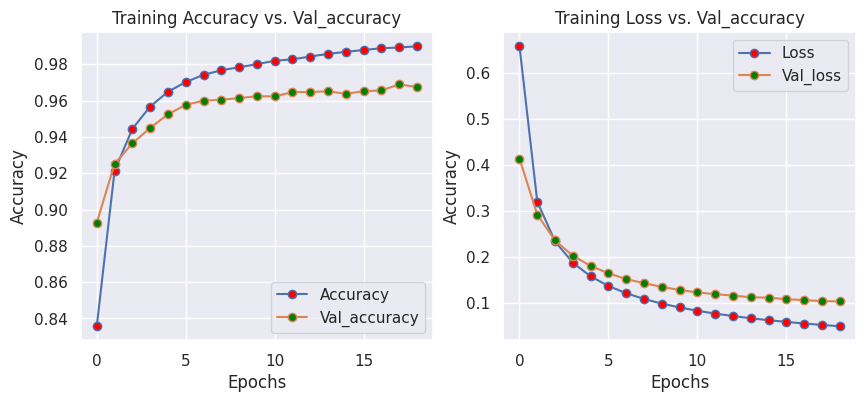

In [63]:
model_training_history(model_history)

# Predictions

In [6]:
saved_training_img_info["class_label"].unique()

array(['Dyskeratotic', 'Parabasal', 'Metaplastic', 'Koilocytotic',
       'Superficial_Intermediate'], dtype=object)

In [7]:
saved_training_img_info["class_code"].unique()

array([3, 1, 4, 0, 2])

In [10]:
dictionary_1 = {'Dyskeratotic':3, 'Parabasal':1, 'Metaplastic':4, 'Koilocytotic':0,
       'Superficial_Intermediate':2}

In [22]:
test_df = pd.read_csv("/content/drive/MyDrive/Cervical_Cancer/saved_test_id_info.csv")

In [23]:
test_df["class_label"].unique()

array(['Koilocytotic', 'Metaplastic', 'Dyskeratotic',
       'Superficial_Intermediate', 'Parabasal'], dtype=object)

In [24]:
test_df["class_code"].unique()

array([1, 2, 3, 0, 4])

In [9]:
test_df.head()

,file_name,class_label,class_code,file_name_with_directory
0,cervix_koc_4858.jpg,Koilocytotic,1,/content/drive/MyDrive/Cervical_Cancer/test_se...
1,cervix_mep_2633.jpg,Metaplastic,2,/content/drive/MyDrive/Cervical_Cancer/test_se...
2,cervix_mep_1546.jpg,Metaplastic,2,/content/drive/MyDrive/Cervical_Cancer/test_se...
3,cervix_dyk_2461.jpg,Dyskeratotic,3,/content/drive/MyDrive/Cervical_Cancer/test_se...
4,cervix_mep_3517.jpg,Metaplastic,2,/content/drive/MyDrive/Cervical_Cancer/test_se...


In [25]:
test_df2 = test_df.copy()

In [26]:
test_df2.loc[test_df2["class_label"] == 'Koilocytotic', "class_code"] = 0
test_df2.loc[test_df2["class_label"] == 'Metaplastic', "class_code"] = 4
test_df2.loc[test_df2["class_label"] == 'Superficial_Intermediate', "class_code"] = 2
test_df2.loc[test_df2["class_label"] == 'Parabasal', "class_code"] = 1

In [27]:
test_df2["class_label"].unique()

array(['Koilocytotic', 'Metaplastic', 'Dyskeratotic',
       'Superficial_Intermediate', 'Parabasal'], dtype=object)

In [28]:
test_df2["class_code"].unique()

array([0, 4, 3, 2, 1])

In [29]:
test_df2.head()

,file_name,class_label,class_code,file_name_with_directory
0,cervix_koc_4858.jpg,Koilocytotic,0,/content/drive/MyDrive/Cervical_Cancer/test_se...
1,cervix_mep_2633.jpg,Metaplastic,4,/content/drive/MyDrive/Cervical_Cancer/test_se...
2,cervix_mep_1546.jpg,Metaplastic,4,/content/drive/MyDrive/Cervical_Cancer/test_se...
3,cervix_dyk_2461.jpg,Dyskeratotic,3,/content/drive/MyDrive/Cervical_Cancer/test_se...
4,cervix_mep_3517.jpg,Metaplastic,4,/content/drive/MyDrive/Cervical_Cancer/test_se...


In [37]:
extracted_test_features = feature_extraction(test_df2)

Found 3750 validated image filenames.


  0%|          | 0/235 [00:00<?, ?it/s]

1/1 [==============================] - 25s 25s/step


  0%|          | 1/235 [00:31<2:04:34, 31.94s/it]

1/1 [==============================] - 1s 528ms/step


  1%|          | 2/235 [00:39<1:07:55, 17.49s/it]

1/1 [==============================] - 1s 512ms/step


  1%|▏         | 3/235 [00:47<51:04, 13.21s/it]  

1/1 [==============================] - 1s 510ms/step


  2%|▏         | 4/235 [00:55<42:17, 10.98s/it]

1/1 [==============================] - 1s 514ms/step


  2%|▏         | 5/235 [01:02<36:49,  9.61s/it]

1/1 [==============================] - 1s 511ms/step


  3%|▎         | 6/235 [01:09<33:08,  8.68s/it]

1/1 [==============================] - 1s 513ms/step


  3%|▎         | 7/235 [01:16<31:21,  8.25s/it]

1/1 [==============================] - 1s 539ms/step


  3%|▎         | 8/235 [01:23<29:40,  7.84s/it]

1/1 [==============================] - 1s 570ms/step


  4%|▍         | 9/235 [01:30<28:28,  7.56s/it]

1/1 [==============================] - 1s 511ms/step


  4%|▍         | 10/235 [01:37<28:07,  7.50s/it]

1/1 [==============================] - 1s 521ms/step


  5%|▍         | 11/235 [01:44<27:33,  7.38s/it]

1/1 [==============================] - 1s 508ms/step


  5%|▌         | 12/235 [01:51<27:06,  7.29s/it]

1/1 [==============================] - 1s 528ms/step


  6%|▌         | 13/235 [01:59<27:00,  7.30s/it]

1/1 [==============================] - 1s 526ms/step


  6%|▌         | 14/235 [02:06<26:42,  7.25s/it]

1/1 [==============================] - 1s 508ms/step


  6%|▋         | 15/235 [02:13<26:15,  7.16s/it]

1/1 [==============================] - 1s 551ms/step


  7%|▋         | 16/235 [02:20<26:06,  7.15s/it]

1/1 [==============================] - 1s 511ms/step


  7%|▋         | 17/235 [02:27<25:44,  7.09s/it]

1/1 [==============================] - 1s 539ms/step


  8%|▊         | 18/235 [02:34<25:30,  7.05s/it]

1/1 [==============================] - 1s 524ms/step


  8%|▊         | 19/235 [02:41<25:33,  7.10s/it]

1/1 [==============================] - 1s 508ms/step


  9%|▊         | 20/235 [02:48<25:42,  7.17s/it]

1/1 [==============================] - 1s 541ms/step


  9%|▉         | 21/235 [02:55<25:29,  7.15s/it]

1/1 [==============================] - 1s 515ms/step


  9%|▉         | 22/235 [03:03<25:39,  7.23s/it]

1/1 [==============================] - 1s 546ms/step


 10%|▉         | 23/235 [03:10<25:52,  7.32s/it]

1/1 [==============================] - 1s 515ms/step


 10%|█         | 24/235 [03:18<25:53,  7.36s/it]

1/1 [==============================] - 1s 544ms/step


 11%|█         | 25/235 [03:25<25:11,  7.20s/it]

1/1 [==============================] - 1s 518ms/step


 11%|█         | 26/235 [03:31<24:37,  7.07s/it]

1/1 [==============================] - 1s 538ms/step


 11%|█▏        | 27/235 [03:40<26:22,  7.61s/it]

1/1 [==============================] - 1s 553ms/step


 12%|█▏        | 28/235 [03:48<26:36,  7.71s/it]

1/1 [==============================] - 1s 514ms/step


 12%|█▏        | 29/235 [03:56<26:05,  7.60s/it]

1/1 [==============================] - 1s 553ms/step


 13%|█▎        | 30/235 [04:03<25:31,  7.47s/it]

1/1 [==============================] - 1s 507ms/step


 13%|█▎        | 31/235 [04:10<24:54,  7.33s/it]

1/1 [==============================] - 1s 514ms/step


 14%|█▎        | 32/235 [04:17<24:23,  7.21s/it]

1/1 [==============================] - 1s 536ms/step


 14%|█▍        | 33/235 [04:24<24:02,  7.14s/it]

1/1 [==============================] - 1s 509ms/step


 14%|█▍        | 34/235 [04:31<23:56,  7.15s/it]

1/1 [==============================] - 1s 506ms/step


 15%|█▍        | 35/235 [04:38<23:50,  7.15s/it]

1/1 [==============================] - 1s 510ms/step


 15%|█▌        | 36/235 [04:45<23:34,  7.11s/it]

1/1 [==============================] - 1s 547ms/step


 16%|█▌        | 37/235 [04:52<23:37,  7.16s/it]

1/1 [==============================] - 1s 509ms/step


 16%|█▌        | 38/235 [05:00<23:41,  7.22s/it]

1/1 [==============================] - 1s 516ms/step


 17%|█▋        | 39/235 [05:07<23:21,  7.15s/it]

1/1 [==============================] - 1s 524ms/step


 17%|█▋        | 40/235 [05:14<22:58,  7.07s/it]

1/1 [==============================] - 1s 507ms/step


 17%|█▋        | 41/235 [05:21<22:57,  7.10s/it]

1/1 [==============================] - 1s 507ms/step


 18%|█▊        | 42/235 [05:28<22:56,  7.13s/it]

1/1 [==============================] - 1s 507ms/step


 18%|█▊        | 43/235 [05:35<22:48,  7.13s/it]

1/1 [==============================] - 1s 556ms/step


 19%|█▊        | 44/235 [05:43<23:20,  7.33s/it]

1/1 [==============================] - 1s 515ms/step


 19%|█▉        | 45/235 [05:50<23:05,  7.29s/it]

1/1 [==============================] - 1s 538ms/step


 20%|█▉        | 46/235 [05:57<23:05,  7.33s/it]

1/1 [==============================] - 1s 514ms/step


 20%|██        | 47/235 [06:05<22:59,  7.34s/it]

1/1 [==============================] - 1s 507ms/step


 20%|██        | 48/235 [06:12<22:32,  7.23s/it]

1/1 [==============================] - 1s 535ms/step


 21%|██        | 49/235 [06:19<22:00,  7.10s/it]

1/1 [==============================] - 1s 507ms/step


 21%|██▏       | 50/235 [06:26<22:04,  7.16s/it]

1/1 [==============================] - 1s 548ms/step


 22%|██▏       | 51/235 [06:33<21:45,  7.09s/it]

1/1 [==============================] - 1s 506ms/step


 22%|██▏       | 52/235 [06:40<21:22,  7.01s/it]

1/1 [==============================] - 1s 558ms/step


 23%|██▎       | 53/235 [06:47<21:19,  7.03s/it]

1/1 [==============================] - 1s 509ms/step


 23%|██▎       | 54/235 [06:54<21:08,  7.01s/it]

1/1 [==============================] - 1s 512ms/step


 23%|██▎       | 55/235 [07:01<21:15,  7.08s/it]

1/1 [==============================] - 1s 506ms/step


 24%|██▍       | 56/235 [07:08<20:58,  7.03s/it]

1/1 [==============================] - 1s 506ms/step


 24%|██▍       | 57/235 [07:15<20:56,  7.06s/it]

1/1 [==============================] - 1s 560ms/step


 25%|██▍       | 58/235 [07:22<20:46,  7.04s/it]

1/1 [==============================] - 1s 536ms/step


 25%|██▌       | 59/235 [07:29<20:32,  7.00s/it]

1/1 [==============================] - 1s 560ms/step


 26%|██▌       | 60/235 [07:36<20:40,  7.09s/it]

1/1 [==============================] - 1s 513ms/step


 26%|██▌       | 61/235 [07:43<20:40,  7.13s/it]

1/1 [==============================] - 1s 510ms/step


 26%|██▋       | 62/235 [07:50<20:26,  7.09s/it]

1/1 [==============================] - 1s 512ms/step


 27%|██▋       | 63/235 [07:57<20:07,  7.02s/it]

1/1 [==============================] - 1s 511ms/step


 27%|██▋       | 64/235 [08:04<19:48,  6.95s/it]

1/1 [==============================] - 1s 519ms/step


 28%|██▊       | 65/235 [08:11<20:02,  7.08s/it]

1/1 [==============================] - 1s 527ms/step


 28%|██▊       | 66/235 [08:19<20:02,  7.12s/it]

1/1 [==============================] - 1s 541ms/step


 29%|██▊       | 67/235 [08:26<19:59,  7.14s/it]

1/1 [==============================] - 1s 508ms/step


 29%|██▉       | 68/235 [08:33<19:51,  7.14s/it]

1/1 [==============================] - 1s 511ms/step


 29%|██▉       | 69/235 [08:40<19:43,  7.13s/it]

1/1 [==============================] - 1s 511ms/step


 30%|██▉       | 70/235 [08:47<19:33,  7.11s/it]

1/1 [==============================] - 1s 511ms/step


 30%|███       | 71/235 [08:54<19:28,  7.13s/it]

1/1 [==============================] - 1s 538ms/step


 31%|███       | 72/235 [09:01<19:14,  7.08s/it]

1/1 [==============================] - 1s 509ms/step


 31%|███       | 73/235 [09:08<19:09,  7.10s/it]

1/1 [==============================] - 0s 479ms/step


 31%|███▏      | 74/235 [09:15<18:56,  7.06s/it]

1/1 [==============================] - 1s 509ms/step


 32%|███▏      | 75/235 [09:22<18:39,  7.00s/it]

1/1 [==============================] - 1s 535ms/step


 32%|███▏      | 76/235 [09:29<18:40,  7.05s/it]

1/1 [==============================] - 1s 513ms/step


 33%|███▎      | 77/235 [09:37<18:42,  7.10s/it]

1/1 [==============================] - 1s 510ms/step


 33%|███▎      | 78/235 [09:44<18:25,  7.04s/it]

1/1 [==============================] - 1s 535ms/step


 34%|███▎      | 79/235 [09:51<18:24,  7.08s/it]

1/1 [==============================] - 1s 511ms/step


 34%|███▍      | 80/235 [09:58<18:18,  7.09s/it]

1/1 [==============================] - 1s 549ms/step


 34%|███▍      | 81/235 [10:05<18:19,  7.14s/it]

1/1 [==============================] - 1s 515ms/step


 35%|███▍      | 82/235 [10:12<18:09,  7.12s/it]

1/1 [==============================] - 1s 547ms/step


 35%|███▌      | 83/235 [10:19<18:11,  7.18s/it]

1/1 [==============================] - 1s 514ms/step


 36%|███▌      | 84/235 [10:26<17:48,  7.08s/it]

1/1 [==============================] - 1s 542ms/step


 36%|███▌      | 85/235 [10:34<17:48,  7.12s/it]

1/1 [==============================] - 1s 509ms/step


 37%|███▋      | 86/235 [10:41<17:39,  7.11s/it]

1/1 [==============================] - 1s 509ms/step


 37%|███▋      | 87/235 [10:48<17:39,  7.16s/it]

1/1 [==============================] - 1s 537ms/step


 37%|███▋      | 88/235 [10:55<17:30,  7.15s/it]

1/1 [==============================] - 1s 506ms/step


 38%|███▊      | 89/235 [11:02<17:23,  7.15s/it]

1/1 [==============================] - 1s 549ms/step


 38%|███▊      | 90/235 [11:09<17:10,  7.10s/it]

1/1 [==============================] - 1s 508ms/step


 39%|███▊      | 91/235 [11:17<17:14,  7.19s/it]

1/1 [==============================] - 1s 535ms/step


 39%|███▉      | 92/235 [11:24<17:03,  7.16s/it]

1/1 [==============================] - 1s 518ms/step


 40%|███▉      | 93/235 [11:31<16:54,  7.14s/it]

1/1 [==============================] - 1s 511ms/step


 40%|████      | 94/235 [11:38<17:01,  7.25s/it]

1/1 [==============================] - 1s 544ms/step


 40%|████      | 95/235 [11:46<17:00,  7.29s/it]

1/1 [==============================] - 1s 506ms/step


 41%|████      | 96/235 [11:53<16:48,  7.26s/it]

1/1 [==============================] - 1s 547ms/step


 41%|████▏     | 97/235 [12:00<16:31,  7.19s/it]

1/1 [==============================] - 1s 527ms/step


 42%|████▏     | 98/235 [12:07<16:21,  7.16s/it]

1/1 [==============================] - 1s 507ms/step


 42%|████▏     | 99/235 [12:14<16:07,  7.12s/it]

1/1 [==============================] - 1s 507ms/step


 43%|████▎     | 100/235 [12:21<16:15,  7.23s/it]

1/1 [==============================] - 1s 510ms/step


 43%|████▎     | 101/235 [12:28<15:55,  7.13s/it]

1/1 [==============================] - 1s 544ms/step


 43%|████▎     | 102/235 [12:35<15:49,  7.14s/it]

1/1 [==============================] - 1s 510ms/step


 44%|████▍     | 103/235 [12:43<15:40,  7.13s/it]

1/1 [==============================] - 1s 560ms/step


 44%|████▍     | 104/235 [12:50<15:34,  7.13s/it]

1/1 [==============================] - 1s 527ms/step


 45%|████▍     | 105/235 [12:57<15:21,  7.09s/it]

1/1 [==============================] - 1s 507ms/step


 45%|████▌     | 106/235 [13:04<15:20,  7.14s/it]

1/1 [==============================] - 1s 504ms/step


 46%|████▌     | 107/235 [13:11<14:59,  7.02s/it]

1/1 [==============================] - 1s 509ms/step


 46%|████▌     | 108/235 [13:18<14:55,  7.05s/it]

1/1 [==============================] - 1s 510ms/step


 46%|████▋     | 109/235 [13:25<14:40,  6.99s/it]

1/1 [==============================] - 1s 509ms/step


 47%|████▋     | 110/235 [13:32<14:30,  6.97s/it]

1/1 [==============================] - 1s 567ms/step


 47%|████▋     | 111/235 [13:39<14:58,  7.25s/it]

1/1 [==============================] - 1s 508ms/step


 48%|████▊     | 112/235 [13:47<14:52,  7.26s/it]

1/1 [==============================] - 1s 506ms/step


 48%|████▊     | 113/235 [13:55<15:09,  7.46s/it]

1/1 [==============================] - 1s 511ms/step


 49%|████▊     | 114/235 [14:01<14:38,  7.26s/it]

1/1 [==============================] - 1s 506ms/step


 49%|████▉     | 115/235 [14:09<14:28,  7.24s/it]

1/1 [==============================] - 1s 559ms/step


 49%|████▉     | 116/235 [14:16<14:29,  7.31s/it]

1/1 [==============================] - 1s 520ms/step


 50%|████▉     | 117/235 [14:23<14:14,  7.24s/it]

1/1 [==============================] - 1s 520ms/step


 50%|█████     | 118/235 [14:31<14:09,  7.26s/it]

1/1 [==============================] - 1s 508ms/step


 51%|█████     | 119/235 [14:38<14:07,  7.31s/it]

1/1 [==============================] - 1s 507ms/step


 51%|█████     | 120/235 [14:45<13:47,  7.19s/it]

1/1 [==============================] - 1s 514ms/step


 51%|█████▏    | 121/235 [14:52<13:30,  7.11s/it]

1/1 [==============================] - 1s 507ms/step


 52%|█████▏    | 122/235 [14:59<13:20,  7.09s/it]

1/1 [==============================] - 1s 545ms/step


 52%|█████▏    | 123/235 [15:06<13:18,  7.13s/it]

1/1 [==============================] - 1s 535ms/step


 53%|█████▎    | 124/235 [15:13<13:10,  7.12s/it]

1/1 [==============================] - 1s 508ms/step


 53%|█████▎    | 125/235 [15:21<13:12,  7.20s/it]

1/1 [==============================] - 1s 510ms/step


 54%|█████▎    | 126/235 [15:28<13:14,  7.29s/it]

1/1 [==============================] - 1s 507ms/step


 54%|█████▍    | 127/235 [15:35<12:57,  7.20s/it]

1/1 [==============================] - 1s 509ms/step


 54%|█████▍    | 128/235 [15:42<12:40,  7.10s/it]

1/1 [==============================] - 1s 511ms/step


 55%|█████▍    | 129/235 [15:49<12:33,  7.11s/it]

1/1 [==============================] - 1s 537ms/step


 55%|█████▌    | 130/235 [15:56<12:21,  7.06s/it]

1/1 [==============================] - 1s 535ms/step


 56%|█████▌    | 131/235 [16:03<12:12,  7.04s/it]

1/1 [==============================] - 1s 547ms/step


 56%|█████▌    | 132/235 [16:10<12:01,  7.00s/it]

1/1 [==============================] - 1s 512ms/step


 57%|█████▋    | 133/235 [16:17<12:07,  7.13s/it]

1/1 [==============================] - 1s 510ms/step


 57%|█████▋    | 134/235 [16:24<11:51,  7.04s/it]

1/1 [==============================] - 1s 506ms/step


 57%|█████▋    | 135/235 [16:31<11:40,  7.01s/it]

1/1 [==============================] - 1s 506ms/step


 58%|█████▊    | 136/235 [16:38<11:37,  7.04s/it]

1/1 [==============================] - 1s 540ms/step


 58%|█████▊    | 137/235 [16:46<11:47,  7.22s/it]

1/1 [==============================] - 1s 508ms/step


 59%|█████▊    | 138/235 [16:54<12:16,  7.59s/it]

1/1 [==============================] - 1s 510ms/step


 59%|█████▉    | 139/235 [17:02<12:04,  7.55s/it]

1/1 [==============================] - 1s 511ms/step


 60%|█████▉    | 140/235 [17:09<11:41,  7.39s/it]

1/1 [==============================] - 1s 512ms/step


 60%|██████    | 141/235 [17:16<11:27,  7.31s/it]

1/1 [==============================] - 1s 556ms/step


 60%|██████    | 142/235 [17:23<11:27,  7.39s/it]

1/1 [==============================] - 1s 562ms/step


 61%|██████    | 143/235 [17:32<11:43,  7.65s/it]

1/1 [==============================] - 1s 507ms/step


 61%|██████▏   | 144/235 [17:39<11:19,  7.46s/it]

1/1 [==============================] - 1s 503ms/step


 62%|██████▏   | 145/235 [17:46<11:03,  7.37s/it]

1/1 [==============================] - 1s 510ms/step


 62%|██████▏   | 146/235 [17:53<10:48,  7.29s/it]

1/1 [==============================] - 1s 512ms/step


 63%|██████▎   | 147/235 [18:00<10:30,  7.17s/it]

1/1 [==============================] - 1s 509ms/step


 63%|██████▎   | 148/235 [18:07<10:19,  7.12s/it]

1/1 [==============================] - 1s 554ms/step


 63%|██████▎   | 149/235 [18:14<10:09,  7.08s/it]

1/1 [==============================] - 1s 527ms/step


 64%|██████▍   | 150/235 [18:21<10:02,  7.09s/it]

1/1 [==============================] - 1s 543ms/step


 64%|██████▍   | 151/235 [18:28<09:53,  7.06s/it]

1/1 [==============================] - 1s 511ms/step


 65%|██████▍   | 152/235 [18:35<09:44,  7.04s/it]

1/1 [==============================] - 1s 506ms/step


 65%|██████▌   | 153/235 [18:42<09:37,  7.04s/it]

1/1 [==============================] - 1s 508ms/step


 66%|██████▌   | 154/235 [18:49<09:27,  7.00s/it]

1/1 [==============================] - 1s 506ms/step


 66%|██████▌   | 155/235 [18:56<09:19,  6.99s/it]

1/1 [==============================] - 1s 531ms/step


 66%|██████▋   | 156/235 [19:03<09:10,  6.97s/it]

1/1 [==============================] - 1s 511ms/step


 67%|██████▋   | 157/235 [19:10<09:04,  6.98s/it]

1/1 [==============================] - 1s 550ms/step


 67%|██████▋   | 158/235 [19:17<09:01,  7.04s/it]

1/1 [==============================] - 1s 508ms/step


 68%|██████▊   | 159/235 [19:24<08:48,  6.95s/it]

1/1 [==============================] - 1s 516ms/step


 68%|██████▊   | 160/235 [19:31<08:42,  6.97s/it]

1/1 [==============================] - 1s 505ms/step


 69%|██████▊   | 161/235 [19:38<08:37,  7.00s/it]

1/1 [==============================] - 1s 507ms/step


 69%|██████▉   | 162/235 [19:45<08:37,  7.09s/it]

1/1 [==============================] - 1s 521ms/step


 69%|██████▉   | 163/235 [19:52<08:27,  7.05s/it]

1/1 [==============================] - 1s 507ms/step


 70%|██████▉   | 164/235 [19:59<08:21,  7.07s/it]

1/1 [==============================] - 1s 545ms/step


 70%|███████   | 165/235 [20:06<08:18,  7.12s/it]

1/1 [==============================] - 1s 508ms/step


 71%|███████   | 166/235 [20:14<08:14,  7.17s/it]

1/1 [==============================] - 1s 509ms/step


 71%|███████   | 167/235 [20:21<08:10,  7.21s/it]

1/1 [==============================] - 1s 505ms/step


 71%|███████▏  | 168/235 [20:28<07:59,  7.16s/it]

1/1 [==============================] - 1s 524ms/step


 72%|███████▏  | 169/235 [20:35<07:49,  7.12s/it]

1/1 [==============================] - 1s 512ms/step


 72%|███████▏  | 170/235 [20:42<07:47,  7.19s/it]

1/1 [==============================] - 1s 507ms/step


 73%|███████▎  | 171/235 [20:50<07:41,  7.20s/it]

1/1 [==============================] - 1s 550ms/step


 73%|███████▎  | 172/235 [20:57<07:38,  7.27s/it]

1/1 [==============================] - 1s 510ms/step


 74%|███████▎  | 173/235 [21:05<07:33,  7.32s/it]

1/1 [==============================] - 1s 513ms/step


 74%|███████▍  | 174/235 [21:12<07:27,  7.34s/it]

1/1 [==============================] - 1s 521ms/step


 74%|███████▍  | 175/235 [21:19<07:17,  7.30s/it]

1/1 [==============================] - 1s 521ms/step


 75%|███████▍  | 176/235 [21:27<07:17,  7.42s/it]

1/1 [==============================] - 1s 507ms/step


 75%|███████▌  | 177/235 [21:36<07:37,  7.88s/it]

1/1 [==============================] - 1s 507ms/step


 76%|███████▌  | 178/235 [21:43<07:16,  7.66s/it]

1/1 [==============================] - 1s 507ms/step


 76%|███████▌  | 179/235 [21:50<07:05,  7.60s/it]

1/1 [==============================] - 1s 550ms/step


 77%|███████▋  | 180/235 [21:58<07:03,  7.70s/it]

1/1 [==============================] - 1s 510ms/step


 77%|███████▋  | 181/235 [22:06<06:53,  7.65s/it]

1/1 [==============================] - 1s 541ms/step


 77%|███████▋  | 182/235 [22:14<06:57,  7.88s/it]

1/1 [==============================] - 1s 506ms/step


 78%|███████▊  | 183/235 [22:22<06:41,  7.72s/it]

1/1 [==============================] - 1s 508ms/step


 78%|███████▊  | 184/235 [22:29<06:33,  7.72s/it]

1/1 [==============================] - 1s 544ms/step


 79%|███████▊  | 185/235 [22:37<06:26,  7.73s/it]

1/1 [==============================] - 1s 506ms/step


 79%|███████▉  | 186/235 [22:45<06:24,  7.84s/it]

1/1 [==============================] - 1s 549ms/step


 80%|███████▉  | 187/235 [22:53<06:12,  7.76s/it]

1/1 [==============================] - 1s 544ms/step


 80%|████████  | 188/235 [23:00<05:59,  7.65s/it]

1/1 [==============================] - 1s 510ms/step


 80%|████████  | 189/235 [23:07<05:41,  7.42s/it]

1/1 [==============================] - 1s 545ms/step


 81%|████████  | 190/235 [23:14<05:29,  7.32s/it]

1/1 [==============================] - 1s 511ms/step


 81%|████████▏ | 191/235 [23:21<05:15,  7.16s/it]

1/1 [==============================] - 1s 571ms/step


 82%|████████▏ | 192/235 [23:28<05:07,  7.14s/it]

1/1 [==============================] - 1s 511ms/step


 82%|████████▏ | 193/235 [23:35<05:02,  7.20s/it]

1/1 [==============================] - 1s 520ms/step


 83%|████████▎ | 194/235 [23:42<04:53,  7.17s/it]

1/1 [==============================] - 1s 507ms/step


 83%|████████▎ | 195/235 [23:49<04:44,  7.12s/it]

1/1 [==============================] - 1s 509ms/step


 83%|████████▎ | 196/235 [23:57<04:39,  7.16s/it]

1/1 [==============================] - 1s 560ms/step


 84%|████████▍ | 197/235 [24:05<04:40,  7.39s/it]

1/1 [==============================] - 1s 514ms/step


 84%|████████▍ | 198/235 [24:12<04:30,  7.32s/it]

1/1 [==============================] - 1s 512ms/step


 85%|████████▍ | 199/235 [24:19<04:26,  7.41s/it]

1/1 [==============================] - 1s 511ms/step


 85%|████████▌ | 200/235 [24:27<04:18,  7.38s/it]

1/1 [==============================] - 1s 536ms/step


 86%|████████▌ | 201/235 [24:34<04:08,  7.32s/it]

1/1 [==============================] - 1s 554ms/step


 86%|████████▌ | 202/235 [24:42<04:05,  7.42s/it]

1/1 [==============================] - 1s 509ms/step


 86%|████████▋ | 203/235 [24:49<03:56,  7.38s/it]

1/1 [==============================] - 1s 514ms/step


 87%|████████▋ | 204/235 [24:56<03:46,  7.30s/it]

1/1 [==============================] - 1s 505ms/step


 87%|████████▋ | 205/235 [25:03<03:36,  7.21s/it]

1/1 [==============================] - 1s 517ms/step


 88%|████████▊ | 206/235 [25:10<03:29,  7.24s/it]

1/1 [==============================] - 1s 523ms/step


 88%|████████▊ | 207/235 [25:17<03:20,  7.16s/it]

1/1 [==============================] - 1s 508ms/step


 89%|████████▊ | 208/235 [25:25<03:14,  7.21s/it]

1/1 [==============================] - 1s 542ms/step


 89%|████████▉ | 209/235 [25:32<03:05,  7.13s/it]

1/1 [==============================] - 1s 507ms/step


 89%|████████▉ | 210/235 [25:39<02:58,  7.14s/it]

1/1 [==============================] - 1s 539ms/step


 90%|████████▉ | 211/235 [25:46<02:51,  7.15s/it]

1/1 [==============================] - 1s 510ms/step


 90%|█████████ | 212/235 [25:53<02:41,  7.03s/it]

1/1 [==============================] - 1s 509ms/step


 91%|█████████ | 213/235 [26:00<02:35,  7.08s/it]

1/1 [==============================] - 1s 534ms/step


 91%|█████████ | 214/235 [26:07<02:29,  7.13s/it]

1/1 [==============================] - 1s 508ms/step


 91%|█████████▏| 215/235 [26:15<02:24,  7.23s/it]

1/1 [==============================] - 1s 557ms/step


 92%|█████████▏| 216/235 [26:22<02:18,  7.29s/it]

1/1 [==============================] - 1s 509ms/step


 92%|█████████▏| 217/235 [26:30<02:14,  7.45s/it]

1/1 [==============================] - 1s 508ms/step


 93%|█████████▎| 218/235 [26:37<02:04,  7.33s/it]

1/1 [==============================] - 1s 510ms/step


 93%|█████████▎| 219/235 [26:44<01:56,  7.29s/it]

1/1 [==============================] - 1s 533ms/step


 94%|█████████▎| 220/235 [26:51<01:49,  7.31s/it]

1/1 [==============================] - 1s 561ms/step


 94%|█████████▍| 221/235 [26:59<01:43,  7.40s/it]

1/1 [==============================] - 1s 511ms/step


 94%|█████████▍| 222/235 [27:06<01:36,  7.41s/it]

1/1 [==============================] - 1s 510ms/step


 95%|█████████▍| 223/235 [27:14<01:28,  7.39s/it]

1/1 [==============================] - 1s 510ms/step


 95%|█████████▌| 224/235 [27:21<01:22,  7.49s/it]

1/1 [==============================] - 1s 507ms/step


 96%|█████████▌| 225/235 [27:29<01:14,  7.45s/it]

1/1 [==============================] - 1s 569ms/step


 96%|█████████▌| 226/235 [27:37<01:08,  7.59s/it]

1/1 [==============================] - 1s 506ms/step


 97%|█████████▋| 227/235 [27:44<01:00,  7.62s/it]

1/1 [==============================] - 1s 507ms/step


 97%|█████████▋| 228/235 [27:52<00:52,  7.48s/it]

1/1 [==============================] - 1s 515ms/step


 97%|█████████▋| 229/235 [27:59<00:44,  7.37s/it]

1/1 [==============================] - 1s 549ms/step


 98%|█████████▊| 230/235 [28:06<00:36,  7.26s/it]

1/1 [==============================] - 1s 513ms/step


 98%|█████████▊| 231/235 [28:13<00:28,  7.22s/it]

1/1 [==============================] - 1s 512ms/step


 99%|█████████▊| 232/235 [28:20<00:21,  7.30s/it]

1/1 [==============================] - 1s 589ms/step


 99%|█████████▉| 233/235 [28:28<00:14,  7.32s/it]

1/1 [==============================] - 1s 506ms/step


100%|█████████▉| 234/235 [28:35<00:07,  7.32s/it]

1/1 [==============================] - 3s 3s/step


100%|█████████▉| 234/235 [28:40<00:07,  7.35s/it]


In [38]:
from keras.models import load_model

model_import = load_model("/content/drive/MyDrive/Image_cervical_models/best_checkpoint2.h5")

In [40]:
ypred = model_import.predict(extracted_test_features)

118/118 [==============================] - 0s 3ms/step


In [41]:
ypred[1]

array([1.0762243e-02, 3.1167426e-06, 6.8548929e-05, 4.7905096e-03,
       9.8437566e-01], dtype=float32)

In [42]:
ypred_idx = np.argmax(ypred, axis=1)

In [43]:
ypred_idx.shape

(3750,)

In [44]:
ypred_idx[:5]

array([0, 4, 4, 3, 4])

In [45]:
np.array(test_df2["class_code"])[:5]

array([0, 4, 4, 3, 4])

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, accuracy_score
def model_evaluation(ytest, ypred, labels = [0,1,2,3,4]):

    classification_report(ytest, ypred)
    f1score = f1_score(ytest, ypred, average = "macro")
    macro_average_precision = precision_score(ytest, ypred, average = "macro")
    macro_average_recall = recall_score(ytest, ypred, average = "macro")
    accuracy = accuracy_score(ytest, ypred)

    print("Macro_Precision: ", macro_average_precision)
    print("Macro_recall: ", macro_average_recall)
    print("F1 Score(macro): ", macro_average_precision)
    print("Accuracy: {:.2f}%".format(accuracy*100))

    cm = confusion_matrix(ytest, ypred, labels = labels)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    display.plot()
    plt.grid(False)

    return f1score


Macro_Precision:  0.9687979375614134
Macro_recall:  0.9685333333333335
F1 Score(macro):  0.9687979375614134
Accuracy: 96.85%


0.9686016172770552

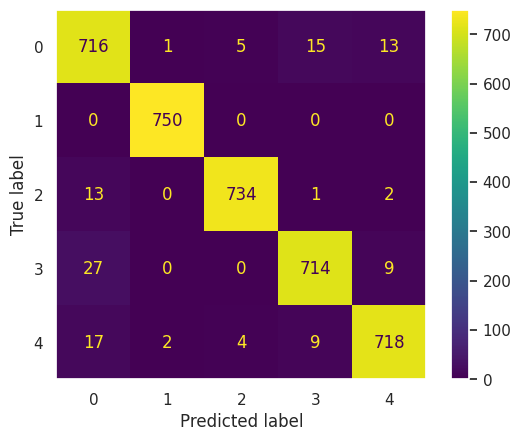

In [48]:
model_evaluation(np.array(test_df2["class_code"]), ypred_idx)